In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/dataIncu/'
npz_name = 'Incucyte48.npz'
npz_val_name = 'Incucyte48Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteseqnetd47SMALL.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 47
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 48
imagey = 48

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         residual = residual, depth = depth, start_kernel = start_kernel, stride = stride, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=29, epochs=250, gridx=1, gridy=1, imagex=48, imagey=48, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteseqnetd29SMALL.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/dataIncu/', npz_name='Incucyte48.npz', npz_val_name='Incucyte48Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 5180
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
number of  images:	 273
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
(5180, 1, 1, 4) 1














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_____________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5180 samples, validate on 273 samples
Epoch 1/250
5180/5180 [==============================] - 10s 2ms/step - loss: 1.7726 - acc: 0.1716 - val_loss: 1.4798 - val_acc: 0.4615

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 1.4798485774260302, 'val_acc': 0.46153846230262363, 'loss': 1.772552836815823, 'acc': 0.1716216210218355, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

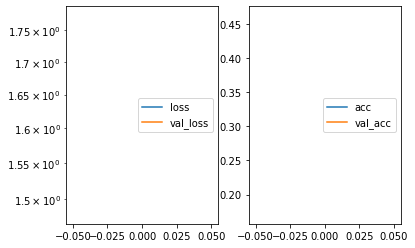

Predicted cell: Cells Probability: [[0.6329725]]
True Cell type: Cells
x [[0.20468563]]
True positional value x 0.5
y [[0.2614519]]
True positional value y 0.7083333333333334


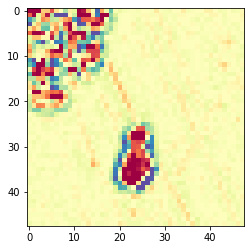

Epoch 2/250
5180/5180 [==============================] - 4s 862us/step - loss: 1.1735 - acc: 0.6162 - val_loss: 1.0294 - val_acc: 0.7619

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 1.029439818291437, 'val_acc': 0.761904742473211, 'loss': 1.1734587230277338, 'acc': 0.6162162172288048, 'lr': 1e-06}


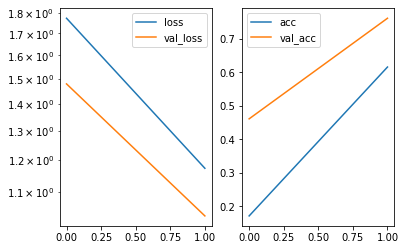

Predicted cell: Cells Probability: [[0.88695675]]
True Cell type: Cells
x [[0.38163114]]
True positional value x 0.5
y [[0.6640257]]
True positional value y 0.7083333333333334


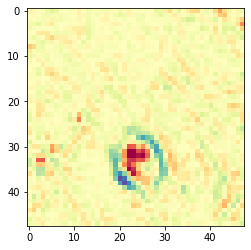

Epoch 3/250
5180/5180 [==============================] - 4s 859us/step - loss: 0.8994 - acc: 0.8091 - val_loss: 0.9221 - val_acc: 0.8608

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.9220747428062634, 'val_acc': 0.8608058616791889, 'loss': 0.8994230623410936, 'acc': 0.8090733621111248, 'lr': 1e-06}


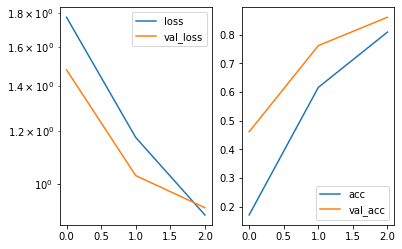

Predicted cell: Cells Probability: [[0.91223973]]
True Cell type: Cells
x [[0.47969106]]
True positional value x 0.5
y [[0.4540059]]
True positional value y 0.5


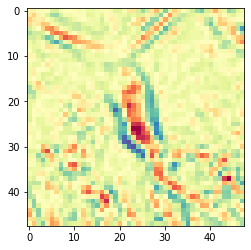

Epoch 4/250
5180/5180 [==============================] - 4s 868us/step - loss: 0.8139 - acc: 0.8542 - val_loss: 0.8635 - val_acc: 0.8571

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.8634992573724125, 'val_acc': 0.8571428615094978, 'loss': 0.8139381215379045, 'acc': 0.8542471021759004, 'lr': 1e-06}


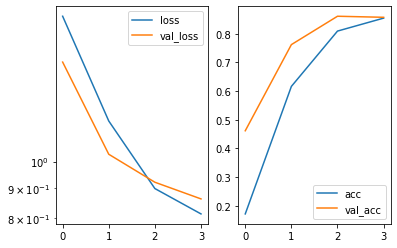

Predicted cell: Cells Probability: [[0.9681696]]
True Cell type: Cells
x [[0.8107108]]
True positional value x 0.7083333333333334
y [[0.33557436]]
True positional value y 0.5


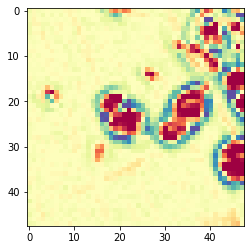

Epoch 5/250
5180/5180 [==============================] - 4s 861us/step - loss: 0.7648 - acc: 0.8564 - val_loss: 0.7961 - val_acc: 0.8608

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.7960840116490374, 'val_acc': 0.8608058616791889, 'loss': 0.764803180823455, 'acc': 0.8563706522742753, 'lr': 1e-06}


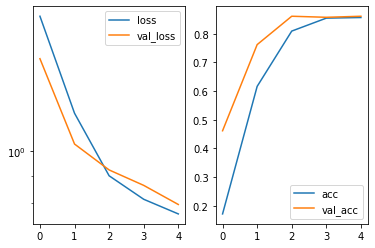

Predicted cell: Cells Probability: [[0.9765171]]
True Cell type: Cells
x [[0.78580576]]
True positional value x 0.7083333333333334
y [[0.54312325]]
True positional value y 0.5


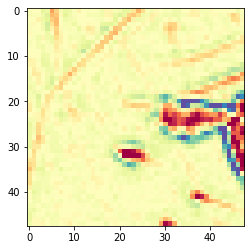

Epoch 6/250
5180/5180 [==============================] - 4s 863us/step - loss: 0.7228 - acc: 0.8664 - val_loss: 0.7359 - val_acc: 0.8608

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.7359258222492623, 'val_acc': 0.8608058616791889, 'loss': 0.7227627770781057, 'acc': 0.8664092619446714, 'lr': 1e-06}


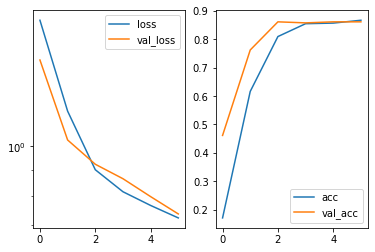

Predicted cell: Cells Probability: [[0.97447205]]
True Cell type: Cells
x [[0.8345609]]
True positional value x 0.7083333333333334
y [[0.5745082]]
True positional value y 0.5


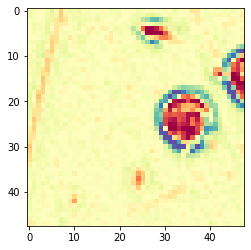

Epoch 7/250
5180/5180 [==============================] - 4s 862us/step - loss: 0.6874 - acc: 0.8643 - val_loss: 0.7046 - val_acc: 0.8755

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.7045733437433348, 'val_acc': 0.8754578896494576, 'loss': 0.6874205803779101, 'acc': 0.8642857164489717, 'lr': 1e-06}


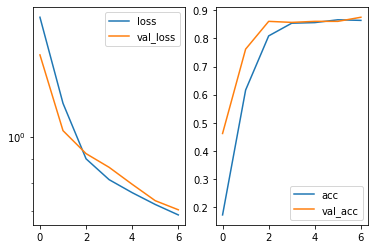

Predicted cell: Cells Probability: [[0.988902]]
True Cell type: Cells
x [[0.43540677]]
True positional value x 0.5
y [[0.6736153]]
True positional value y 0.5


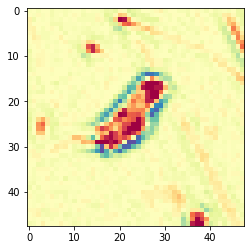

Epoch 8/250
5180/5180 [==============================] - 5s 870us/step - loss: 0.6593 - acc: 0.8763 - val_loss: 0.6918 - val_acc: 0.8718

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6917706149401682, 'val_acc': 0.8717948676465632, 'loss': 0.6592902870251865, 'acc': 0.8762548239074619, 'lr': 1e-06}


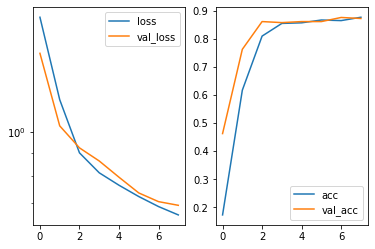

Predicted cell: Cells Probability: [[0.6058629]]
True Cell type: Normal
x [[0.39173147]]
True positional value x 0.5
y [[0.49062374]]
True positional value y 0.5


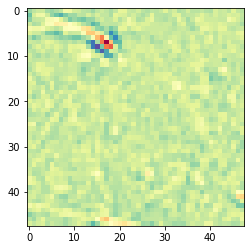

Epoch 9/250
5180/5180 [==============================] - 5s 878us/step - loss: 0.6382 - acc: 0.8863 - val_loss: 0.6866 - val_acc: 0.8828

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.686602064541408, 'val_acc': 0.8827838849672031, 'loss': 0.6381607711545288, 'acc': 0.8862934358791955, 'lr': 1e-06}


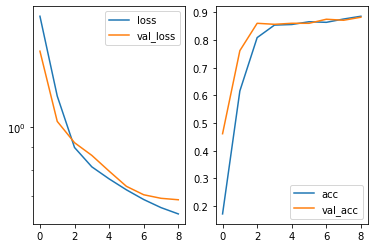

Predicted cell: Cells Probability: [[0.99659616]]
True Cell type: Cells
x [[0.7970171]]
True positional value x 0.2916666666666667
y [[0.70174956]]
True positional value y 0.2916666666666667


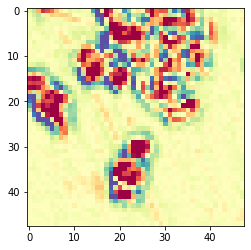

Epoch 10/250
5180/5180 [==============================] - 5s 879us/step - loss: 0.6233 - acc: 0.8938 - val_loss: 0.6792 - val_acc: 0.8828

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6792126206251291, 'val_acc': 0.8827838849672031, 'loss': 0.6232733169577757, 'acc': 0.8938223986552029, 'lr': 1e-06}


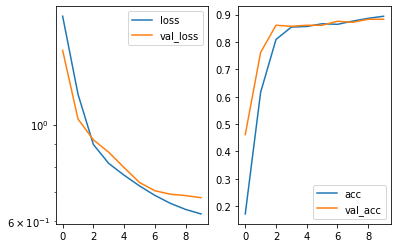

Predicted cell: Cells Probability: [[0.9784802]]
True Cell type: Cells
x [[0.33913168]]
True positional value x 0.2916666666666667
y [[0.36050683]]
True positional value y 0.7083333333333334


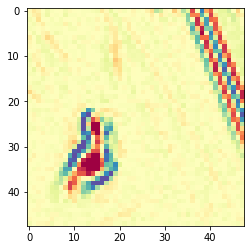

Epoch 11/250
5180/5180 [==============================] - 5s 882us/step - loss: 0.6081 - acc: 0.9012 - val_loss: 0.6718 - val_acc: 0.8938

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6717825558159377, 'val_acc': 0.8937728963928782, 'loss': 0.6080529825567739, 'acc': 0.901158302677184, 'lr': 1e-06}


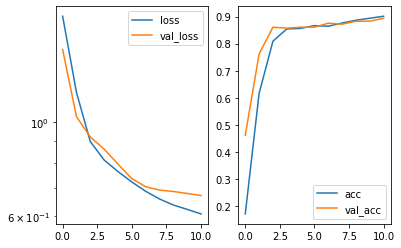

Predicted cell: Cells Probability: [[0.9857568]]
True Cell type: Cells
x [[0.60614765]]
True positional value x 0.5
y [[0.39845005]]
True positional value y 0.2916666666666667


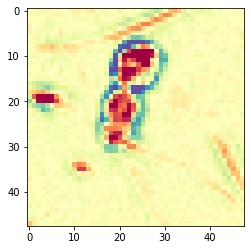

Epoch 12/250
5180/5180 [==============================] - 5s 896us/step - loss: 0.5945 - acc: 0.9056 - val_loss: 0.6629 - val_acc: 0.8938

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6629198512314877, 'val_acc': 0.8937728963928782, 'loss': 0.59451955464816, 'acc': 0.9055984572554187, 'lr': 1e-06}


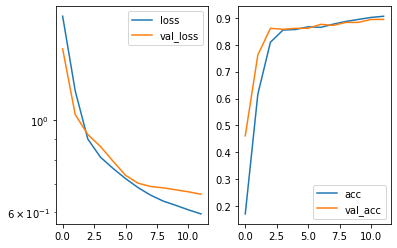

Predicted cell: Cells Probability: [[0.95753926]]
True Cell type: Cells
x [[0.32817805]]
True positional value x 0.2916666666666667
y [[0.3846781]]
True positional value y 0.2916666666666667


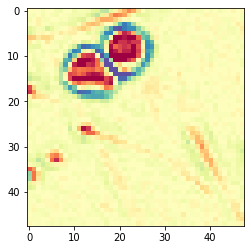

Epoch 13/250
5180/5180 [==============================] - 5s 880us/step - loss: 0.5807 - acc: 0.9089 - val_loss: 0.6560 - val_acc: 0.9121

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.655972685787704, 'val_acc': 0.9120879245328379, 'loss': 0.5806751204043281, 'acc': 0.9088803085581216, 'lr': 1e-06}


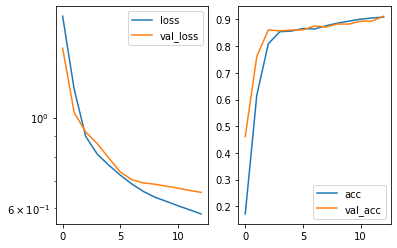

Predicted cell: Cells Probability: [[0.9865041]]
True Cell type: Cells
x [[0.7166939]]
True positional value x 0.5
y [[0.45712054]]
True positional value y 0.2916666666666667


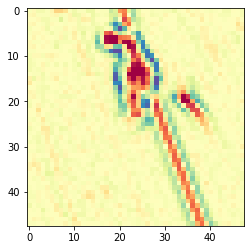

Epoch 14/250
5180/5180 [==============================] - 5s 884us/step - loss: 0.5687 - acc: 0.9185 - val_loss: 0.6497 - val_acc: 0.9267

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6497327191925748, 'val_acc': 0.9267399361282042, 'loss': 0.568746726370226, 'acc': 0.9185328216626377, 'lr': 1e-06}


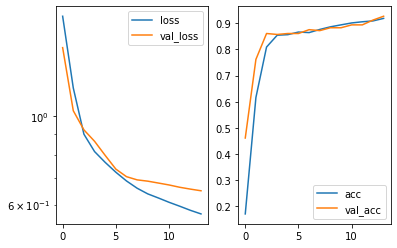

Predicted cell: Cells Probability: [[0.9694899]]
True Cell type: Cells
x [[0.64174265]]
True positional value x 0.7083333333333334
y [[0.59184813]]
True positional value y 0.5


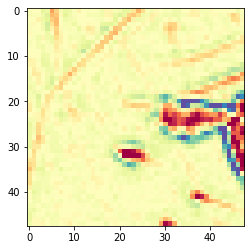

Epoch 15/250
5180/5180 [==============================] - 5s 877us/step - loss: 0.5586 - acc: 0.9234 - val_loss: 0.6447 - val_acc: 0.9377

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6447417799369756, 'val_acc': 0.9377289420955783, 'loss': 0.5585846350920246, 'acc': 0.9233590753382237, 'lr': 1e-06}


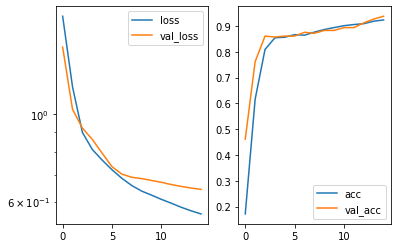

Predicted cell: Cells Probability: [[0.9852845]]
True Cell type: Cells
x [[0.7169597]]
True positional value x 0.5
y [[0.4337873]]
True positional value y 0.5


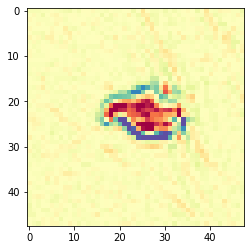

Epoch 16/250
5180/5180 [==============================] - 5s 882us/step - loss: 0.5488 - acc: 0.9328 - val_loss: 0.6401 - val_acc: 0.9451

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6401191395280998, 'val_acc': 0.9450549424349607, 'loss': 0.5487877226013935, 'acc': 0.9328185349817902, 'lr': 1e-06}


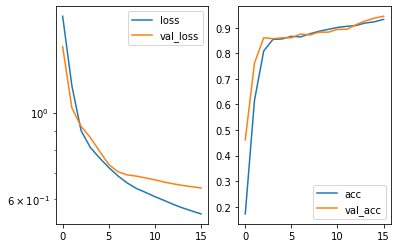

Predicted cell: Cells Probability: [[0.97589713]]
True Cell type: Cells
x [[0.9232753]]
True positional value x 0.7083333333333334
y [[0.503243]]
True positional value y 0.7083333333333334


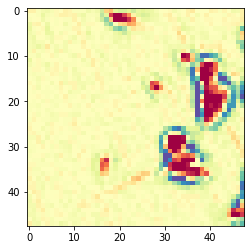

Epoch 17/250
5180/5180 [==============================] - 5s 873us/step - loss: 0.5380 - acc: 0.9396 - val_loss: 0.6358 - val_acc: 0.9487

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.635823401994321, 'val_acc': 0.9487179426046518, 'loss': 0.5379768633013987, 'acc': 0.9395752910481456, 'lr': 1e-06}


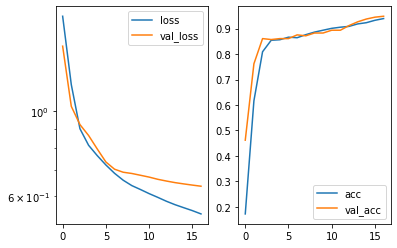

Predicted cell: Cells Probability: [[0.99656975]]
True Cell type: Cells
x [[0.76386803]]
True positional value x 0.7083333333333334
y [[0.7207142]]
True positional value y 0.2916666666666667


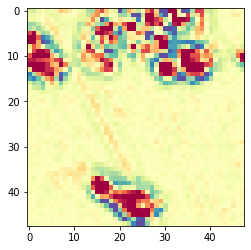

Epoch 18/250
5180/5180 [==============================] - 5s 874us/step - loss: 0.5309 - acc: 0.9413 - val_loss: 0.6323 - val_acc: 0.9597

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6323248628294948, 'val_acc': 0.959706954466991, 'loss': 0.5308758300013524, 'acc': 0.9413127411286343, 'lr': 1e-06}


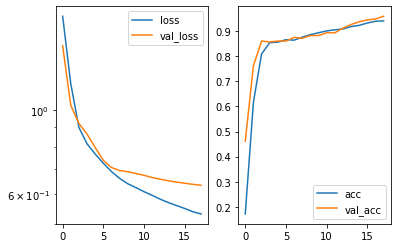

Predicted cell: Normal Probability: [[0.6169452]]
True Cell type: Normal
x [[0.45802864]]
True positional value x 0.5
y [[0.5797221]]
True positional value y 0.5


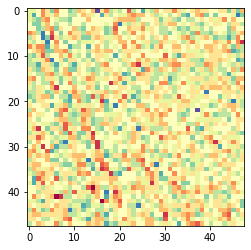

Epoch 19/250
5180/5180 [==============================] - 5s 876us/step - loss: 0.5233 - acc: 0.9490 - val_loss: 0.6274 - val_acc: 0.9597

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6273615268560556, 'val_acc': 0.959706954466991, 'loss': 0.5232527004015491, 'acc': 0.9490347506917122, 'lr': 1e-06}


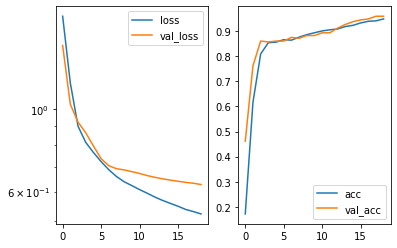

Predicted cell: Cells Probability: [[0.99770665]]
True Cell type: Cells
x [[0.63320047]]
True positional value x 0.2916666666666667
y [[0.635573]]
True positional value y 0.5


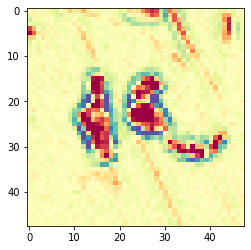

Epoch 20/250
5180/5180 [==============================] - 5s 885us/step - loss: 0.5132 - acc: 0.9525 - val_loss: 0.6233 - val_acc: 0.9597

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6233328731505425, 'val_acc': 0.959706954466991, 'loss': 0.5132362287937444, 'acc': 0.9525096554553647, 'lr': 1e-06}


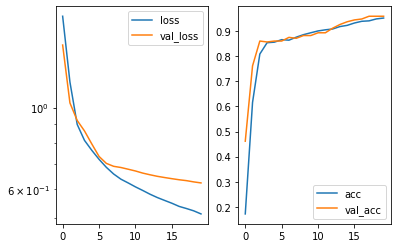

Predicted cell: Cells Probability: [[0.96464235]]
True Cell type: Cells
x [[0.48223627]]
True positional value x 0.7083333333333334
y [[0.39810428]]
True positional value y 0.2916666666666667


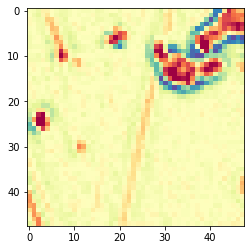

Epoch 21/250
5180/5180 [==============================] - 5s 874us/step - loss: 0.5061 - acc: 0.9556 - val_loss: 0.6185 - val_acc: 0.9670

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6184949154382223, 'val_acc': 0.9670329657229748, 'loss': 0.5061160664300661, 'acc': 0.9555984567491245, 'lr': 1e-06}


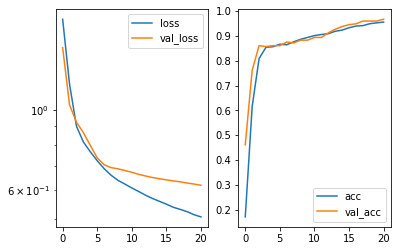

Predicted cell: Normal Probability: [[0.6306414]]
True Cell type: Normal
x [[0.34046155]]
True positional value x 0.5
y [[0.510139]]
True positional value y 0.5


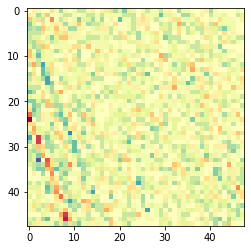

Epoch 22/250
5180/5180 [==============================] - 5s 879us/step - loss: 0.4996 - acc: 0.9571 - val_loss: 0.6149 - val_acc: 0.9670

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6149008656159426, 'val_acc': 0.9670329657229748, 'loss': 0.49960960039300806, 'acc': 0.9571428611932113, 'lr': 1e-06}


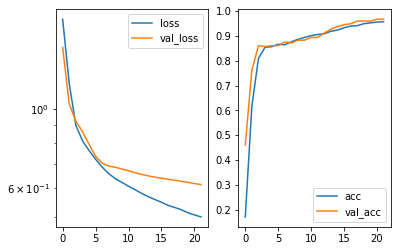

Predicted cell: Cells Probability: [[0.9422531]]
True Cell type: Cells
x [[0.16897519]]
True positional value x 0.2916666666666667
y [[0.61116755]]
True positional value y 0.7083333333333334


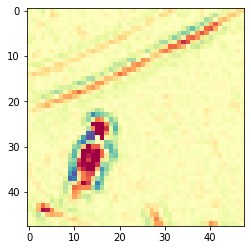

Epoch 23/250
5180/5180 [==============================] - 5s 881us/step - loss: 0.4930 - acc: 0.9589 - val_loss: 0.6107 - val_acc: 0.9707

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6106858008947128, 'val_acc': 0.9706959658926659, 'loss': 0.49304602677757675, 'acc': 0.958880310353165, 'lr': 1e-06}


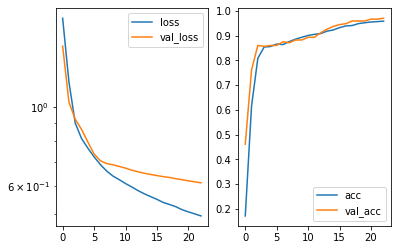

Predicted cell: Cells Probability: [[0.8750736]]
True Cell type: Cells
x [[0.72558385]]
True positional value x 0.7083333333333334
y [[0.38708082]]
True positional value y 0.2916666666666667


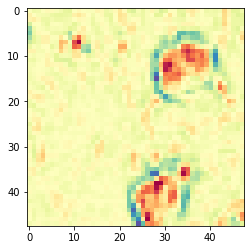

Epoch 24/250
5180/5180 [==============================] - 5s 886us/step - loss: 0.4874 - acc: 0.9614 - val_loss: 0.6070 - val_acc: 0.9744

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6069983224292378, 'val_acc': 0.974358971520658, 'loss': 0.4873747977510843, 'acc': 0.9613899662227704, 'lr': 1e-06}


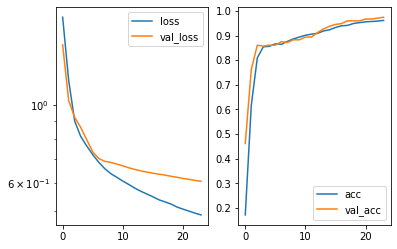

Predicted cell: Cells Probability: [[0.9969759]]
True Cell type: Cells
x [[0.3964129]]
True positional value x 0.5
y [[0.5190054]]
True positional value y 0.5


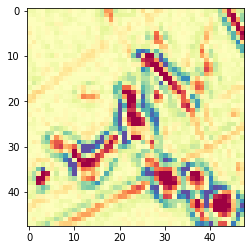

Epoch 25/250
5180/5180 [==============================] - 5s 875us/step - loss: 0.4817 - acc: 0.9606 - val_loss: 0.6035 - val_acc: 0.9744

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.6034960233684861, 'val_acc': 0.974358971520658, 'loss': 0.48165305286760957, 'acc': 0.9606177590528511, 'lr': 1e-06}


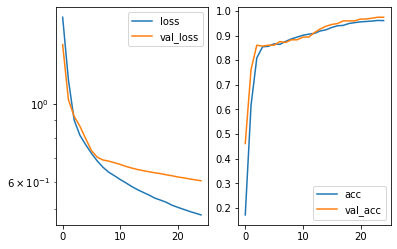

Predicted cell: Normal Probability: [[0.68405646]]
True Cell type: Normal
x [[0.667091]]
True positional value x 0.5
y [[0.49565378]]
True positional value y 0.5


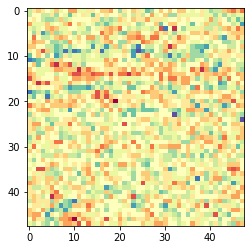

Epoch 26/250
5180/5180 [==============================] - 5s 885us/step - loss: 0.4756 - acc: 0.9624 - val_loss: 0.6000 - val_acc: 0.9744

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5999930621066809, 'val_acc': 0.974358971520658, 'loss': 0.4756458317681169, 'acc': 0.9623552171880214, 'lr': 1e-06}


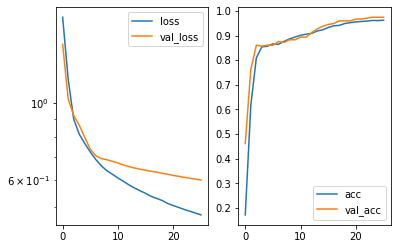

Predicted cell: Cells Probability: [[0.88981706]]
True Cell type: Cells
x [[0.48953003]]
True positional value x 0.5
y [[0.6169659]]
True positional value y 0.7083333333333334


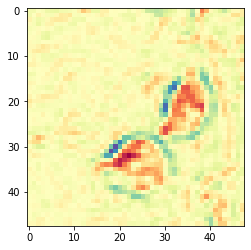

Epoch 27/250
5180/5180 [==============================] - 4s 866us/step - loss: 0.4702 - acc: 0.9637 - val_loss: 0.5971 - val_acc: 0.9744

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.597110302238674, 'val_acc': 0.974358971520658, 'loss': 0.47020787081202947, 'acc': 0.9637065651794198, 'lr': 1e-06}


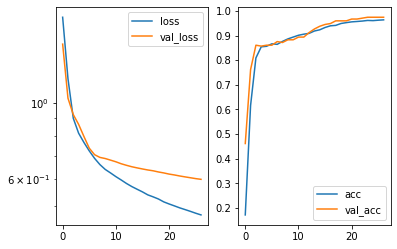

Predicted cell: Cells Probability: [[0.98168474]]
True Cell type: Cells
x [[0.552417]]
True positional value x 0.7083333333333334
y [[0.7490784]]
True positional value y 0.7083333333333334


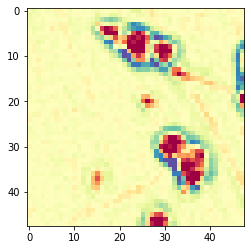

Epoch 28/250
5180/5180 [==============================] - 5s 871us/step - loss: 0.4653 - acc: 0.9641 - val_loss: 0.5940 - val_acc: 0.9744

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5939968606054564, 'val_acc': 0.974358971520658, 'loss': 0.46534951152028264, 'acc': 0.9640926695698476, 'lr': 1e-06}


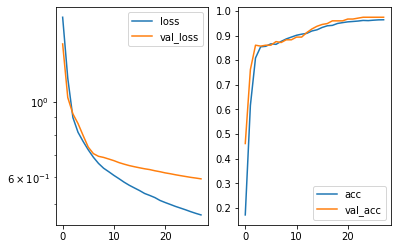

Predicted cell: Cells Probability: [[0.8764423]]
True Cell type: Cells
x [[0.17716804]]
True positional value x 0.2916666666666667
y [[0.31052783]]
True positional value y 0.2916666666666667


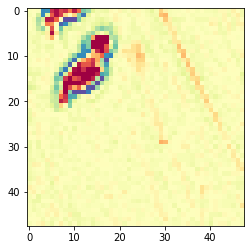

Epoch 29/250
5180/5180 [==============================] - 5s 872us/step - loss: 0.4601 - acc: 0.9653 - val_loss: 0.5912 - val_acc: 0.9744

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5912022313355526, 'val_acc': 0.974358971520658, 'loss': 0.4600522496295251, 'acc': 0.9652509710043093, 'lr': 1e-06}


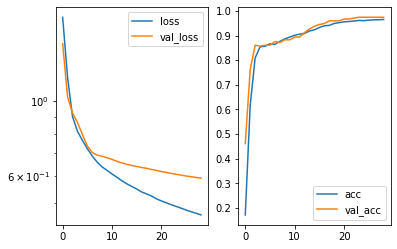

Predicted cell: Normal Probability: [[0.73034346]]
True Cell type: Normal
x [[0.37862235]]
True positional value x 0.5
y [[0.46455342]]
True positional value y 0.5


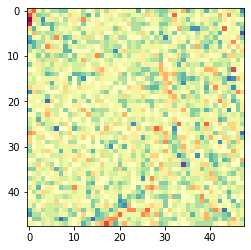

Epoch 30/250
5180/5180 [==============================] - 5s 874us/step - loss: 0.4551 - acc: 0.9653 - val_loss: 0.5885 - val_acc: 0.9744

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5885272560975491, 'val_acc': 0.974358971520658, 'loss': 0.45510403495497687, 'acc': 0.9652509719248444, 'lr': 1e-06}


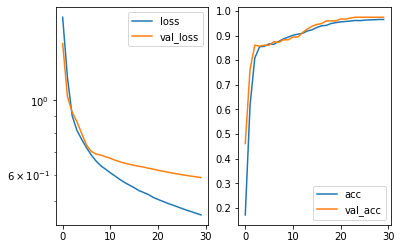

Predicted cell: Cells Probability: [[0.98836106]]
True Cell type: Cells
x [[0.3246612]]
True positional value x 0.5
y [[0.55884075]]
True positional value y 0.7083333333333334


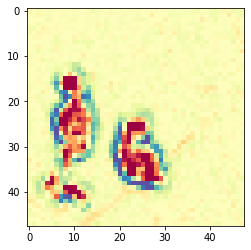

Epoch 31/250
5180/5180 [==============================] - 5s 890us/step - loss: 0.4516 - acc: 0.9660 - val_loss: 0.5861 - val_acc: 0.9744

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5861133109955561, 'val_acc': 0.974358971520658, 'loss': 0.45156671158595435, 'acc': 0.9660231664374068, 'lr': 1e-06}


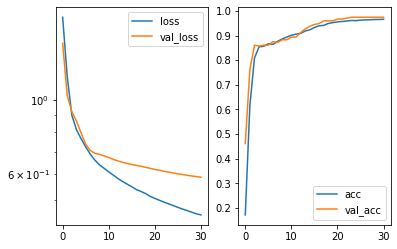

Predicted cell: Cells Probability: [[0.94104177]]
True Cell type: Cells
x [[0.7513403]]
True positional value x 0.7083333333333334
y [[0.7417198]]
True positional value y 0.7083333333333334


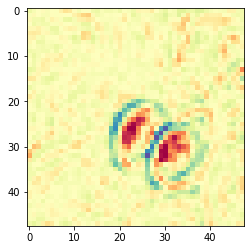

Epoch 32/250
5180/5180 [==============================] - 5s 873us/step - loss: 0.4474 - acc: 0.9653 - val_loss: 0.5837 - val_acc: 0.9744

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5837194116124304, 'val_acc': 0.974358971520658, 'loss': 0.4473622387210375, 'acc': 0.9652509730755132, 'lr': 1e-06}


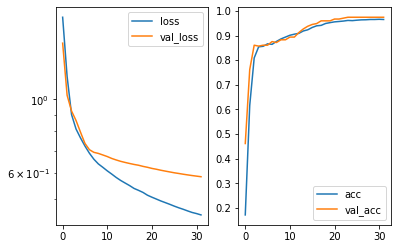

Predicted cell: Normal Probability: [[0.699371]]
True Cell type: Normal
x [[0.477798]]
True positional value x 0.5
y [[0.44332543]]
True positional value y 0.5


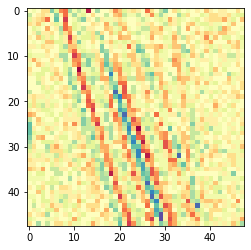

Epoch 33/250
5180/5180 [==============================] - 5s 876us/step - loss: 0.4438 - acc: 0.9678 - val_loss: 0.5816 - val_acc: 0.9744

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5816348029143644, 'val_acc': 0.974358971520658, 'loss': 0.44377029839629833, 'acc': 0.9677606243424434, 'lr': 1e-06}


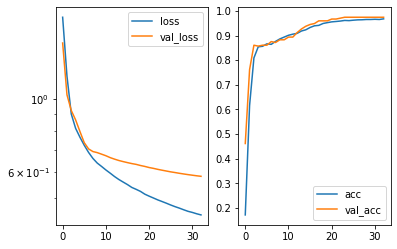

Predicted cell: Cells Probability: [[0.98956877]]
True Cell type: Cells
x [[0.30080414]]
True positional value x 0.2916666666666667
y [[0.42466044]]
True positional value y 0.7083333333333334


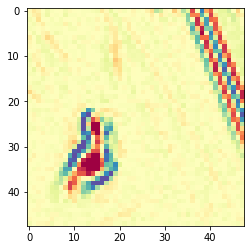

Epoch 34/250
5180/5180 [==============================] - 5s 876us/step - loss: 0.4396 - acc: 0.9670 - val_loss: 0.5793 - val_acc: 0.9744

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5792800795027625, 'val_acc': 0.974358971520658, 'loss': 0.43956569953314584, 'acc': 0.9669884233861357, 'lr': 1e-06}


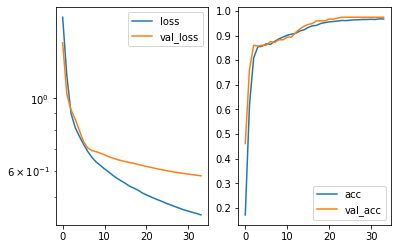

Predicted cell: Cells Probability: [[0.9946768]]
True Cell type: Cells
x [[0.4702802]]
True positional value x 0.2916666666666667
y [[0.7903241]]
True positional value y 0.7083333333333334


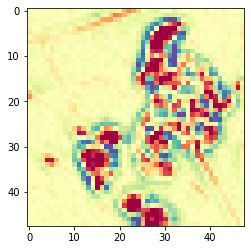

Epoch 35/250
5180/5180 [==============================] - 5s 873us/step - loss: 0.4357 - acc: 0.9666 - val_loss: 0.5776 - val_acc: 0.9744

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.577630224900368, 'val_acc': 0.974358971520658, 'loss': 0.43571119994270296, 'acc': 0.9666023219874467, 'lr': 1e-06}


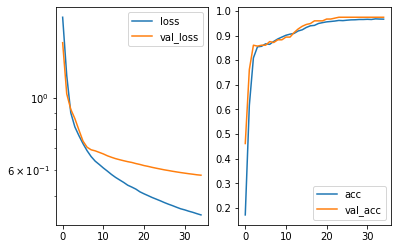

Predicted cell: Cells Probability: [[0.97693205]]
True Cell type: Cells
x [[0.69837695]]
True positional value x 0.2916666666666667
y [[0.8787403]]
True positional value y 0.7083333333333334


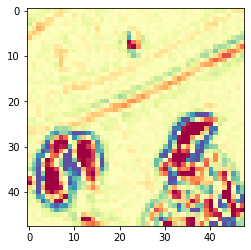

Epoch 36/250
5180/5180 [==============================] - 5s 878us/step - loss: 0.4327 - acc: 0.9681 - val_loss: 0.5756 - val_acc: 0.9744

Epoch 00036: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5755630847298618, 'val_acc': 0.974358971520658, 'loss': 0.4327177632039118, 'acc': 0.9681467245904636, 'lr': 1e-06}


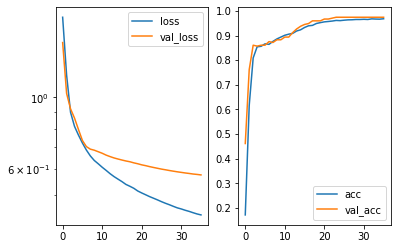

Predicted cell: Cells Probability: [[0.98336214]]
True Cell type: Cells
x [[0.8063586]]
True positional value x 0.7083333333333334
y [[0.6286709]]
True positional value y 0.5


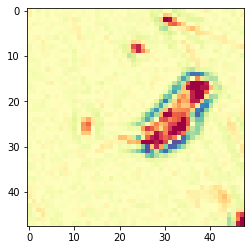

Epoch 37/250
5180/5180 [==============================] - 5s 880us/step - loss: 0.4303 - acc: 0.9680 - val_loss: 0.5739 - val_acc: 0.9744

Epoch 00037: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.573882723684276, 'val_acc': 0.974358971520658, 'loss': 0.4303484994011956, 'acc': 0.9679536734308515, 'lr': 1e-06}


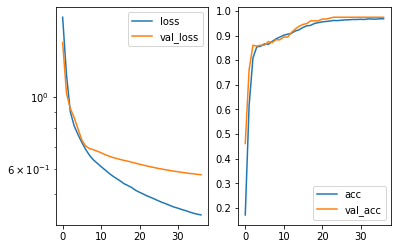

Predicted cell: Cells Probability: [[0.9898801]]
True Cell type: Cells
x [[0.5161885]]
True positional value x 0.2916666666666667
y [[0.4010049]]
True positional value y 0.5


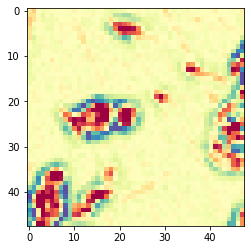

Epoch 38/250
5180/5180 [==============================] - 5s 870us/step - loss: 0.4268 - acc: 0.9685 - val_loss: 0.5725 - val_acc: 0.9744

Epoch 00038: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5724999878432725, 'val_acc': 0.974358971520658, 'loss': 0.426785126155868, 'acc': 0.9685328246083499, 'lr': 1e-06}


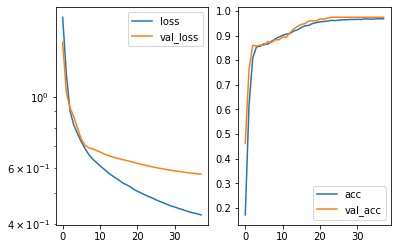

Predicted cell: Cells Probability: [[0.997389]]
True Cell type: Cells
x [[0.47558764]]
True positional value x 0.5
y [[0.36152744]]
True positional value y 0.5


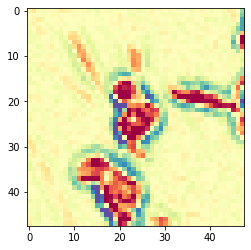

Epoch 39/250
5180/5180 [==============================] - 5s 870us/step - loss: 0.4240 - acc: 0.9676 - val_loss: 0.5709 - val_acc: 0.9744

Epoch 00039: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5708754877031068, 'val_acc': 0.974358971520658, 'loss': 0.42404336427629685, 'acc': 0.9675675722622964, 'lr': 1e-06}


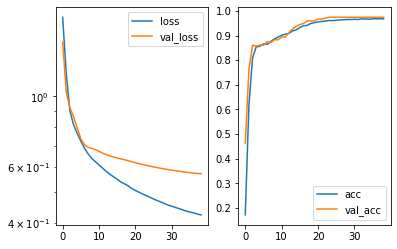

Predicted cell: Cells Probability: [[0.9145526]]
True Cell type: Cells
x [[0.5308724]]
True positional value x 0.5
y [[0.43027797]]
True positional value y 0.2916666666666667


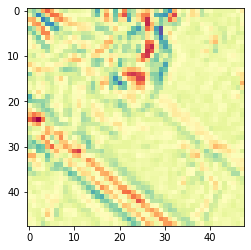

Epoch 40/250
5180/5180 [==============================] - 5s 876us/step - loss: 0.4194 - acc: 0.9695 - val_loss: 0.5696 - val_acc: 0.9744

Epoch 00040: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5696231102768755, 'val_acc': 0.974358971520658, 'loss': 0.41939820354969803, 'acc': 0.9694980778749385, 'lr': 1e-06}


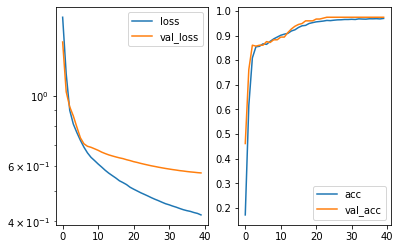

Predicted cell: Cells Probability: [[0.9900596]]
True Cell type: Cells
x [[0.5105945]]
True positional value x 0.5
y [[0.1501447]]
True positional value y 0.2916666666666667


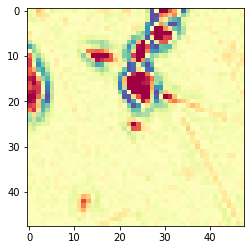

Epoch 41/250
5180/5180 [==============================] - 5s 877us/step - loss: 0.4181 - acc: 0.9683 - val_loss: 0.5680 - val_acc: 0.9744

Epoch 00041: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5679794894906628, 'val_acc': 0.974358971520658, 'loss': 0.4180654370186412, 'acc': 0.9683397745994067, 'lr': 1e-06}


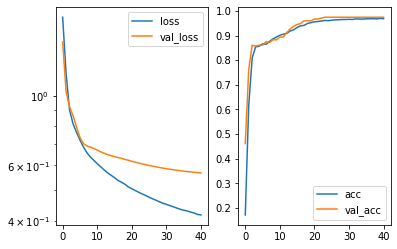

Predicted cell: Cells Probability: [[0.99333006]]
True Cell type: Cells
x [[0.7810148]]
True positional value x 0.5
y [[0.36420733]]
True positional value y 0.5


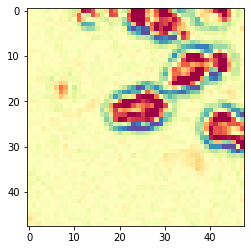

Epoch 42/250
5180/5180 [==============================] - 5s 889us/step - loss: 0.4152 - acc: 0.9695 - val_loss: 0.5667 - val_acc: 0.9744

Epoch 00042: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5667249261241256, 'val_acc': 0.974358971520658, 'loss': 0.41522434077667913, 'acc': 0.9694980790256074, 'lr': 1e-06}


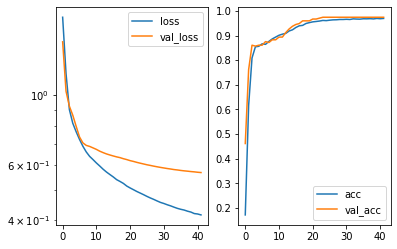

Predicted cell: Cells Probability: [[0.97215885]]
True Cell type: Cells
x [[0.19849497]]
True positional value x 0.2916666666666667
y [[0.46698228]]
True positional value y 0.5


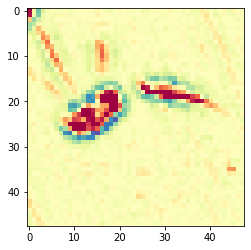

Epoch 43/250
5180/5180 [==============================] - 5s 875us/step - loss: 0.4122 - acc: 0.9689 - val_loss: 0.5656 - val_acc: 0.9744

Epoch 00043: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5655857173951118, 'val_acc': 0.974358971520658, 'loss': 0.4121652013086444, 'acc': 0.9689189266974402, 'lr': 1e-06}


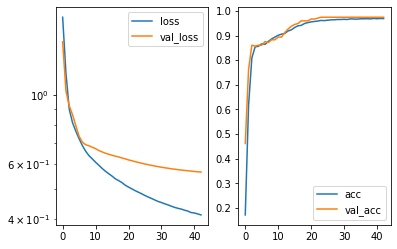

Predicted cell: Cells Probability: [[0.99272513]]
True Cell type: Cells
x [[0.59380114]]
True positional value x 0.5
y [[0.20151739]]
True positional value y 0.2916666666666667


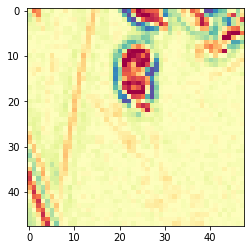

Epoch 44/250
5180/5180 [==============================] - 5s 869us/step - loss: 0.4103 - acc: 0.9693 - val_loss: 0.5644 - val_acc: 0.9744

Epoch 00044: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5643770526617001, 'val_acc': 0.974358971520658, 'loss': 0.4102927468228064, 'acc': 0.9693050246441226, 'lr': 1e-06}


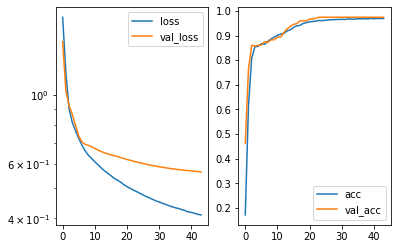

Predicted cell: Cells Probability: [[0.94619477]]
True Cell type: Cells
x [[0.75394976]]
True positional value x 0.2916666666666667
y [[0.925683]]
True positional value y 0.7083333333333334


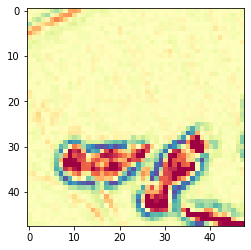

Epoch 45/250
5180/5180 [==============================] - 5s 886us/step - loss: 0.4083 - acc: 0.9691 - val_loss: 0.5635 - val_acc: 0.9744

Epoch 00045: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5634625851016342, 'val_acc': 0.974358971520658, 'loss': 0.4082837282000361, 'acc': 0.9691119757858483, 'lr': 1e-06}


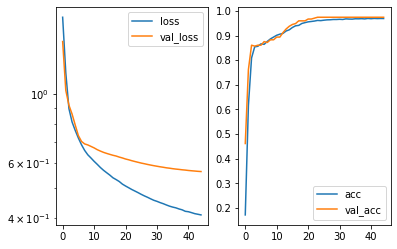

Predicted cell: Cells Probability: [[0.9922086]]
True Cell type: Cells
x [[0.7119318]]
True positional value x 0.5
y [[0.47485426]]
True positional value y 0.2916666666666667


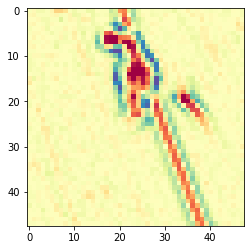

Epoch 46/250
5180/5180 [==============================] - 4s 862us/step - loss: 0.4060 - acc: 0.9695 - val_loss: 0.5623 - val_acc: 0.9744

Epoch 00046: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5622727916790888, 'val_acc': 0.974358971520658, 'loss': 0.4059557128827084, 'acc': 0.9694980723517281, 'lr': 1e-06}


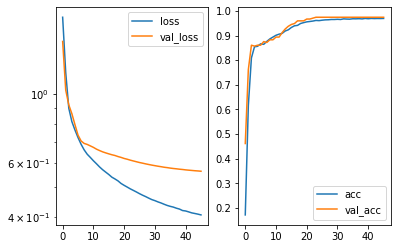

Predicted cell: Cells Probability: [[0.951938]]
True Cell type: Cells
x [[0.75602865]]
True positional value x 0.7083333333333334
y [[0.7403218]]
True positional value y 0.7083333333333334


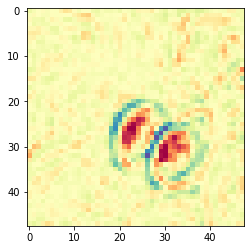

Epoch 47/250
5180/5180 [==============================] - 5s 896us/step - loss: 0.4027 - acc: 0.9703 - val_loss: 0.5613 - val_acc: 0.9744

Epoch 00047: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5613043823521653, 'val_acc': 0.974358971520658, 'loss': 0.4027186788647331, 'acc': 0.9702702756093736, 'lr': 1e-06}


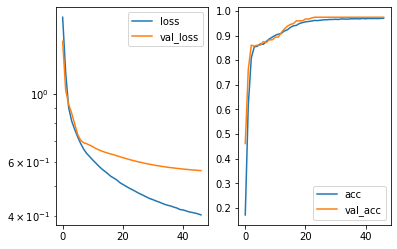

Predicted cell: Cells Probability: [[0.9851383]]
True Cell type: Cells
x [[0.80894536]]
True positional value x 0.7083333333333334
y [[0.6190049]]
True positional value y 0.5


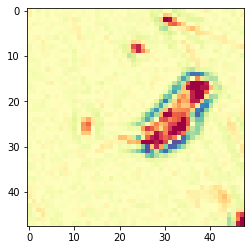

Epoch 48/250
5180/5180 [==============================] - 4s 850us/step - loss: 0.4006 - acc: 0.9695 - val_loss: 0.5601 - val_acc: 0.9744

Epoch 00048: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5601280807575464, 'val_acc': 0.974358971520658, 'loss': 0.40055652152617466, 'acc': 0.9694980790256074, 'lr': 1e-06}


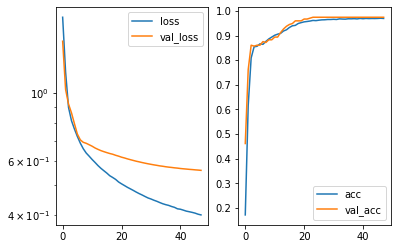

Predicted cell: Cells Probability: [[0.93810195]]
True Cell type: Cells
x [[0.44717312]]
True positional value x 0.2916666666666667
y [[0.1205967]]
True positional value y 0.2916666666666667


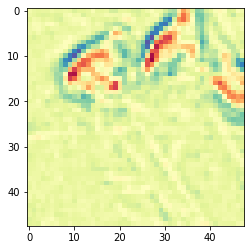

Epoch 49/250
5180/5180 [==============================] - 4s 851us/step - loss: 0.3993 - acc: 0.9701 - val_loss: 0.5592 - val_acc: 0.9744

Epoch 00049: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5592476358780494, 'val_acc': 0.974358971520658, 'loss': 0.3993247205456251, 'acc': 0.970077226981233, 'lr': 1e-06}


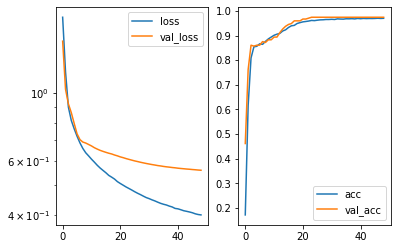

Predicted cell: Cells Probability: [[0.94354147]]
True Cell type: Cells
x [[0.72635144]]
True positional value x 0.7083333333333334
y [[0.22364762]]
True positional value y 0.2916666666666667


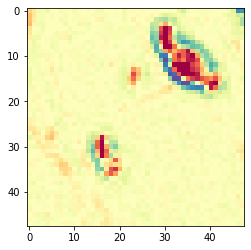

Epoch 50/250
5180/5180 [==============================] - 5s 870us/step - loss: 0.3964 - acc: 0.9705 - val_loss: 0.5585 - val_acc: 0.9744

Epoch 00050: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5585483753637517, 'val_acc': 0.974358971520658, 'loss': 0.39640152040135446, 'acc': 0.9704633313716609, 'lr': 1e-06}


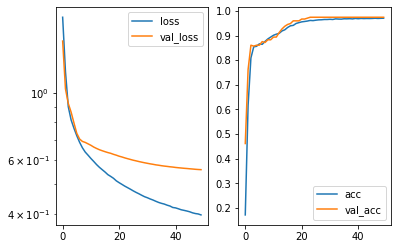

Predicted cell: Cells Probability: [[0.9620014]]
True Cell type: Cells
x [[0.63961715]]
True positional value x 0.7083333333333334
y [[0.54459286]]
True positional value y 0.5


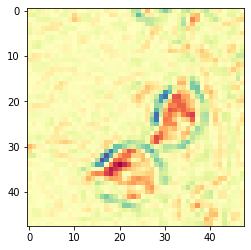

Epoch 51/250
5180/5180 [==============================] - 5s 881us/step - loss: 0.3969 - acc: 0.9710 - val_loss: 0.5577 - val_acc: 0.9744

Epoch 00051: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5576715200811952, 'val_acc': 0.974358971520658, 'loss': 0.39689789499555317, 'acc': 0.9710424770259489, 'lr': 1e-06}


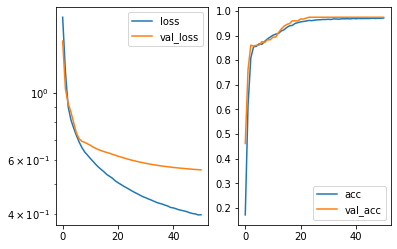

Predicted cell: Cells Probability: [[0.98022527]]
True Cell type: Cells
x [[0.26318732]]
True positional value x 0.2916666666666667
y [[0.3498508]]
True positional value y 0.5


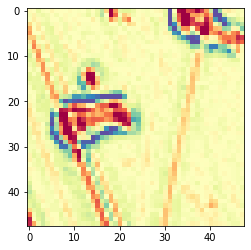

Epoch 52/250
5180/5180 [==============================] - 4s 855us/step - loss: 0.3929 - acc: 0.9707 - val_loss: 0.5571 - val_acc: 0.9744

Epoch 00052: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5571091511310675, 'val_acc': 0.974358971520658, 'loss': 0.3929388457513684, 'acc': 0.9706563779285976, 'lr': 1e-06}


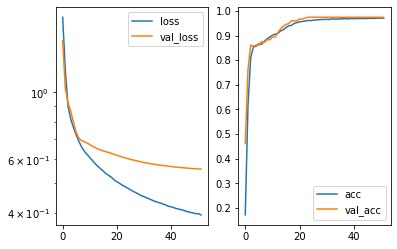

Predicted cell: Normal Probability: [[0.7312938]]
True Cell type: Normal
x [[0.5198116]]
True positional value x 0.5
y [[0.2884614]]
True positional value y 0.5


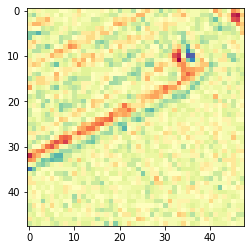

Epoch 53/250
5180/5180 [==============================] - 4s 855us/step - loss: 0.3911 - acc: 0.9701 - val_loss: 0.5562 - val_acc: 0.9744

Epoch 00053: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5561986253375099, 'val_acc': 0.974358971520658, 'loss': 0.391094142405683, 'acc': 0.9700772279017681, 'lr': 1e-06}


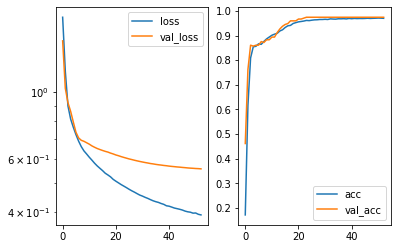

Predicted cell: Cells Probability: [[0.9928833]]
True Cell type: Cells
x [[0.4343975]]
True positional value x 0.7083333333333334
y [[0.33505934]]
True positional value y 0.2916666666666667


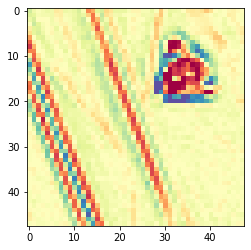

Epoch 54/250
5180/5180 [==============================] - 4s 866us/step - loss: 0.3895 - acc: 0.9707 - val_loss: 0.5554 - val_acc: 0.9744

Epoch 00054: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5553925836479271, 'val_acc': 0.974358971520658, 'loss': 0.3895454376820892, 'acc': 0.9706563793094002, 'lr': 1e-06}


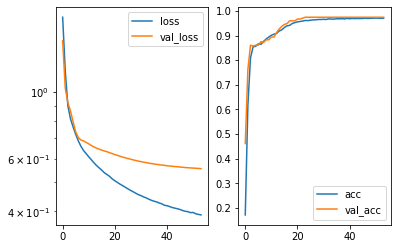

Predicted cell: Cells Probability: [[0.98826396]]
True Cell type: Cells
x [[0.9350008]]
True positional value x 0.7083333333333334
y [[0.4018926]]
True positional value y 0.5


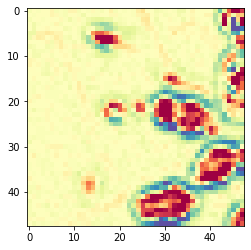

Epoch 55/250
5180/5180 [==============================] - 4s 852us/step - loss: 0.3885 - acc: 0.9714 - val_loss: 0.5545 - val_acc: 0.9744

Epoch 00055: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5544947047373314, 'val_acc': 0.974358971520658, 'loss': 0.3885057727342407, 'acc': 0.9714285814163768, 'lr': 1e-06}


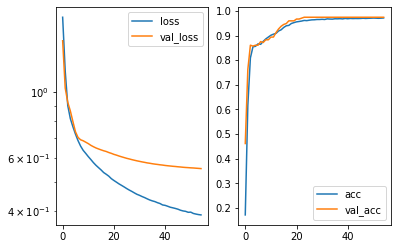

Predicted cell: Cells Probability: [[0.99384004]]
True Cell type: Cells
x [[0.7401993]]
True positional value x 0.7083333333333334
y [[0.5700554]]
True positional value y 0.5


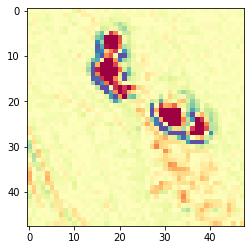

Epoch 56/250
5180/5180 [==============================] - 5s 876us/step - loss: 0.3869 - acc: 0.9720 - val_loss: 0.5538 - val_acc: 0.9744

Epoch 00056: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5538288424739908, 'val_acc': 0.974358971520658, 'loss': 0.38690399974009243, 'acc': 0.9720077325938752, 'lr': 1e-06}


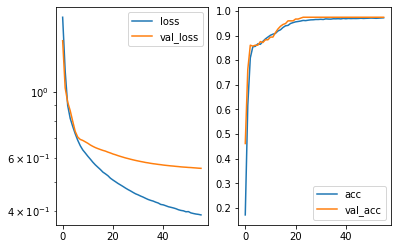

Predicted cell: Cells Probability: [[0.9629857]]
True Cell type: Cells
x [[0.5422084]]
True positional value x 0.5
y [[0.2859266]]
True positional value y 0.2916666666666667


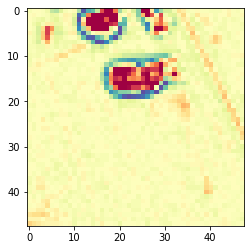

Epoch 57/250
5180/5180 [==============================] - 5s 873us/step - loss: 0.3841 - acc: 0.9718 - val_loss: 0.5530 - val_acc: 0.9744

Epoch 00057: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5529897381097842, 'val_acc': 0.974358971520658, 'loss': 0.3841038546506963, 'acc': 0.9718146805137281, 'lr': 1e-06}


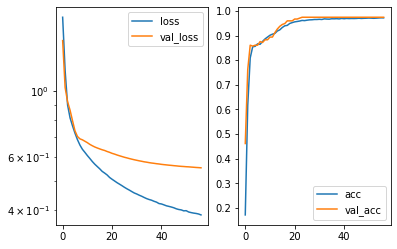

Predicted cell: Cells Probability: [[0.9530304]]
True Cell type: Cells
x [[0.11503396]]
True positional value x 0.2916666666666667
y [[0.3628142]]
True positional value y 0.2916666666666667


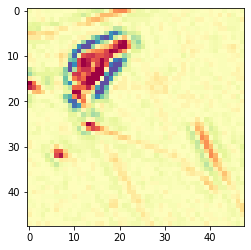

Epoch 58/250
5180/5180 [==============================] - 5s 879us/step - loss: 0.3830 - acc: 0.9716 - val_loss: 0.5523 - val_acc: 0.9744

Epoch 00058: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5523458992168581, 'val_acc': 0.974358971520658, 'loss': 0.383019928421293, 'acc': 0.9716216245213071, 'lr': 1e-06}


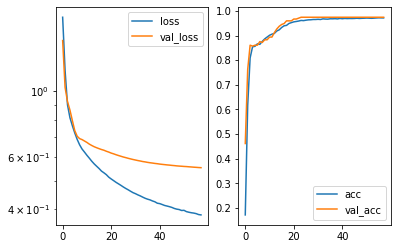

Predicted cell: Cells Probability: [[0.988684]]
True Cell type: Cells
x [[0.38855287]]
True positional value x 0.7083333333333334
y [[0.24411541]]
True positional value y 0.2916666666666667


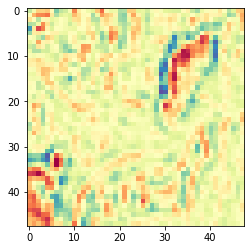

Epoch 59/250
5180/5180 [==============================] - 5s 900us/step - loss: 0.3822 - acc: 0.9707 - val_loss: 0.5515 - val_acc: 0.9744

Epoch 00059: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5515275038642324, 'val_acc': 0.974358971520658, 'loss': 0.382237651518413, 'acc': 0.9706563724053873, 'lr': 1e-06}


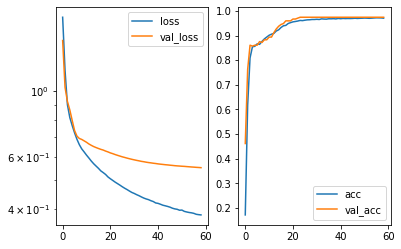

Predicted cell: Cells Probability: [[0.9798621]]
True Cell type: Cells
x [[0.44547084]]
True positional value x 0.5
y [[0.5003575]]
True positional value y 0.5


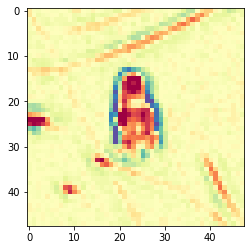

Epoch 60/250
5180/5180 [==============================] - 5s 894us/step - loss: 0.3787 - acc: 0.9718 - val_loss: 0.5511 - val_acc: 0.9744

Epoch 00060: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5511063701940544, 'val_acc': 0.974358971520658, 'loss': 0.378741636929825, 'acc': 0.9718146816643969, 'lr': 1e-06}


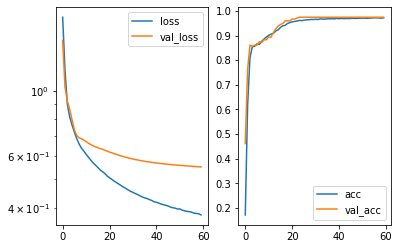

Predicted cell: Normal Probability: [[0.86889046]]
True Cell type: Normal
x [[0.5174441]]
True positional value x 0.5
y [[0.41648808]]
True positional value y 0.5


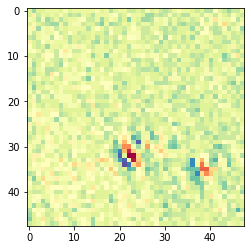

Epoch 61/250
5180/5180 [==============================] - 5s 917us/step - loss: 0.3785 - acc: 0.9710 - val_loss: 0.5501 - val_acc: 0.9744

Epoch 00061: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5501200622254676, 'val_acc': 0.974358971520658, 'loss': 0.3784533546928273, 'acc': 0.9710424790971528, 'lr': 1e-06}


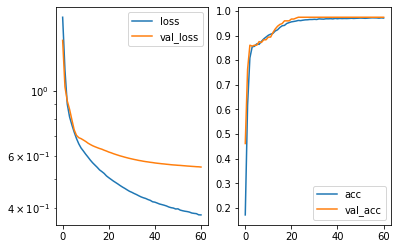

Predicted cell: Cells Probability: [[0.9884687]]
True Cell type: Cells
x [[0.71868837]]
True positional value x 0.5
y [[0.16663955]]
True positional value y 0.2916666666666667


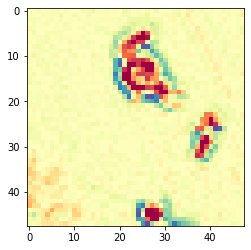

Epoch 62/250
5180/5180 [==============================] - 5s 901us/step - loss: 0.3762 - acc: 0.9722 - val_loss: 0.5497 - val_acc: 0.9744

Epoch 00062: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.549701221041627, 'val_acc': 0.974358971520658, 'loss': 0.37619464266254177, 'acc': 0.9722007826028183, 'lr': 1e-06}


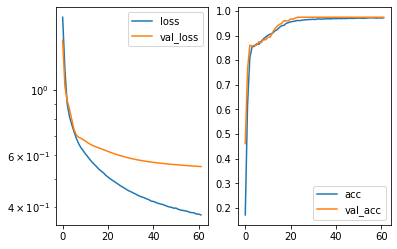

Predicted cell: Cells Probability: [[0.9874839]]
True Cell type: Cells
x [[0.53207403]]
True positional value x 0.5
y [[0.5879793]]
True positional value y 0.7083333333333334


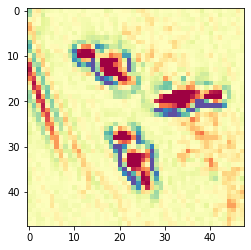

Epoch 63/250
5180/5180 [==============================] - 5s 892us/step - loss: 0.3749 - acc: 0.9718 - val_loss: 0.5491 - val_acc: 0.9744

Epoch 00063: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5491409631439181, 'val_acc': 0.974358971520658, 'loss': 0.37486168247392276, 'acc': 0.9718146793630592, 'lr': 1e-06}


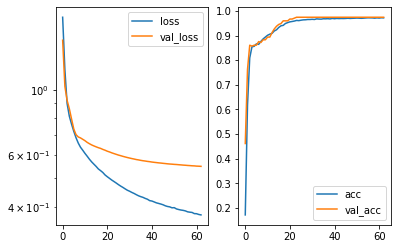

Predicted cell: Cells Probability: [[0.9869059]]
True Cell type: Cells
x [[0.6961102]]
True positional value x 0.5
y [[0.40704808]]
True positional value y 0.5


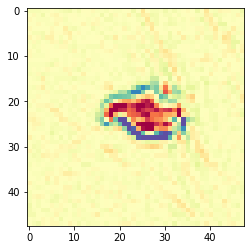

Epoch 64/250
5180/5180 [==============================] - 4s 865us/step - loss: 0.3740 - acc: 0.9716 - val_loss: 0.5488 - val_acc: 0.9744

Epoch 00064: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5487543150182173, 'val_acc': 0.974358971520658, 'loss': 0.3740302227638863, 'acc': 0.9716216268226446, 'lr': 1e-06}


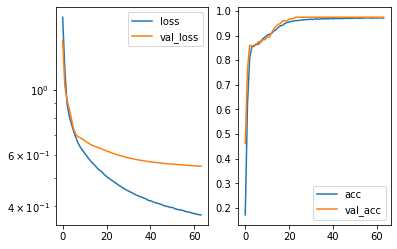

Predicted cell: Cells Probability: [[0.97974056]]
True Cell type: Cells
x [[0.2683187]]
True positional value x 0.5
y [[0.37172192]]
True positional value y 0.2916666666666667


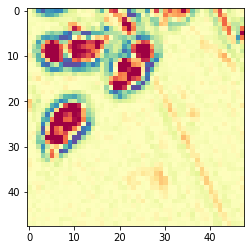

Epoch 65/250
5180/5180 [==============================] - 5s 873us/step - loss: 0.3720 - acc: 0.9722 - val_loss: 0.5483 - val_acc: 0.9744

Epoch 00065: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5482622817322448, 'val_acc': 0.974358971520658, 'loss': 0.3720398643072047, 'acc': 0.972200784904156, 'lr': 1e-06}


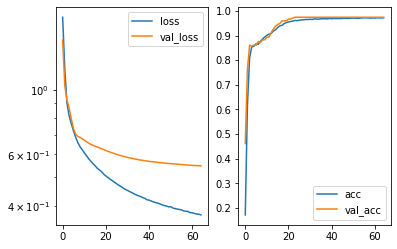

Predicted cell: Cells Probability: [[0.9882703]]
True Cell type: Cells
x [[0.82937235]]
True positional value x 0.7083333333333334
y [[0.13690953]]
True positional value y 0.2916666666666667


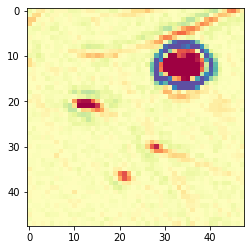

Epoch 66/250
5180/5180 [==============================] - 4s 854us/step - loss: 0.3715 - acc: 0.9724 - val_loss: 0.5477 - val_acc: 0.9744

Epoch 00066: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.547666215634608, 'val_acc': 0.974358971520658, 'loss': 0.3715369265282016, 'acc': 0.9723938326117615, 'lr': 1e-06}


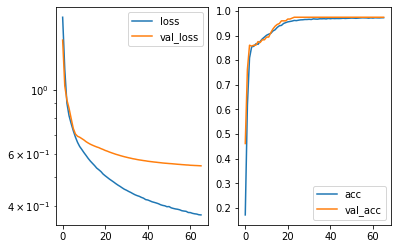

Predicted cell: Cells Probability: [[0.9930006]]
True Cell type: Cells
x [[0.43045565]]
True positional value x 0.7083333333333334
y [[0.34915993]]
True positional value y 0.2916666666666667


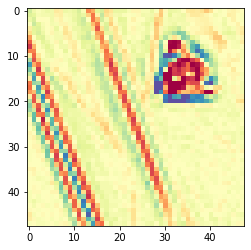

Epoch 67/250
5180/5180 [==============================] - 5s 919us/step - loss: 0.3699 - acc: 0.9718 - val_loss: 0.5471 - val_acc: 0.9744

Epoch 00067: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5470880767801306, 'val_acc': 0.974358971520658, 'loss': 0.36990802030305603, 'acc': 0.9718146837356008, 'lr': 1e-06}


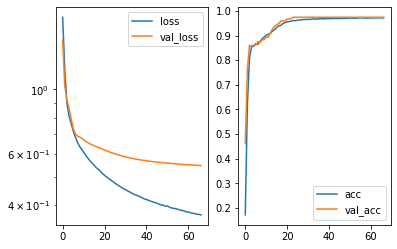

Predicted cell: Cells Probability: [[0.85140574]]
True Cell type: Cells
x [[0.6222895]]
True positional value x 0.7083333333333334
y [[0.49636823]]
True positional value y 0.2916666666666667


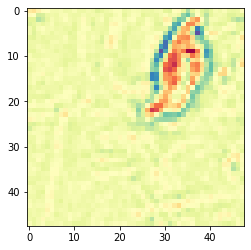

Epoch 68/250
5180/5180 [==============================] - 5s 932us/step - loss: 0.3680 - acc: 0.9730 - val_loss: 0.5466 - val_acc: 0.9744

Epoch 00068: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5465909773176842, 'val_acc': 0.974358971520658, 'loss': 0.36799710724344586, 'acc': 0.9729729840193936, 'lr': 1e-06}


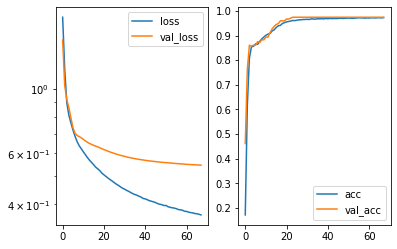

Predicted cell: Cells Probability: [[0.9630708]]
True Cell type: Cells
x [[0.54858017]]
True positional value x 0.5
y [[0.2941555]]
True positional value y 0.2916666666666667


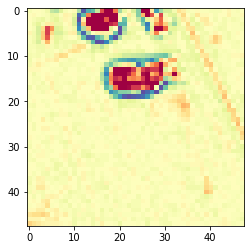

Epoch 69/250
5180/5180 [==============================] - 5s 945us/step - loss: 0.3661 - acc: 0.9734 - val_loss: 0.5457 - val_acc: 0.9744

Epoch 00069: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.545702841474023, 'val_acc': 0.974358971520658, 'loss': 0.36608351508162656, 'acc': 0.9733590861084839, 'lr': 1e-06}


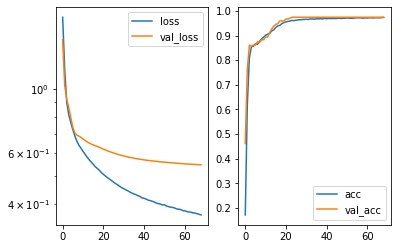

Predicted cell: Cells Probability: [[0.9610374]]
True Cell type: Cells
x [[0.75330013]]
True positional value x 0.7083333333333334
y [[0.73534006]]
True positional value y 0.7083333333333334


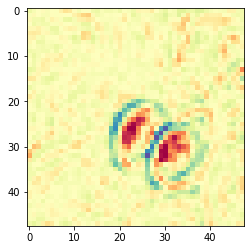

Epoch 70/250
5180/5180 [==============================] - 5s 913us/step - loss: 0.3658 - acc: 0.9726 - val_loss: 0.5454 - val_acc: 0.9744

Epoch 00070: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5454056029354696, 'val_acc': 0.974358971520658, 'loss': 0.3657955870204911, 'acc': 0.9725868791686982, 'lr': 1e-06}


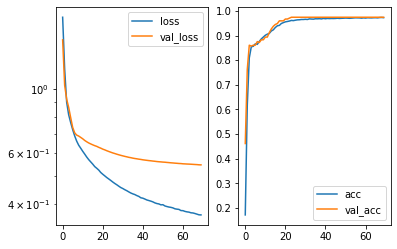

Predicted cell: Cells Probability: [[0.96126103]]
True Cell type: Cells
x [[0.75511384]]
True positional value x 0.7083333333333334
y [[0.73225176]]
True positional value y 0.7083333333333334


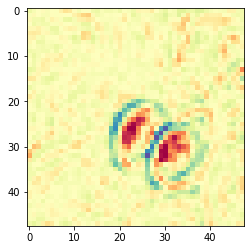

Epoch 71/250
5180/5180 [==============================] - 5s 906us/step - loss: 0.3643 - acc: 0.9736 - val_loss: 0.5448 - val_acc: 0.9780

Epoch 00071: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5447759695978829, 'val_acc': 0.9780219935235523, 'loss': 0.36428866250634656, 'acc': 0.9735521317448855, 'lr': 1e-06}


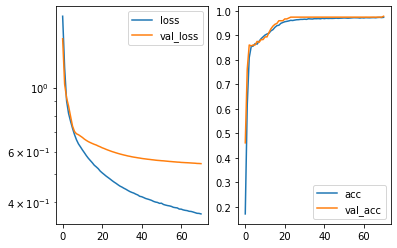

Predicted cell: Cells Probability: [[0.953059]]
True Cell type: Cells
x [[0.52894294]]
True positional value x 0.5
y [[0.5320418]]
True positional value y 0.5


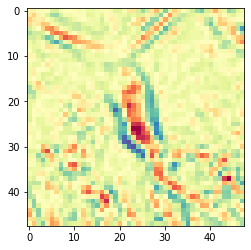

Epoch 72/250
5180/5180 [==============================] - 5s 899us/step - loss: 0.3629 - acc: 0.9734 - val_loss: 0.5444 - val_acc: 0.9780

Epoch 00072: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.544436901480287, 'val_acc': 0.9780219935235523, 'loss': 0.36292675966001386, 'acc': 0.9733590861084839, 'lr': 1e-06}


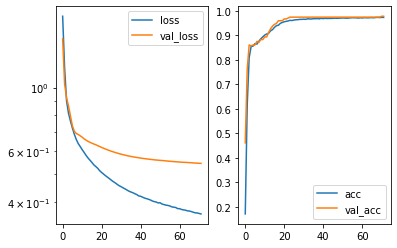

Predicted cell: Cells Probability: [[0.9962722]]
True Cell type: Cells
x [[0.47435856]]
True positional value x 0.7083333333333334
y [[0.83102316]]
True positional value y 0.5


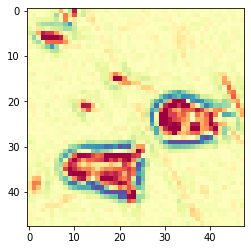

Epoch 73/250
5180/5180 [==============================] - 5s 869us/step - loss: 0.3625 - acc: 0.9736 - val_loss: 0.5439 - val_acc: 0.9780

Epoch 00073: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.543922687843169, 'val_acc': 0.9780219935235523, 'loss': 0.36253371846261634, 'acc': 0.9735521328955543, 'lr': 1e-06}


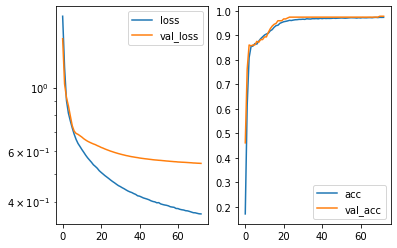

Predicted cell: Cells Probability: [[0.9910124]]
True Cell type: Cells
x [[0.50257397]]
True positional value x 0.5
y [[0.36113146]]
True positional value y 0.5


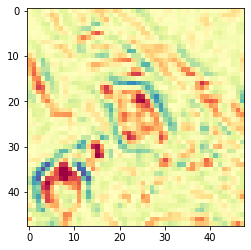

Epoch 74/250
5180/5180 [==============================] - 5s 871us/step - loss: 0.3617 - acc: 0.9734 - val_loss: 0.5435 - val_acc: 0.9780

Epoch 00074: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5434623059335646, 'val_acc': 0.9780219935235523, 'loss': 0.3616758066024559, 'acc': 0.9733590838071462, 'lr': 1e-06}


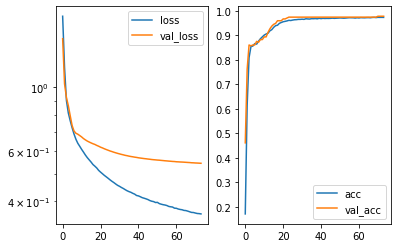

Predicted cell: Cells Probability: [[0.9611725]]
True Cell type: Cells
x [[0.68469536]]
True positional value x 0.7083333333333334
y [[0.50872093]]
True positional value y 0.2916666666666667


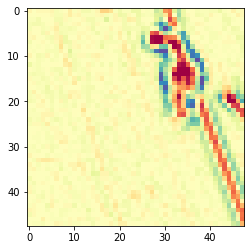

Epoch 75/250
5180/5180 [==============================] - 4s 848us/step - loss: 0.3595 - acc: 0.9730 - val_loss: 0.5432 - val_acc: 0.9780

Epoch 00075: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5431558983229892, 'val_acc': 0.9780219935235523, 'loss': 0.35954205260313615, 'acc': 0.9729729814879222, 'lr': 1e-06}


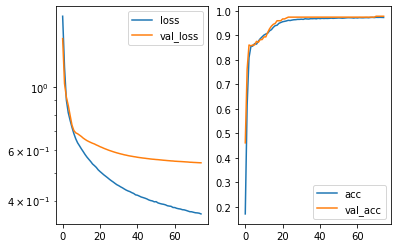

Predicted cell: Cells Probability: [[0.9068109]]
True Cell type: Cells
x [[0.3843252]]
True positional value x 0.2916666666666667
y [[0.6093576]]
True positional value y 0.5


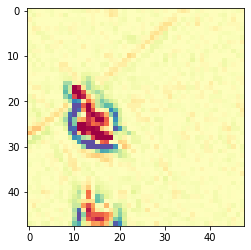

Epoch 76/250
5180/5180 [==============================] - 4s 847us/step - loss: 0.3580 - acc: 0.9736 - val_loss: 0.5425 - val_acc: 0.9780

Epoch 00076: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5425393782255851, 'val_acc': 0.9780219935235523, 'loss': 0.3579622412740494, 'acc': 0.9735521280627453, 'lr': 1e-06}


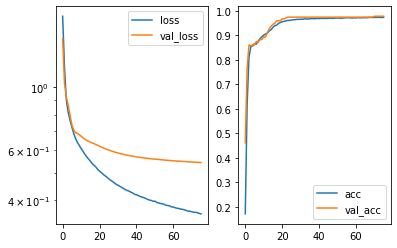

Predicted cell: Cells Probability: [[0.968698]]
True Cell type: Cells
x [[0.5819705]]
True positional value x 0.2916666666666667
y [[0.36786062]]
True positional value y 0.5


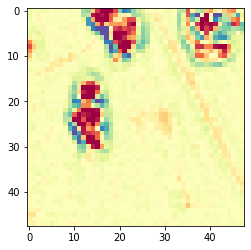

Epoch 77/250
5180/5180 [==============================] - 4s 862us/step - loss: 0.3568 - acc: 0.9743 - val_loss: 0.5420 - val_acc: 0.9780

Epoch 00077: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5420474595639295, 'val_acc': 0.9780219935235523, 'loss': 0.3567866424105803, 'acc': 0.9743243294793207, 'lr': 1e-06}


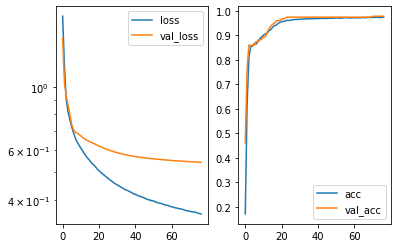

Predicted cell: Cells Probability: [[0.94841135]]
True Cell type: Cells
x [[0.18526399]]
True positional value x 0.2916666666666667
y [[0.82454044]]
True positional value y 0.7083333333333334


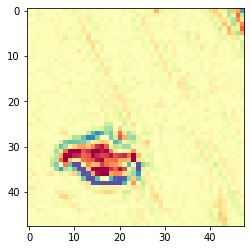

Epoch 78/250
5180/5180 [==============================] - 4s 861us/step - loss: 0.3560 - acc: 0.9732 - val_loss: 0.5415 - val_acc: 0.9780

Epoch 00078: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5415099571039389, 'val_acc': 0.9780219935235523, 'loss': 0.3560418158654541, 'acc': 0.9731660303461966, 'lr': 1e-06}


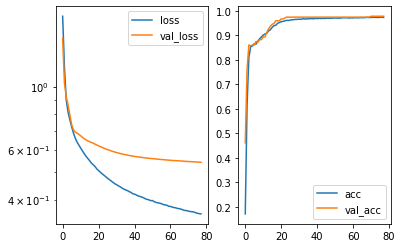

Predicted cell: Cells Probability: [[0.99666804]]
True Cell type: Cells
x [[0.19018532]]
True positional value x 0.2916666666666667
y [[0.69704217]]
True positional value y 0.5


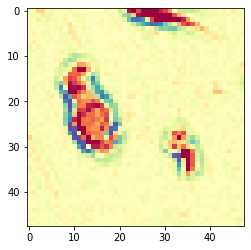

Epoch 79/250
5180/5180 [==============================] - 5s 872us/step - loss: 0.3545 - acc: 0.9745 - val_loss: 0.5413 - val_acc: 0.9780

Epoch 00079: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.541299662747226, 'val_acc': 0.9780219935235523, 'loss': 0.3545434692421475, 'acc': 0.9745173804087989, 'lr': 1e-06}


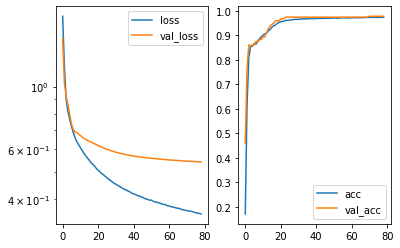

Predicted cell: Cells Probability: [[0.91462946]]
True Cell type: Cells
x [[0.18147878]]
True positional value x 0.2916666666666667
y [[0.32992315]]
True positional value y 0.2916666666666667


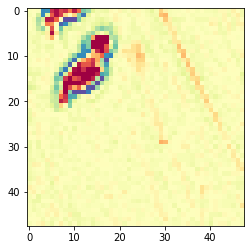

Epoch 80/250
5180/5180 [==============================] - 4s 847us/step - loss: 0.3538 - acc: 0.9736 - val_loss: 0.5409 - val_acc: 0.9780

Epoch 00080: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5409122816808931, 'val_acc': 0.9780219935235523, 'loss': 0.35383567651266296, 'acc': 0.9735521363475608, 'lr': 1e-06}


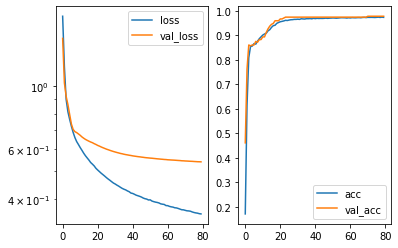

Predicted cell: Cells Probability: [[0.99408984]]
True Cell type: Cells
x [[0.48823628]]
True positional value x 0.5
y [[0.6294805]]
True positional value y 0.5


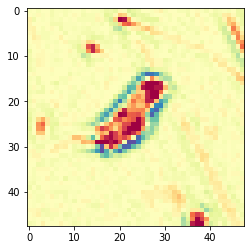

Epoch 81/250
5180/5180 [==============================] - 4s 858us/step - loss: 0.3530 - acc: 0.9741 - val_loss: 0.5404 - val_acc: 0.9780

Epoch 00081: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5404298517293545, 'val_acc': 0.9780219935235523, 'loss': 0.35303467592677557, 'acc': 0.9741312829223839, 'lr': 1e-06}


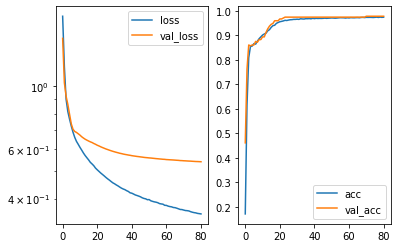

Predicted cell: Cells Probability: [[0.99339265]]
True Cell type: Cells
x [[0.75601166]]
True positional value x 0.7083333333333334
y [[0.6479911]]
True positional value y 0.5


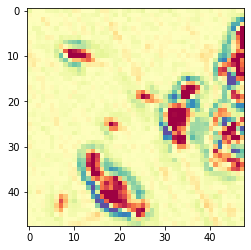

Epoch 82/250
5180/5180 [==============================] - 4s 865us/step - loss: 0.3533 - acc: 0.9745 - val_loss: 0.5402 - val_acc: 0.9817

Epoch 00082: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.540174092565264, 'val_acc': 0.9816849936932435, 'loss': 0.3533225839662736, 'acc': 0.974517386162143, 'lr': 1e-06}


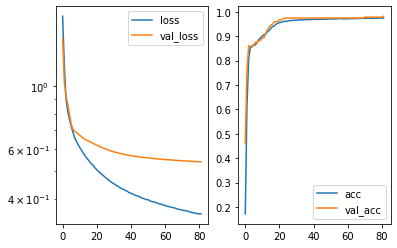

Predicted cell: Cells Probability: [[0.9946173]]
True Cell type: Cells
x [[0.23679487]]
True positional value x 0.2916666666666667
y [[0.6905044]]
True positional value y 0.7083333333333334


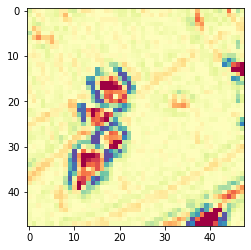

Epoch 83/250
5180/5180 [==============================] - 4s 851us/step - loss: 0.3508 - acc: 0.9747 - val_loss: 0.5398 - val_acc: 0.9817

Epoch 00083: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5397707400741157, 'val_acc': 0.9816849936932435, 'loss': 0.3507694832146398, 'acc': 0.9747104315684109, 'lr': 1e-06}


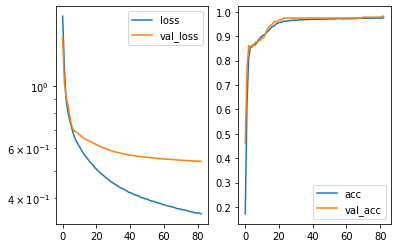

Predicted cell: Cells Probability: [[0.991531]]
True Cell type: Cells
x [[0.71670544]]
True positional value x 0.7083333333333334
y [[0.4557027]]
True positional value y 0.2916666666666667


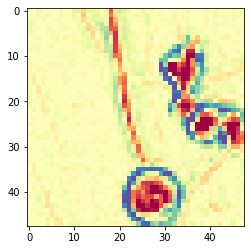

Epoch 84/250
5180/5180 [==============================] - 5s 878us/step - loss: 0.3492 - acc: 0.9751 - val_loss: 0.5394 - val_acc: 0.9817

Epoch 00084: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5394184561002822, 'val_acc': 0.9816849936932435, 'loss': 0.34918055525157443, 'acc': 0.9750965407916478, 'lr': 1e-06}


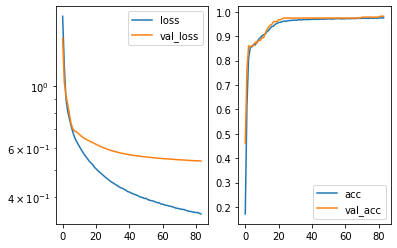

Predicted cell: Cells Probability: [[0.9869191]]
True Cell type: Cells
x [[0.6087996]]
True positional value x 0.5
y [[0.40783396]]
True positional value y 0.2916666666666667


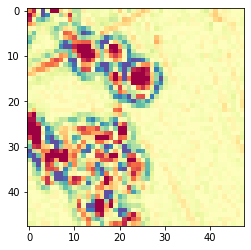

Epoch 85/250
5180/5180 [==============================] - 4s 841us/step - loss: 0.3494 - acc: 0.9753 - val_loss: 0.5390 - val_acc: 0.9853

Epoch 00085: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5390425964152856, 'val_acc': 0.9853479938629346, 'loss': 0.34941514774178906, 'acc': 0.975289582976043, 'lr': 1e-06}


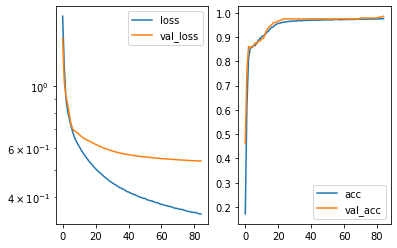

Predicted cell: Cells Probability: [[0.98978007]]
True Cell type: Cells
x [[0.8022245]]
True positional value x 0.5
y [[0.45324302]]
True positional value y 0.5


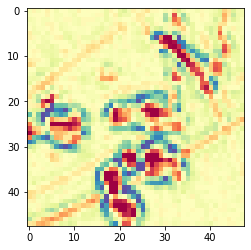

Epoch 86/250
5180/5180 [==============================] - 4s 863us/step - loss: 0.3487 - acc: 0.9737 - val_loss: 0.5388 - val_acc: 0.9853

Epoch 00086: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5387659994237152, 'val_acc': 0.9853479938629346, 'loss': 0.34870905063787483, 'acc': 0.97374518060316, 'lr': 1e-06}


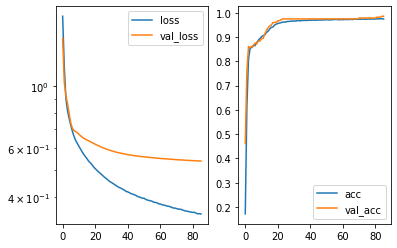

Predicted cell: Cells Probability: [[0.9794093]]
True Cell type: Cells
x [[0.72335917]]
True positional value x 0.7083333333333334
y [[0.7384048]]
True positional value y 0.7083333333333334


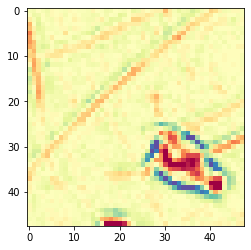

Epoch 87/250
5180/5180 [==============================] - 5s 872us/step - loss: 0.3474 - acc: 0.9749 - val_loss: 0.5384 - val_acc: 0.9853

Epoch 00087: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5383812793881901, 'val_acc': 0.9853479938629346, 'loss': 0.3474036112255111, 'acc': 0.9749034852594942, 'lr': 1e-06}


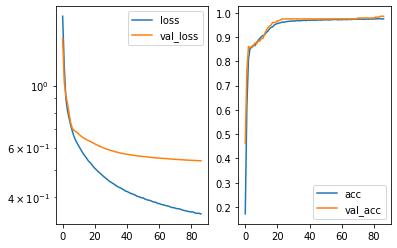

Predicted cell: Cells Probability: [[0.9862428]]
True Cell type: Cells
x [[0.68058866]]
True positional value x 0.5
y [[0.49592188]]
True positional value y 0.5


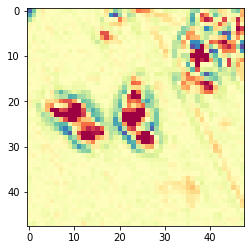

Epoch 88/250
5180/5180 [==============================] - 5s 885us/step - loss: 0.3458 - acc: 0.9743 - val_loss: 0.5382 - val_acc: 0.9853

Epoch 00088: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.53824836736197, 'val_acc': 0.9853479938629346, 'loss': 0.3457527680746837, 'acc': 0.9743243338518621, 'lr': 1e-06}


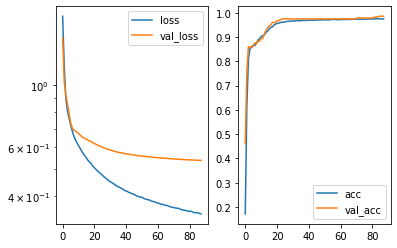

Predicted cell: Cells Probability: [[0.9752769]]
True Cell type: Cells
x [[0.40343198]]
True positional value x 0.2916666666666667
y [[0.32073635]]
True positional value y 0.5


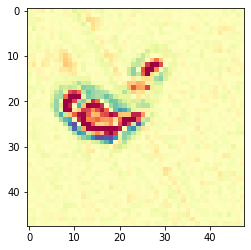

Epoch 89/250
5180/5180 [==============================] - 5s 892us/step - loss: 0.3445 - acc: 0.9747 - val_loss: 0.5377 - val_acc: 0.9853

Epoch 00089: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5377300289961008, 'val_acc': 0.9853479938629346, 'loss': 0.34454708555030084, 'acc': 0.9747104340998822, 'lr': 1e-06}


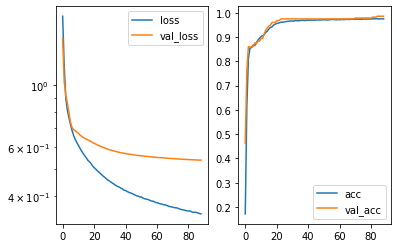

Predicted cell: Cells Probability: [[0.9919435]]
True Cell type: Cells
x [[0.39728245]]
True positional value x 0.2916666666666667
y [[0.61705554]]
True positional value y 0.7083333333333334


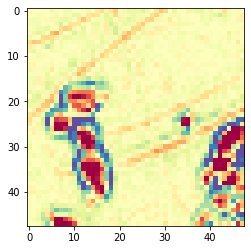

Epoch 90/250
5180/5180 [==============================] - 5s 869us/step - loss: 0.3442 - acc: 0.9761 - val_loss: 0.5376 - val_acc: 0.9817

Epoch 00090: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5375897353822059, 'val_acc': 0.9816849936932435, 'loss': 0.34424283502184744, 'acc': 0.9760617839323508, 'lr': 1e-06}


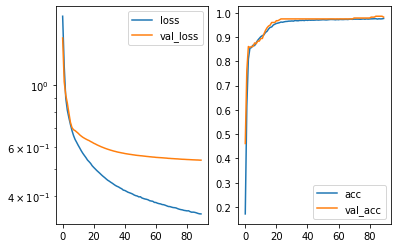

Predicted cell: Cells Probability: [[0.97746277]]
True Cell type: Cells
x [[0.19241208]]
True positional value x 0.2916666666666667
y [[0.4765296]]
True positional value y 0.5


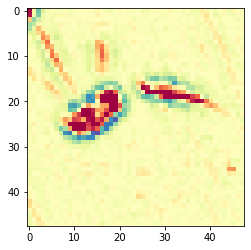

Epoch 91/250
5180/5180 [==============================] - 4s 848us/step - loss: 0.3434 - acc: 0.9753 - val_loss: 0.5371 - val_acc: 0.9853

Epoch 00091: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5371239809762864, 'val_acc': 0.9853479938629346, 'loss': 0.34336775391718594, 'acc': 0.9752895827459093, 'lr': 1e-06}


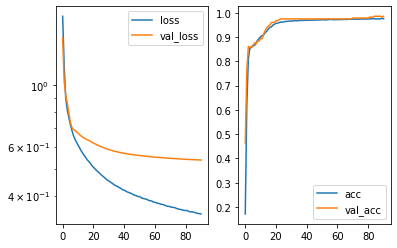

Predicted cell: Cells Probability: [[0.92756003]]
True Cell type: Cells
x [[0.29972798]]
True positional value x 0.2916666666666667
y [[0.63927376]]
True positional value y 0.7083333333333334


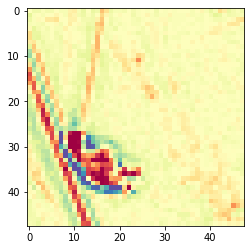

Epoch 92/250
5180/5180 [==============================] - 4s 849us/step - loss: 0.3426 - acc: 0.9763 - val_loss: 0.5369 - val_acc: 0.9853

Epoch 00092: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5369000319159511, 'val_acc': 0.9853479938629346, 'loss': 0.34261307085803117, 'acc': 0.9762548373933004, 'lr': 1e-06}


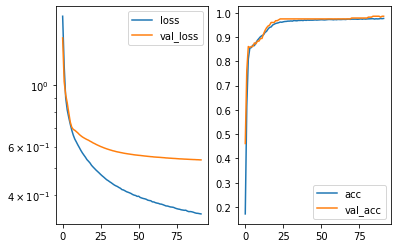

Predicted cell: Cells Probability: [[0.9820092]]
True Cell type: Cells
x [[0.22963078]]
True positional value x 0.2916666666666667
y [[0.75658435]]
True positional value y 0.7083333333333334


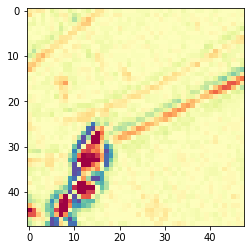

Epoch 93/250
5180/5180 [==============================] - 4s 845us/step - loss: 0.3413 - acc: 0.9759 - val_loss: 0.5366 - val_acc: 0.9853

Epoch 00093: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5366286235851246, 'val_acc': 0.9853479938629346, 'loss': 0.34126110380680863, 'acc': 0.97586873162207, 'lr': 1e-06}


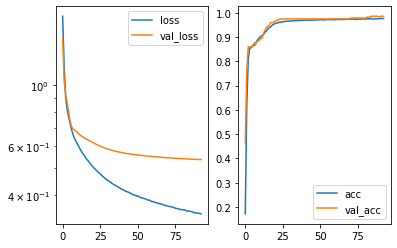

Predicted cell: Cells Probability: [[0.98132205]]
True Cell type: Cells
x [[0.51567614]]
True positional value x 0.5
y [[0.2133774]]
True positional value y 0.2916666666666667


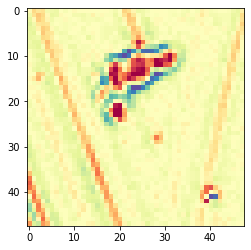

Epoch 94/250
5180/5180 [==============================] - 4s 853us/step - loss: 0.3403 - acc: 0.9755 - val_loss: 0.5363 - val_acc: 0.9853

Epoch 00094: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.536338705937941, 'val_acc': 0.9853479938629346, 'loss': 0.3402864147107113, 'acc': 0.9754826352863238, 'lr': 1e-06}


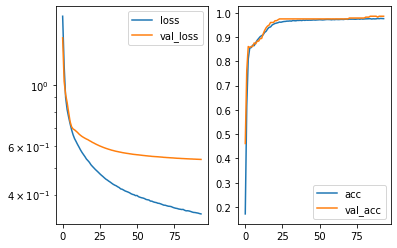

Predicted cell: Cells Probability: [[0.9874928]]
True Cell type: Cells
x [[0.3608168]]
True positional value x 0.5
y [[0.17142631]]
True positional value y 0.2916666666666667


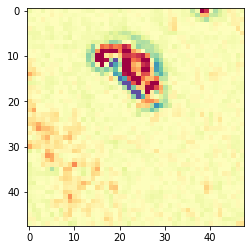

Epoch 95/250
5180/5180 [==============================] - 4s 848us/step - loss: 0.3392 - acc: 0.9757 - val_loss: 0.5361 - val_acc: 0.9853

Epoch 00095: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5361484426718491, 'val_acc': 0.9853479938629346, 'loss': 0.33919825056805114, 'acc': 0.9756756827637956, 'lr': 1e-06}


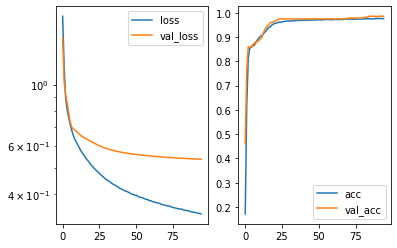

Predicted cell: Cells Probability: [[0.95678854]]
True Cell type: Cells
x [[0.3210382]]
True positional value x 0.2916666666666667
y [[0.67571616]]
True positional value y 0.7083333333333334


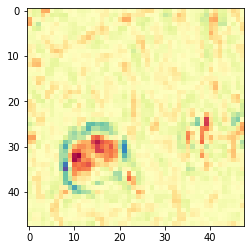

Epoch 96/250
5180/5180 [==============================] - 4s 850us/step - loss: 0.3394 - acc: 0.9759 - val_loss: 0.5357 - val_acc: 0.9853

Epoch 00096: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5357359042971126, 'val_acc': 0.9853479938629346, 'loss': 0.3394062464992052, 'acc': 0.9758687362247452, 'lr': 1e-06}


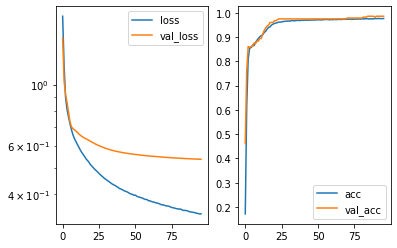

Predicted cell: Cells Probability: [[0.98818165]]
True Cell type: Cells
x [[0.2891376]]
True positional value x 0.5
y [[0.5621759]]
True positional value y 0.7083333333333334


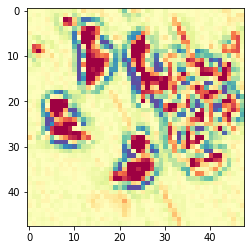

Epoch 97/250
5180/5180 [==============================] - 5s 899us/step - loss: 0.3387 - acc: 0.9747 - val_loss: 0.5355 - val_acc: 0.9853

Epoch 00097: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5354539996538407, 'val_acc': 0.9853479938629346, 'loss': 0.33871476047287574, 'acc': 0.9747104292670732, 'lr': 1e-06}


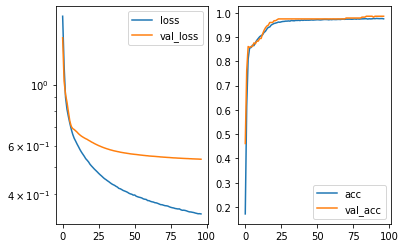

Predicted cell: Normal Probability: [[0.95811015]]
True Cell type: Normal
x [[0.59587735]]
True positional value x 0.5
y [[0.54831475]]
True positional value y 0.5


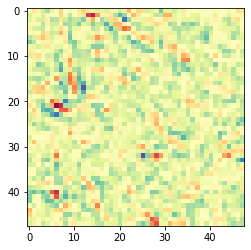

Epoch 98/250
5180/5180 [==============================] - 5s 909us/step - loss: 0.3385 - acc: 0.9747 - val_loss: 0.5350 - val_acc: 0.9853

Epoch 00098: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5350330747090853, 'val_acc': 0.9853479938629346, 'loss': 0.3384874328453108, 'acc': 0.9747104361710861, 'lr': 1e-06}


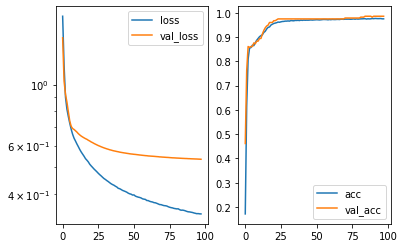

Predicted cell: Cells Probability: [[0.8465354]]
True Cell type: Cells
x [[0.57874906]]
True positional value x 0.5
y [[0.7985544]]
True positional value y 0.7083333333333334


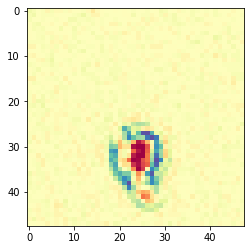

Epoch 99/250
5180/5180 [==============================] - 5s 893us/step - loss: 0.3368 - acc: 0.9757 - val_loss: 0.5347 - val_acc: 0.9853

Epoch 00099: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5347221240455851, 'val_acc': 0.9853479938629346, 'loss': 0.33684766165998453, 'acc': 0.9756756839144645, 'lr': 1e-06}


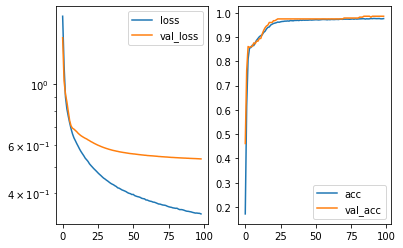

Predicted cell: Cells Probability: [[0.99653876]]
True Cell type: Cells
x [[0.23167618]]
True positional value x 0.2916666666666667
y [[0.9341142]]
True positional value y 0.7083333333333334


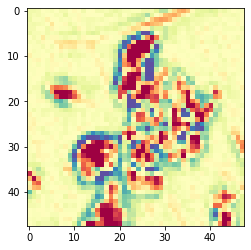

Epoch 100/250
5180/5180 [==============================] - 5s 893us/step - loss: 0.3359 - acc: 0.9761 - val_loss: 0.5344 - val_acc: 0.9853

Epoch 00100: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5343687778864151, 'val_acc': 0.9853479938629346, 'loss': 0.3359473829794114, 'acc': 0.9760617899158286, 'lr': 1e-06}


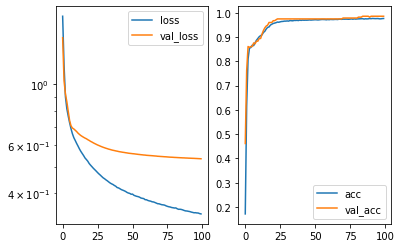

Predicted cell: Cells Probability: [[0.98464704]]
True Cell type: Cells
x [[0.44926798]]
True positional value x 0.2916666666666667
y [[0.44367483]]
True positional value y 0.7083333333333334


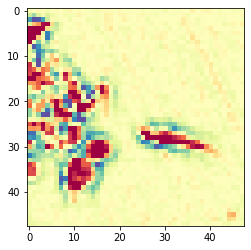

Epoch 101/250
5180/5180 [==============================] - 4s 854us/step - loss: 0.3349 - acc: 0.9763 - val_loss: 0.5343 - val_acc: 0.9853

Epoch 00101: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5342582706566695, 'val_acc': 0.9853479938629346, 'loss': 0.33490898675900166, 'acc': 0.9762548362426315, 'lr': 1e-06}


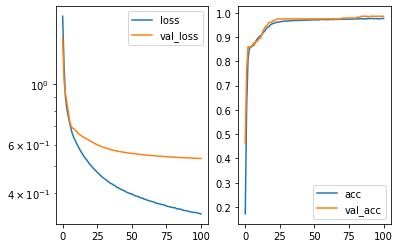

Predicted cell: Cells Probability: [[0.850401]]
True Cell type: Cells
x [[0.51791817]]
True positional value x 0.5
y [[0.36912093]]
True positional value y 0.5


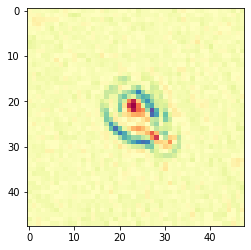

Epoch 102/250
5180/5180 [==============================] - 4s 856us/step - loss: 0.3336 - acc: 0.9763 - val_loss: 0.5340 - val_acc: 0.9853

Epoch 00102: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5339748577757196, 'val_acc': 0.9853479938629346, 'loss': 0.3335539400577545, 'acc': 0.9762548362426315, 'lr': 1e-06}


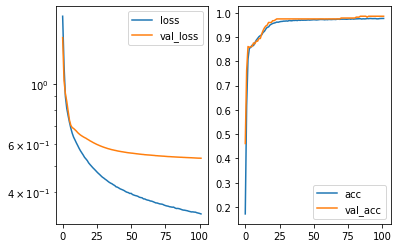

Predicted cell: Cells Probability: [[0.96785855]]
True Cell type: Cells
x [[0.5077398]]
True positional value x 0.5
y [[0.60786766]]
True positional value y 0.7083333333333334


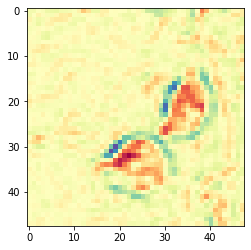

Epoch 103/250
5180/5180 [==============================] - 5s 874us/step - loss: 0.3340 - acc: 0.9766 - val_loss: 0.5336 - val_acc: 0.9853

Epoch 00103: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5335639047098684, 'val_acc': 0.9853479938629346, 'loss': 0.33396665124819547, 'acc': 0.9766409385618556, 'lr': 1e-06}


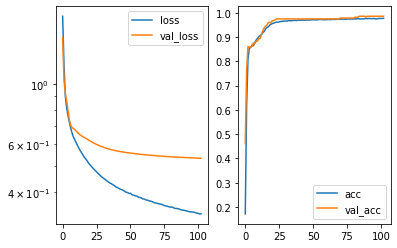

Predicted cell: Cells Probability: [[0.99771225]]
True Cell type: Cells
x [[0.37030464]]
True positional value x 0.2916666666666667
y [[0.3602155]]
True positional value y 0.7083333333333334


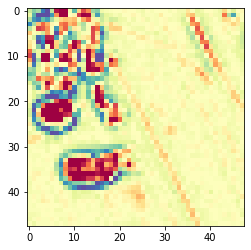

Epoch 104/250
5180/5180 [==============================] - 4s 848us/step - loss: 0.3317 - acc: 0.9764 - val_loss: 0.5332 - val_acc: 0.9853

Epoch 00104: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5332264520309784, 'val_acc': 0.9853479938629346, 'loss': 0.331692989383425, 'acc': 0.9764478908542501, 'lr': 1e-06}


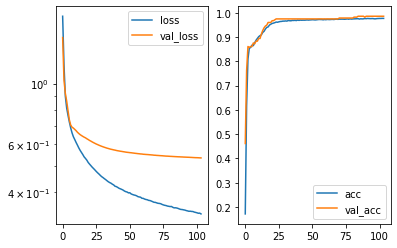

Predicted cell: Cells Probability: [[0.93406004]]
True Cell type: Cells
x [[0.4741681]]
True positional value x 0.5
y [[0.7004507]]
True positional value y 0.7083333333333334


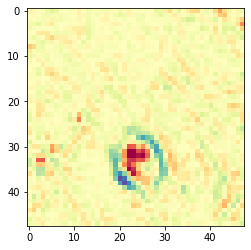

Epoch 105/250
5180/5180 [==============================] - 5s 891us/step - loss: 0.3309 - acc: 0.9768 - val_loss: 0.5329 - val_acc: 0.9853

Epoch 00105: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5328800298355438, 'val_acc': 0.9853479938629346, 'loss': 0.330889206020068, 'acc': 0.9768339876502637, 'lr': 1e-06}


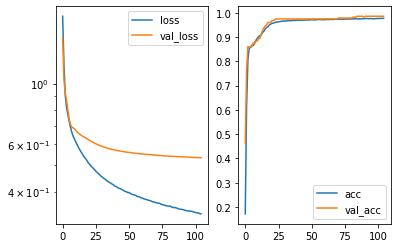

Predicted cell: Cells Probability: [[0.98416686]]
True Cell type: Cells
x [[0.7338994]]
True positional value x 0.7083333333333334
y [[0.43257332]]
True positional value y 0.5


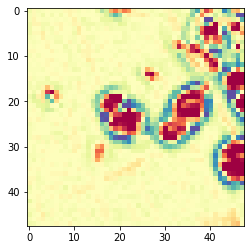

Epoch 106/250
5180/5180 [==============================] - 5s 897us/step - loss: 0.3311 - acc: 0.9768 - val_loss: 0.5329 - val_acc: 0.9853

Epoch 00106: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5328910021118192, 'val_acc': 0.9853479938629346, 'loss': 0.3310851727443312, 'acc': 0.97683398742013, 'lr': 1e-06}


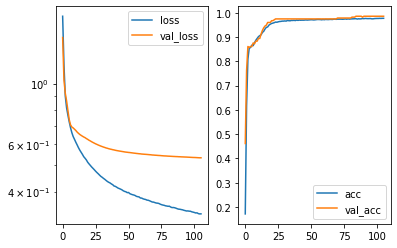

Predicted cell: Cells Probability: [[0.9930226]]
True Cell type: Cells
x [[0.2729523]]
True positional value x 0.2916666666666667
y [[0.20380159]]
True positional value y 0.5


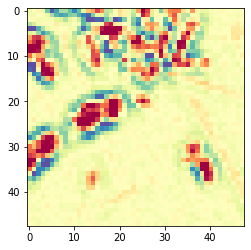

Epoch 107/250
5180/5180 [==============================] - 5s 917us/step - loss: 0.3300 - acc: 0.9782 - val_loss: 0.5323 - val_acc: 0.9853

Epoch 00107: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.532301128347278, 'val_acc': 0.9853479938629346, 'loss': 0.33000749188500483, 'acc': 0.9781853420854075, 'lr': 1e-06}


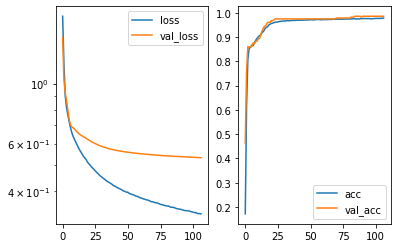

Predicted cell: Cells Probability: [[0.9672724]]
True Cell type: Cells
x [[0.6620643]]
True positional value x 0.5
y [[0.73017293]]
True positional value y 0.5


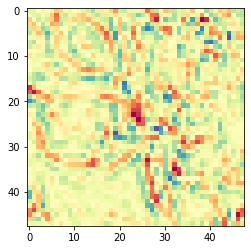

Epoch 108/250
5180/5180 [==============================] - 5s 930us/step - loss: 0.3294 - acc: 0.9784 - val_loss: 0.5323 - val_acc: 0.9853

Epoch 00108: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5322881078982091, 'val_acc': 0.9853479938629346, 'loss': 0.329352303706541, 'acc': 0.9783783909436818, 'lr': 1e-06}


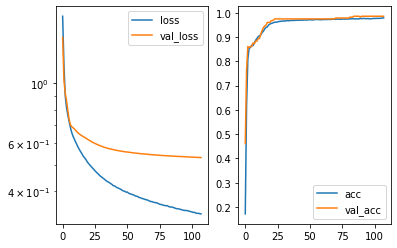

Predicted cell: Cells Probability: [[0.9866044]]
True Cell type: Cells
x [[0.50055015]]
True positional value x 0.2916666666666667
y [[0.84835523]]
True positional value y 0.7083333333333334


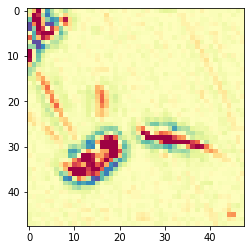

Epoch 109/250
5180/5180 [==============================] - 4s 862us/step - loss: 0.3290 - acc: 0.9772 - val_loss: 0.5318 - val_acc: 0.9853

Epoch 00109: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.531839064407698, 'val_acc': 0.9853479938629346, 'loss': 0.3289738401022657, 'acc': 0.9772200853668125, 'lr': 1e-06}


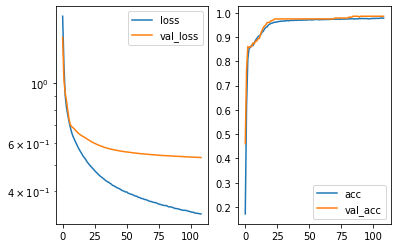

Predicted cell: Cells Probability: [[0.62976867]]
True Cell type: Cells
x [[0.5838663]]
True positional value x 0.7083333333333334
y [[0.60234046]]
True positional value y 0.7083333333333334


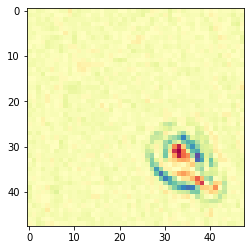

Epoch 110/250
5180/5180 [==============================] - 4s 849us/step - loss: 0.3279 - acc: 0.9782 - val_loss: 0.5317 - val_acc: 0.9853

Epoch 00110: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5317172761801835, 'val_acc': 0.9853479938629346, 'loss': 0.32788766339478803, 'acc': 0.9781853397840699, 'lr': 1e-06}


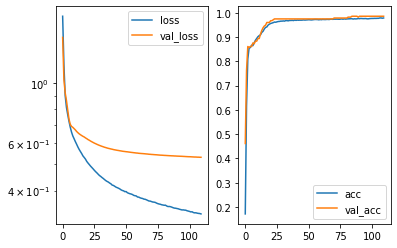

Predicted cell: Cells Probability: [[0.9733095]]
True Cell type: Cells
x [[0.4915018]]
True positional value x 0.5
y [[0.52667195]]
True positional value y 0.7083333333333334


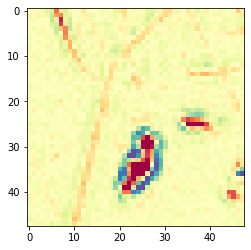

Epoch 111/250
5180/5180 [==============================] - 4s 849us/step - loss: 0.3274 - acc: 0.9784 - val_loss: 0.5315 - val_acc: 0.9853

Epoch 00111: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5314837637401763, 'val_acc': 0.9853479938629346, 'loss': 0.3273899480412826, 'acc': 0.9783783863410066, 'lr': 1e-06}


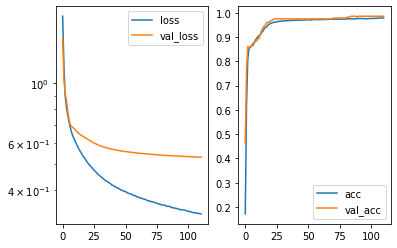

Predicted cell: Normal Probability: [[0.962111]]
True Cell type: Normal
x [[0.4151022]]
True positional value x 0.5
y [[0.511558]]
True positional value y 0.5


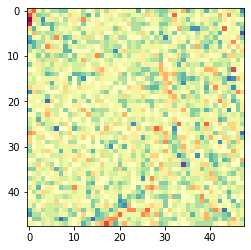

Epoch 112/250
5180/5180 [==============================] - 4s 845us/step - loss: 0.3269 - acc: 0.9780 - val_loss: 0.5311 - val_acc: 0.9853

Epoch 00112: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5311491971924192, 'val_acc': 0.9853479938629346, 'loss': 0.326898186938643, 'acc': 0.9779922886244579, 'lr': 1e-06}


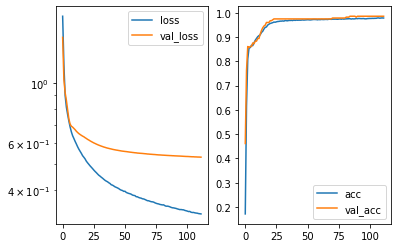

Predicted cell: Cells Probability: [[0.9676089]]
True Cell type: Cells
x [[0.82450664]]
True positional value x 0.7083333333333334
y [[0.24517025]]
True positional value y 0.2916666666666667


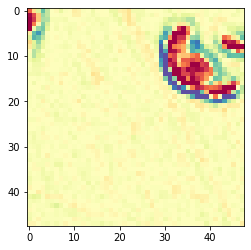

Epoch 113/250
5180/5180 [==============================] - 5s 869us/step - loss: 0.3255 - acc: 0.9790 - val_loss: 0.5310 - val_acc: 0.9853

Epoch 00113: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5309810668994219, 'val_acc': 0.9853479938629346, 'loss': 0.32548055984799007, 'acc': 0.9789575398198426, 'lr': 1e-06}


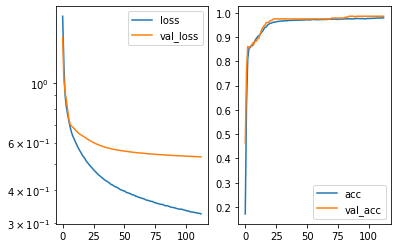

Predicted cell: Cells Probability: [[0.9869261]]
True Cell type: Cells
x [[0.5009806]]
True positional value x 0.2916666666666667
y [[0.8478233]]
True positional value y 0.7083333333333334


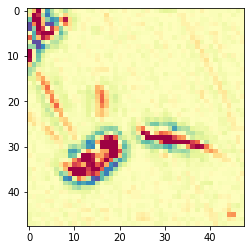

Epoch 114/250
5180/5180 [==============================] - 5s 886us/step - loss: 0.3248 - acc: 0.9780 - val_loss: 0.5307 - val_acc: 0.9853

Epoch 00114: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5306803494582683, 'val_acc': 0.9853479938629346, 'loss': 0.3247809514806077, 'acc': 0.9779922909257955, 'lr': 1e-06}


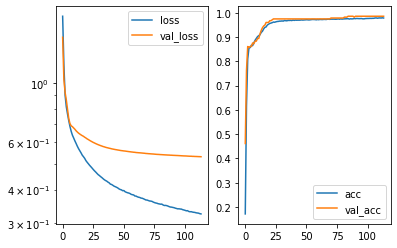

Predicted cell: Cells Probability: [[0.96231526]]
True Cell type: Cells
x [[0.5793024]]
True positional value x 0.7083333333333334
y [[0.34586808]]
True positional value y 0.2916666666666667


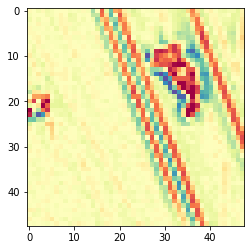

Epoch 115/250
5180/5180 [==============================] - 5s 894us/step - loss: 0.3238 - acc: 0.9778 - val_loss: 0.5305 - val_acc: 0.9853

Epoch 00115: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.530492500507788, 'val_acc': 0.9853479938629346, 'loss': 0.32378397450483903, 'acc': 0.9777992397661835, 'lr': 1e-06}


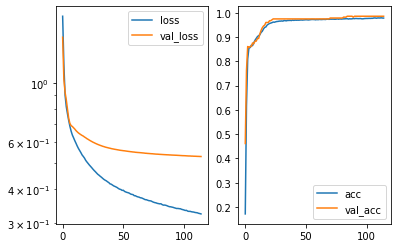

Predicted cell: Cells Probability: [[0.98687404]]
True Cell type: Cells
x [[0.37545004]]
True positional value x 0.5
y [[0.6895946]]
True positional value y 0.5


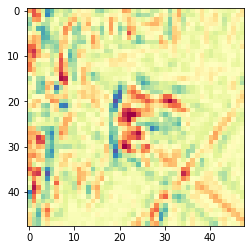

Epoch 116/250
5180/5180 [==============================] - 5s 901us/step - loss: 0.3234 - acc: 0.9790 - val_loss: 0.5302 - val_acc: 0.9853

Epoch 00116: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5302301241364671, 'val_acc': 0.9853479938629346, 'loss': 0.32336700031656096, 'acc': 0.9789575398198426, 'lr': 1e-06}


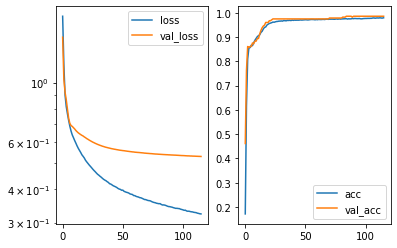

Predicted cell: Normal Probability: [[0.94134164]]
True Cell type: Normal
x [[0.49322483]]
True positional value x 0.5
y [[0.3583874]]
True positional value y 0.5


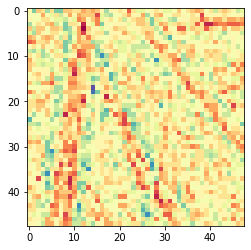

Epoch 117/250
5180/5180 [==============================] - 5s 900us/step - loss: 0.3226 - acc: 0.9786 - val_loss: 0.5300 - val_acc: 0.9853

Epoch 00117: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.529972486880236, 'val_acc': 0.9853479938629346, 'loss': 0.3226219878233538, 'acc': 0.978571440952625, 'lr': 1e-06}


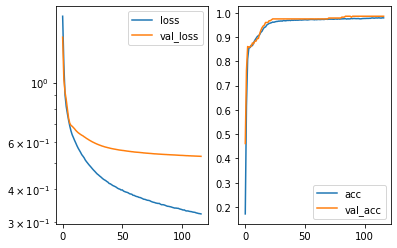

Predicted cell: Cells Probability: [[0.98699087]]
True Cell type: Cells
x [[0.5846663]]
True positional value x 0.7083333333333334
y [[0.21836506]]
True positional value y 0.2916666666666667


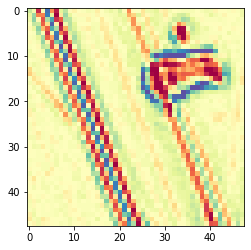

Epoch 118/250
5180/5180 [==============================] - 4s 863us/step - loss: 0.3225 - acc: 0.9786 - val_loss: 0.5298 - val_acc: 0.9853

Epoch 00118: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5298322875857789, 'val_acc': 0.9853479938629346, 'loss': 0.32245126447162115, 'acc': 0.9785714386512874, 'lr': 1e-06}


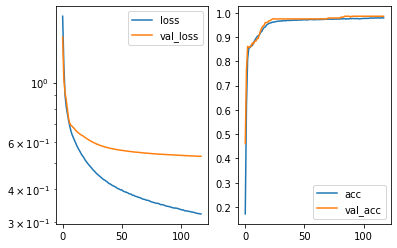

Predicted cell: Cells Probability: [[0.8890023]]
True Cell type: Normal
x [[0.5841213]]
True positional value x 0.5
y [[0.44684076]]
True positional value y 0.5


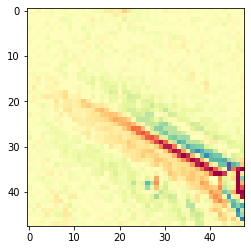

Epoch 119/250
5180/5180 [==============================] - 4s 855us/step - loss: 0.3218 - acc: 0.9790 - val_loss: 0.5297 - val_acc: 0.9853

Epoch 00119: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5296684344172914, 'val_acc': 0.9853479938629346, 'loss': 0.32180248229660124, 'acc': 0.9789575386691738, 'lr': 1e-06}


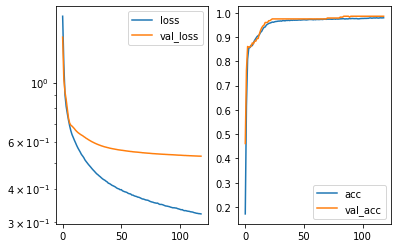

Predicted cell: Cells Probability: [[0.97884136]]
True Cell type: Cells
x [[0.47723958]]
True positional value x 0.5
y [[0.7541684]]
True positional value y 0.7083333333333334


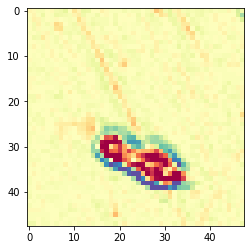

Epoch 120/250
5180/5180 [==============================] - 4s 864us/step - loss: 0.3205 - acc: 0.9793 - val_loss: 0.5295 - val_acc: 0.9853

Epoch 00120: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5294508182958806, 'val_acc': 0.9853479938629346, 'loss': 0.3205376978546496, 'acc': 0.979343639837729, 'lr': 1e-06}


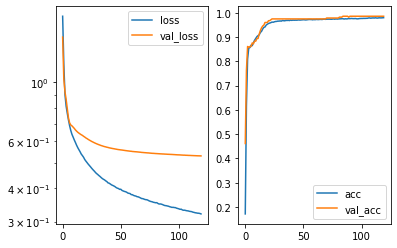

Predicted cell: Cells Probability: [[0.9553762]]
True Cell type: Cells
x [[0.19540066]]
True positional value x 0.2916666666666667
y [[0.70100397]]
True positional value y 0.7083333333333334


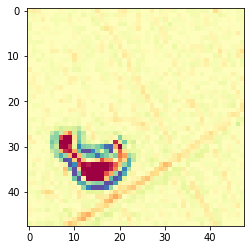

Epoch 121/250
5180/5180 [==============================] - 4s 852us/step - loss: 0.3207 - acc: 0.9793 - val_loss: 0.5295 - val_acc: 0.9853

Epoch 00121: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5295103659559955, 'val_acc': 0.9853479938629346, 'loss': 0.32070631260577315, 'acc': 0.9793436377665251, 'lr': 1e-06}


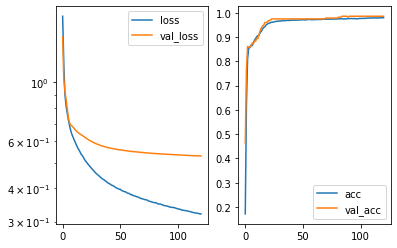

Predicted cell: Cells Probability: [[0.9945186]]
True Cell type: Cells
x [[0.5814133]]
True positional value x 0.2916666666666667
y [[0.588142]]
True positional value y 0.5


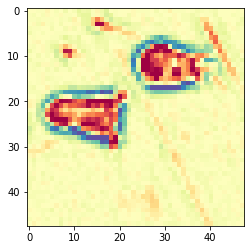

Epoch 122/250
5180/5180 [==============================] - 4s 856us/step - loss: 0.3205 - acc: 0.9788 - val_loss: 0.5290 - val_acc: 0.9853

Epoch 00122: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5289733946978391, 'val_acc': 0.9853479938629346, 'loss': 0.3205447565174471, 'acc': 0.9787644875095618, 'lr': 1e-06}


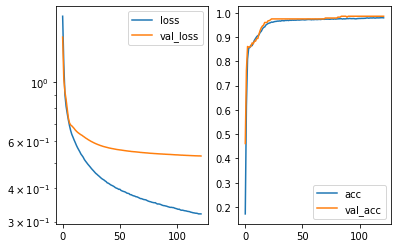

Predicted cell: Cells Probability: [[0.98673093]]
True Cell type: Cells
x [[0.40577498]]
True positional value x 0.7083333333333334
y [[0.42299357]]
True positional value y 0.5


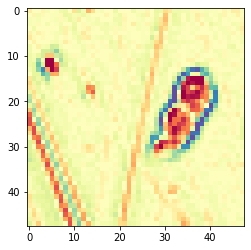

Epoch 123/250
5180/5180 [==============================] - 4s 845us/step - loss: 0.3202 - acc: 0.9793 - val_loss: 0.5289 - val_acc: 0.9853

Epoch 00123: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5289219401694916, 'val_acc': 0.9853479938629346, 'loss': 0.32018267268379685, 'acc': 0.9793436432897354, 'lr': 1e-06}


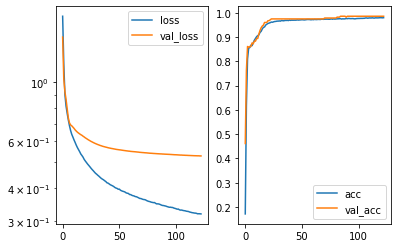

Predicted cell: Cells Probability: [[0.9928242]]
True Cell type: Cells
x [[0.65106034]]
True positional value x 0.7083333333333334
y [[0.4373037]]
True positional value y 0.5


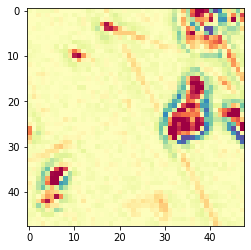

Epoch 124/250
5180/5180 [==============================] - 4s 851us/step - loss: 0.3181 - acc: 0.9801 - val_loss: 0.5286 - val_acc: 0.9853

Epoch 00124: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5285973666788457, 'val_acc': 0.9853479938629346, 'loss': 0.31805211834925945, 'acc': 0.9801158421748394, 'lr': 1e-06}


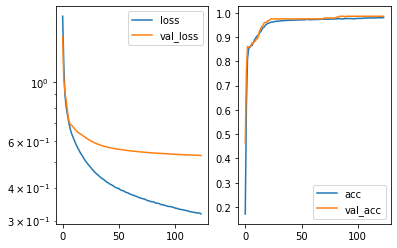

Predicted cell: Cells Probability: [[0.99505013]]
True Cell type: Cells
x [[0.66498893]]
True positional value x 0.5
y [[0.09675413]]
True positional value y 0.2916666666666667


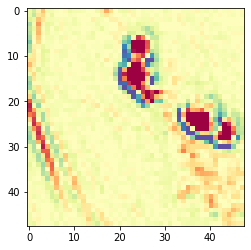

Epoch 125/250
5180/5180 [==============================] - 4s 860us/step - loss: 0.3183 - acc: 0.9801 - val_loss: 0.5284 - val_acc: 0.9853

Epoch 00125: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.528399877059154, 'val_acc': 0.9853479938629346, 'loss': 0.3183257446325884, 'acc': 0.980115837572164, 'lr': 1e-06}


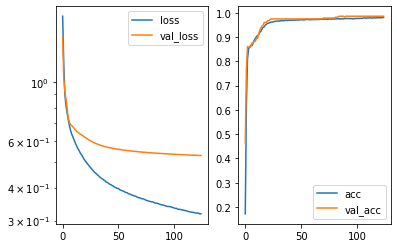

Predicted cell: Cells Probability: [[0.96903867]]
True Cell type: Cells
x [[0.20299031]]
True positional value x 0.2916666666666667
y [[0.87109226]]
True positional value y 0.7083333333333334


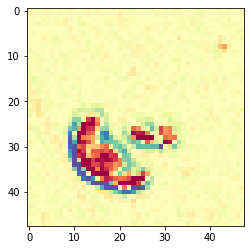

Epoch 126/250
5180/5180 [==============================] - 5s 869us/step - loss: 0.3184 - acc: 0.9793 - val_loss: 0.5283 - val_acc: 0.9853

Epoch 00126: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5283239433616945, 'val_acc': 0.9853479938629346, 'loss': 0.3184456531835799, 'acc': 0.979343639837729, 'lr': 1e-06}


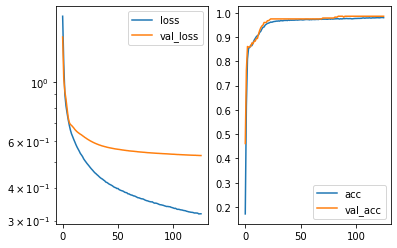

Predicted cell: Normal Probability: [[0.9698476]]
True Cell type: Normal
x [[0.34738803]]
True positional value x 0.5
y [[0.50056547]]
True positional value y 0.5


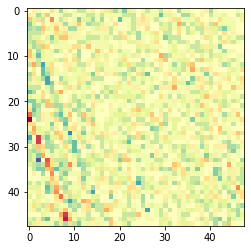

Epoch 127/250
5180/5180 [==============================] - 4s 865us/step - loss: 0.3171 - acc: 0.9805 - val_loss: 0.5280 - val_acc: 0.9853

Epoch 00127: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5280171486484262, 'val_acc': 0.9853479938629346, 'loss': 0.3170606672303557, 'acc': 0.9805019421927257, 'lr': 1e-06}


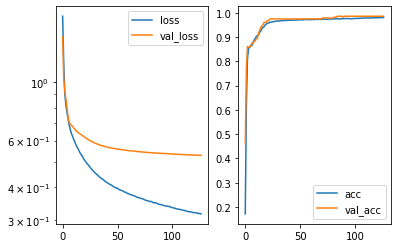

Predicted cell: Cells Probability: [[0.99845564]]
True Cell type: Cells
x [[0.23311065]]
True positional value x 0.2916666666666667
y [[0.39149973]]
True positional value y 0.5


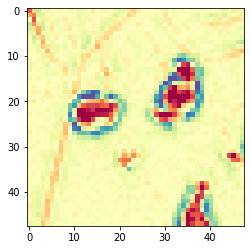

Epoch 128/250
5180/5180 [==============================] - 4s 848us/step - loss: 0.3151 - acc: 0.9801 - val_loss: 0.5280 - val_acc: 0.9853

Epoch 00128: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5279685169349223, 'val_acc': 0.9853479938629346, 'loss': 0.31509415385345696, 'acc': 0.9801158398735017, 'lr': 1e-06}


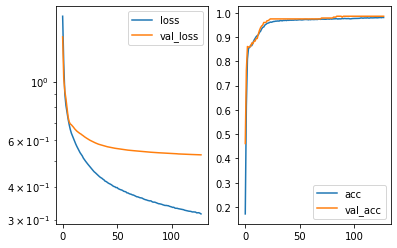

Predicted cell: Cells Probability: [[0.9649948]]
True Cell type: Cells
x [[0.32060722]]
True positional value x 0.2916666666666667
y [[0.6697229]]
True positional value y 0.7083333333333334


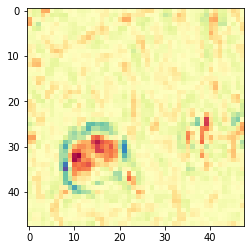

Epoch 129/250
5180/5180 [==============================] - 5s 873us/step - loss: 0.3154 - acc: 0.9799 - val_loss: 0.5276 - val_acc: 0.9853

Epoch 00129: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5275759950225607, 'val_acc': 0.9853479938629346, 'loss': 0.3154371281848451, 'acc': 0.9799227875632208, 'lr': 1e-06}


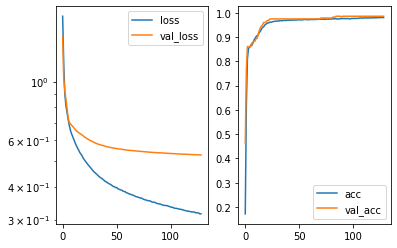

Predicted cell: Cells Probability: [[0.95240045]]
True Cell type: Cells
x [[0.5882575]]
True positional value x 0.2916666666666667
y [[0.48155615]]
True positional value y 0.7083333333333334


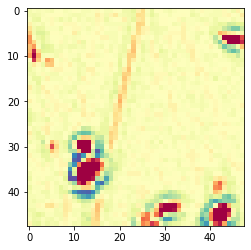

Epoch 130/250
5180/5180 [==============================] - 5s 907us/step - loss: 0.3154 - acc: 0.9801 - val_loss: 0.5273 - val_acc: 0.9853

Epoch 00130: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5272808852213207, 'val_acc': 0.9853479938629346, 'loss': 0.3154447916391733, 'acc': 0.9801158410241705, 'lr': 1e-06}


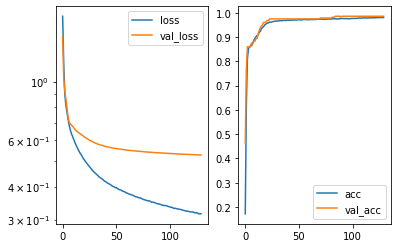

Predicted cell: Cells Probability: [[0.94952744]]
True Cell type: Cells
x [[0.47475633]]
True positional value x 0.5
y [[0.70565367]]
True positional value y 0.7083333333333334


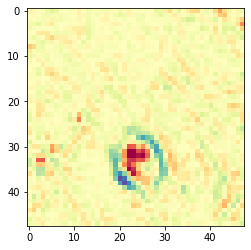

Epoch 131/250
5180/5180 [==============================] - 4s 848us/step - loss: 0.3148 - acc: 0.9792 - val_loss: 0.5271 - val_acc: 0.9853

Epoch 00131: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5271344837688264, 'val_acc': 0.9853479938629346, 'loss': 0.31475015347068375, 'acc': 0.979150594431461, 'lr': 1e-06}


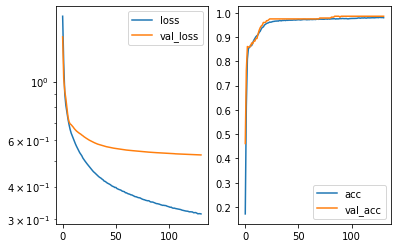

Predicted cell: Cells Probability: [[0.9768024]]
True Cell type: Cells
x [[0.6139128]]
True positional value x 0.7083333333333334
y [[0.43911934]]
True positional value y 0.2916666666666667


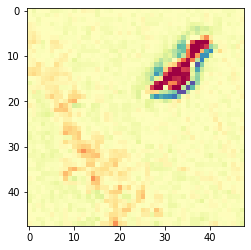

Epoch 132/250
5180/5180 [==============================] - 4s 858us/step - loss: 0.3139 - acc: 0.9815 - val_loss: 0.5270 - val_acc: 0.9853

Epoch 00132: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5270212973867144, 'val_acc': 0.9853479938629346, 'loss': 0.313853708243278, 'acc': 0.9814671945387793, 'lr': 1e-06}


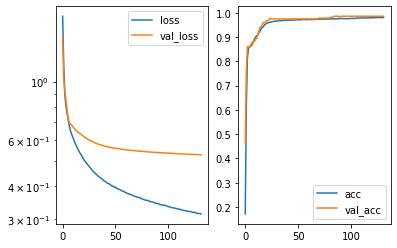

Predicted cell: Cells Probability: [[0.99694616]]
True Cell type: Cells
x [[0.7119053]]
True positional value x 0.7083333333333334
y [[0.1951331]]
True positional value y 0.5


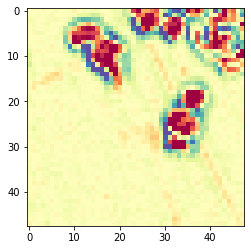

Epoch 133/250
5180/5180 [==============================] - 4s 864us/step - loss: 0.3135 - acc: 0.9807 - val_loss: 0.5268 - val_acc: 0.9853

Epoch 00133: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5268338191640246, 'val_acc': 0.9853479938629346, 'loss': 0.31345314892102394, 'acc': 0.9806949899003312, 'lr': 1e-06}


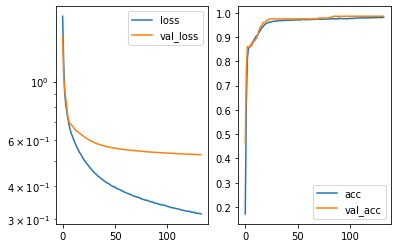

Predicted cell: Cells Probability: [[0.9839535]]
True Cell type: Cells
x [[0.7385993]]
True positional value x 0.7083333333333334
y [[0.12260307]]
True positional value y 0.2916666666666667


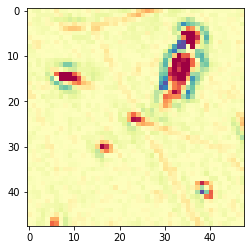

Epoch 134/250
5180/5180 [==============================] - 4s 862us/step - loss: 0.3126 - acc: 0.9811 - val_loss: 0.5268 - val_acc: 0.9853

Epoch 00134: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5268363173191364, 'val_acc': 0.9853479938629346, 'loss': 0.3125700865473066, 'acc': 0.9810810922195552, 'lr': 1e-06}


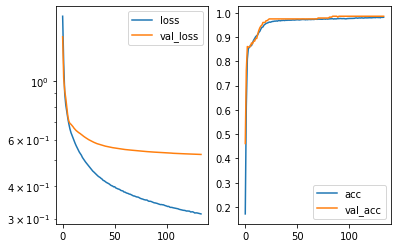

Predicted cell: Normal Probability: [[0.973668]]
True Cell type: Normal
x [[0.58958936]]
True positional value x 0.5
y [[0.4829591]]
True positional value y 0.5


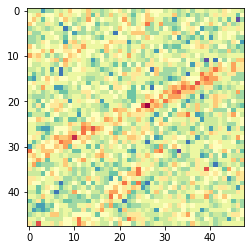

Epoch 135/250
5180/5180 [==============================] - 4s 863us/step - loss: 0.3137 - acc: 0.9809 - val_loss: 0.5265 - val_acc: 0.9853

Epoch 00135: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5264537321342216, 'val_acc': 0.9853479938629346, 'loss': 0.3137380211509793, 'acc': 0.9808880445119497, 'lr': 1e-06}


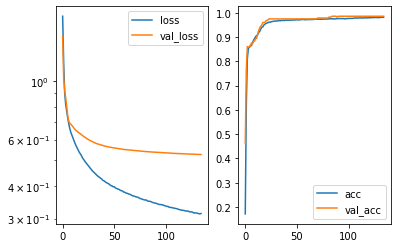

Predicted cell: Cells Probability: [[0.91693074]]
True Cell type: Cells
x [[0.31590882]]
True positional value x 0.2916666666666667
y [[0.22499318]]
True positional value y 0.2916666666666667


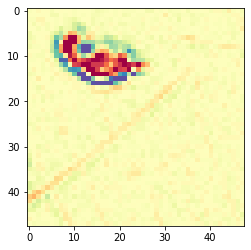

Epoch 136/250
5180/5180 [==============================] - 5s 873us/step - loss: 0.3120 - acc: 0.9809 - val_loss: 0.5260 - val_acc: 0.9853

Epoch 00136: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5260090681659433, 'val_acc': 0.9853479938629346, 'loss': 0.3120008739265236, 'acc': 0.9808880422106121, 'lr': 1e-06}


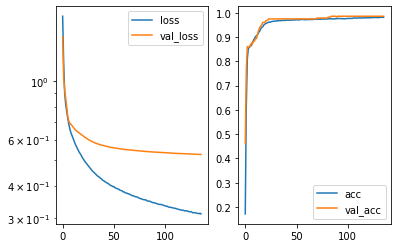

Predicted cell: Cells Probability: [[0.90119326]]
True Cell type: Normal
x [[0.5862247]]
True positional value x 0.5
y [[0.44101533]]
True positional value y 0.5


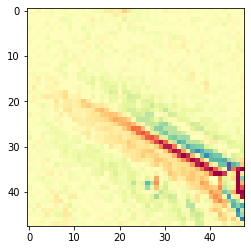

Epoch 137/250
5180/5180 [==============================] - 4s 856us/step - loss: 0.3118 - acc: 0.9809 - val_loss: 0.5257 - val_acc: 0.9853

Epoch 00137: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.525679153182131, 'val_acc': 0.9853479938629346, 'loss': 0.31182048380605043, 'acc': 0.9808880399092744, 'lr': 1e-06}


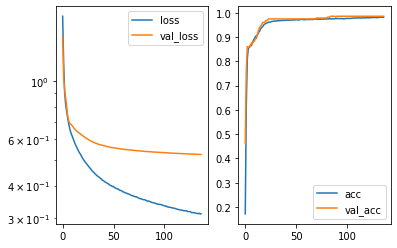

Predicted cell: Normal Probability: [[0.9438806]]
True Cell type: Normal
x [[0.3963182]]
True positional value x 0.5
y [[0.52471966]]
True positional value y 0.5


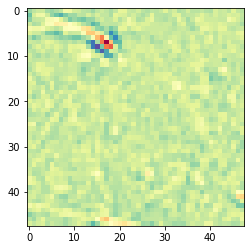

Epoch 138/250
5180/5180 [==============================] - 4s 859us/step - loss: 0.3117 - acc: 0.9815 - val_loss: 0.5256 - val_acc: 0.9853

Epoch 00138: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5255647908636939, 'val_acc': 0.9853479938629346, 'loss': 0.31167253656276867, 'acc': 0.9814671924675754, 'lr': 1e-06}


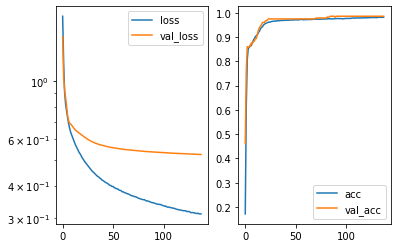

Predicted cell: Cells Probability: [[0.99260783]]
True Cell type: Cells
x [[0.7303386]]
True positional value x 0.5
y [[0.26536018]]
True positional value y 0.5


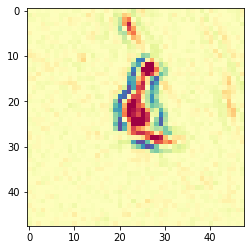

Epoch 139/250
5180/5180 [==============================] - 4s 849us/step - loss: 0.3106 - acc: 0.9813 - val_loss: 0.5254 - val_acc: 0.9853

Epoch 00139: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5253794736914582, 'val_acc': 0.9853479938629346, 'loss': 0.3106058307826289, 'acc': 0.9812741445298361, 'lr': 1e-06}


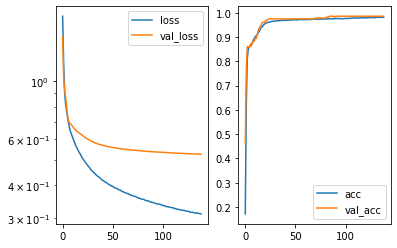

Predicted cell: Cells Probability: [[0.94257075]]
True Cell type: Normal
x [[0.788355]]
True positional value x 0.5
y [[0.60142773]]
True positional value y 0.5


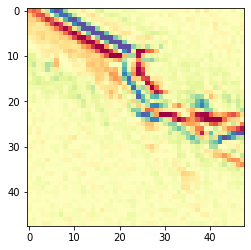

Epoch 140/250
5180/5180 [==============================] - 4s 845us/step - loss: 0.3103 - acc: 0.9811 - val_loss: 0.5253 - val_acc: 0.9853

Epoch 00140: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5252830715843173, 'val_acc': 0.9853479938629346, 'loss': 0.3102738609875491, 'acc': 0.9810810901483513, 'lr': 1e-06}


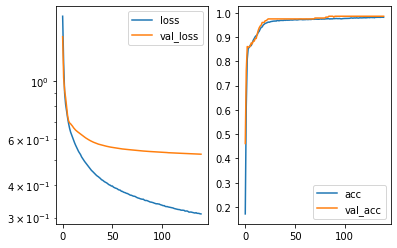

Predicted cell: Cells Probability: [[0.9463942]]
True Cell type: Cells
x [[0.6130295]]
True positional value x 0.5
y [[0.54095834]]
True positional value y 0.5


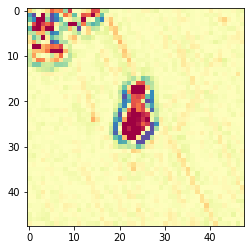

Epoch 141/250
5180/5180 [==============================] - 4s 861us/step - loss: 0.3089 - acc: 0.9813 - val_loss: 0.5250 - val_acc: 0.9853

Epoch 00141: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5249571522950253, 'val_acc': 0.9853479938629346, 'loss': 0.3088942210416536, 'acc': 0.9812741422284984, 'lr': 1e-06}


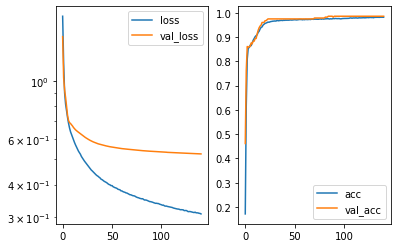

Predicted cell: Cells Probability: [[0.9615511]]
True Cell type: Cells
x [[0.19648743]]
True positional value x 0.2916666666666667
y [[0.6981471]]
True positional value y 0.7083333333333334


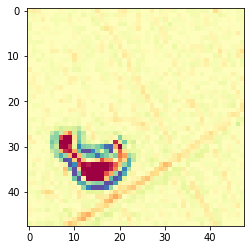

Epoch 142/250
5180/5180 [==============================] - 5s 892us/step - loss: 0.3096 - acc: 0.9815 - val_loss: 0.5249 - val_acc: 0.9853

Epoch 00142: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5248739872223291, 'val_acc': 0.9853479938629346, 'loss': 0.30962567946165226, 'acc': 0.9814671910867728, 'lr': 1e-06}


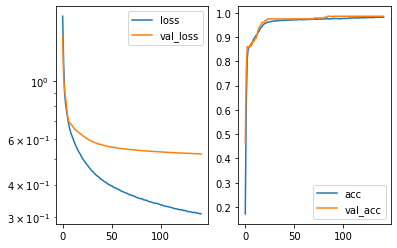

Predicted cell: Normal Probability: [[0.9535734]]
True Cell type: Normal
x [[0.49159256]]
True positional value x 0.5
y [[0.35581538]]
True positional value y 0.5


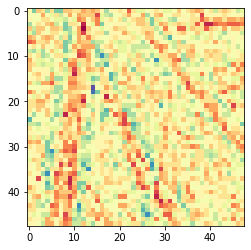

Epoch 143/250
5180/5180 [==============================] - 4s 868us/step - loss: 0.3086 - acc: 0.9815 - val_loss: 0.5246 - val_acc: 0.9853

Epoch 00143: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5246129040316347, 'val_acc': 0.9853479938629346, 'loss': 0.308595136325792, 'acc': 0.9814671876347664, 'lr': 1e-06}


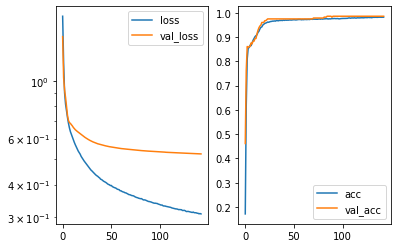

Predicted cell: Cells Probability: [[0.9971245]]
True Cell type: Cells
x [[0.20647804]]
True positional value x 0.7083333333333334
y [[0.74538636]]
True positional value y 0.7083333333333334


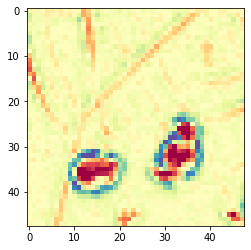

Epoch 144/250
5180/5180 [==============================] - 5s 876us/step - loss: 0.3074 - acc: 0.9819 - val_loss: 0.5244 - val_acc: 0.9853

Epoch 00144: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5244192293275407, 'val_acc': 0.9853479938629346, 'loss': 0.3073555684457875, 'acc': 0.9818532934059968, 'lr': 1e-06}


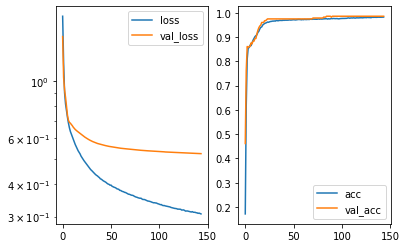

Predicted cell: Cells Probability: [[0.9962161]]
True Cell type: Cells
x [[0.48480758]]
True positional value x 0.7083333333333334
y [[0.26037845]]
True positional value y 0.2916666666666667


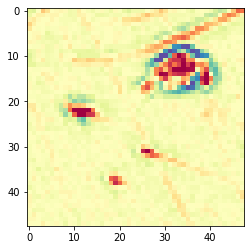

Epoch 145/250
5180/5180 [==============================] - 5s 909us/step - loss: 0.3083 - acc: 0.9819 - val_loss: 0.5243 - val_acc: 0.9853

Epoch 00145: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5243038321152712, 'val_acc': 0.9853479938629346, 'loss': 0.3082714859813337, 'acc': 0.9818532922553279, 'lr': 1e-06}


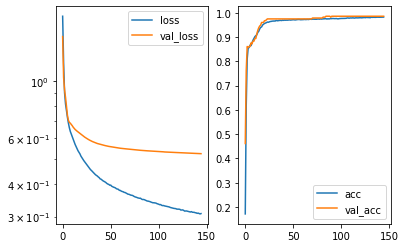

Predicted cell: Cells Probability: [[0.9630809]]
True Cell type: Cells
x [[0.5807371]]
True positional value x 0.7083333333333334
y [[0.34757277]]
True positional value y 0.2916666666666667


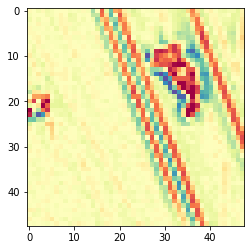

Epoch 146/250
5180/5180 [==============================] - 5s 874us/step - loss: 0.3071 - acc: 0.9819 - val_loss: 0.5240 - val_acc: 0.9853

Epoch 00146: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5240104921134837, 'val_acc': 0.9853479938629346, 'loss': 0.3070739621591384, 'acc': 0.9818532911046591, 'lr': 1e-06}


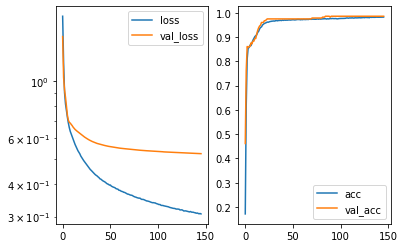

Predicted cell: Cells Probability: [[0.98048306]]
True Cell type: Cells
x [[0.33918127]]
True positional value x 0.2916666666666667
y [[0.4631229]]
True positional value y 0.7083333333333334


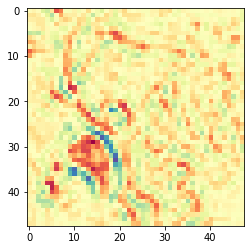

Epoch 147/250
5180/5180 [==============================] - 5s 897us/step - loss: 0.3065 - acc: 0.9828 - val_loss: 0.5238 - val_acc: 0.9853

Epoch 00147: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5238444853178311, 'val_acc': 0.9853479938629346, 'loss': 0.3064502507563263, 'acc': 0.9828185423000438, 'lr': 1e-06}


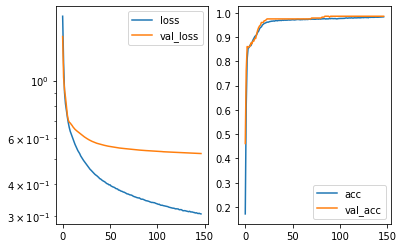

Predicted cell: Cells Probability: [[0.9905338]]
True Cell type: Cells
x [[0.69736665]]
True positional value x 0.7083333333333334
y [[0.5311409]]
True positional value y 0.5


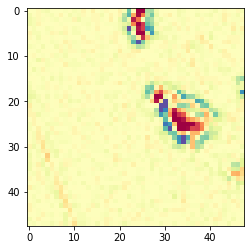

Epoch 148/250
5180/5180 [==============================] - 5s 869us/step - loss: 0.3069 - acc: 0.9824 - val_loss: 0.5237 - val_acc: 0.9853

Epoch 00148: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5236518391759404, 'val_acc': 0.9853479938629346, 'loss': 0.3068578824343368, 'acc': 0.9824324422821575, 'lr': 1e-06}


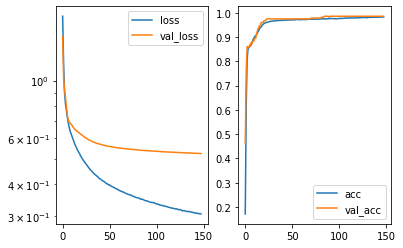

Predicted cell: Cells Probability: [[0.9630413]]
True Cell type: Cells
x [[0.36069703]]
True positional value x 0.2916666666666667
y [[0.3813479]]
True positional value y 0.2916666666666667


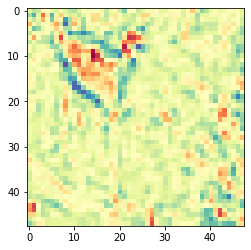

Epoch 149/250
5180/5180 [==============================] - 5s 890us/step - loss: 0.3062 - acc: 0.9826 - val_loss: 0.5235 - val_acc: 0.9853

Epoch 00149: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5235188817366575, 'val_acc': 0.9853479938629346, 'loss': 0.3061594801980096, 'acc': 0.9826254934417695, 'lr': 1e-06}


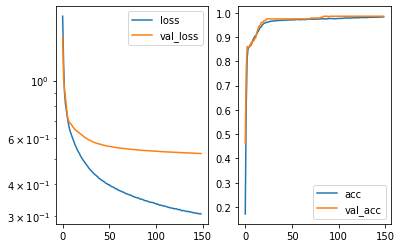

Predicted cell: Cells Probability: [[0.98666114]]
True Cell type: Cells
x [[0.8866877]]
True positional value x 0.7083333333333334
y [[0.37612945]]
True positional value y 0.5


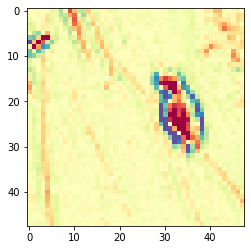

Epoch 150/250
5180/5180 [==============================] - 4s 855us/step - loss: 0.3064 - acc: 0.9828 - val_loss: 0.5232 - val_acc: 0.9853

Epoch 00150: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5232008573336479, 'val_acc': 0.9853479938629346, 'loss': 0.3063785421111869, 'acc': 0.9828185434507127, 'lr': 1e-06}


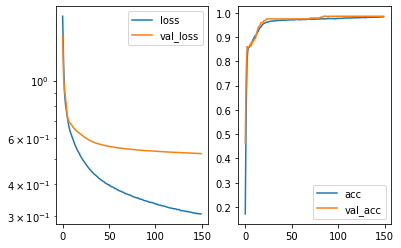

Predicted cell: Cells Probability: [[0.9841941]]
True Cell type: Cells
x [[0.15886028]]
True positional value x 0.2916666666666667
y [[0.41156825]]
True positional value y 0.7083333333333334


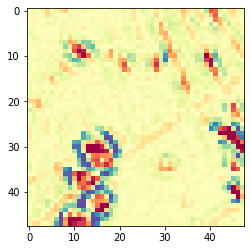

Epoch 151/250
5180/5180 [==============================] - 4s 853us/step - loss: 0.3062 - acc: 0.9826 - val_loss: 0.5232 - val_acc: 0.9853

Epoch 00151: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.523152462728731, 'val_acc': 0.9853479938629346, 'loss': 0.30618124901097715, 'acc': 0.9826254922911007, 'lr': 1e-06}


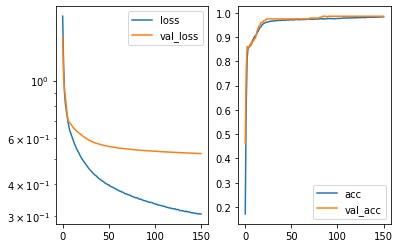

Predicted cell: Cells Probability: [[0.901861]]
True Cell type: Cells
x [[0.5757018]]
True positional value x 0.5
y [[0.7891383]]
True positional value y 0.7083333333333334


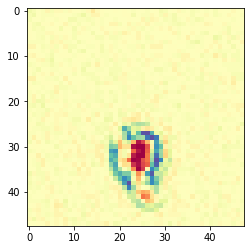

Epoch 152/250
5180/5180 [==============================] - 4s 864us/step - loss: 0.3045 - acc: 0.9826 - val_loss: 0.5227 - val_acc: 0.9853

Epoch 00152: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5227366768833481, 'val_acc': 0.9853479938629346, 'loss': 0.30445899892037437, 'acc': 0.9826254925212344, 'lr': 1e-06}


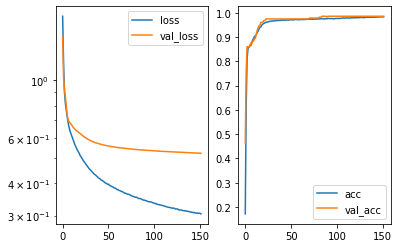

Predicted cell: Cells Probability: [[0.9852691]]
True Cell type: Cells
x [[0.30859673]]
True positional value x 0.5
y [[0.5762105]]
True positional value y 0.5


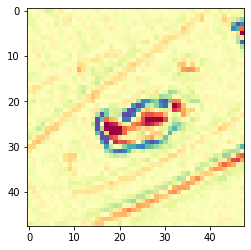

Epoch 153/250
5180/5180 [==============================] - 4s 847us/step - loss: 0.3054 - acc: 0.9832 - val_loss: 0.5227 - val_acc: 0.9853

Epoch 00153: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.52273651269766, 'val_acc': 0.9853479938629346, 'loss': 0.30544361426103067, 'acc': 0.9832046457699367, 'lr': 1e-06}


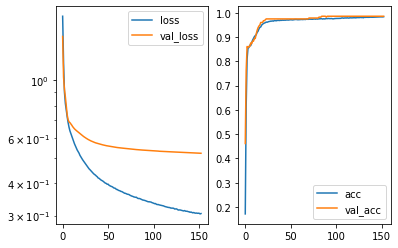

Predicted cell: Cells Probability: [[0.98121166]]
True Cell type: Cells
x [[0.56925267]]
True positional value x 0.2916666666666667
y [[0.38198406]]
True positional value y 0.5


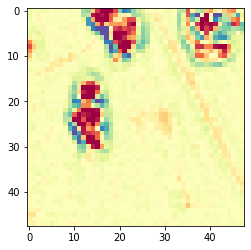

Epoch 154/250
5180/5180 [==============================] - 4s 858us/step - loss: 0.3037 - acc: 0.9840 - val_loss: 0.5223 - val_acc: 0.9853

Epoch 00154: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5223413574826586, 'val_acc': 0.9853479938629346, 'loss': 0.3037041327898107, 'acc': 0.9839768435043718, 'lr': 1e-06}


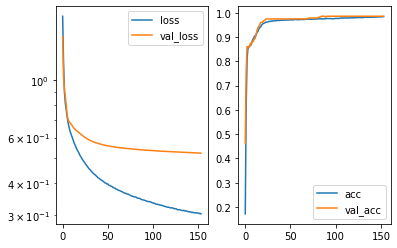

Predicted cell: Cells Probability: [[0.9933202]]
True Cell type: Cells
x [[0.6419145]]
True positional value x 0.7083333333333334
y [[0.69703174]]
True positional value y 0.5


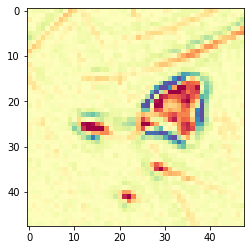

Epoch 155/250
5180/5180 [==============================] - 4s 864us/step - loss: 0.3041 - acc: 0.9836 - val_loss: 0.5222 - val_acc: 0.9853

Epoch 00155: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5221874349283211, 'val_acc': 0.9853479938629346, 'loss': 0.3041403870094697, 'acc': 0.983590745787823, 'lr': 1e-06}


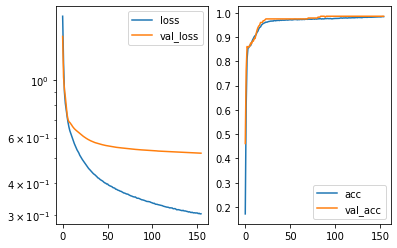

Predicted cell: Cells Probability: [[0.9922156]]
True Cell type: Cells
x [[0.6265406]]
True positional value x 0.7083333333333334
y [[0.5266696]]
True positional value y 0.5


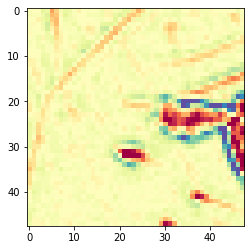

Epoch 156/250
5180/5180 [==============================] - 5s 884us/step - loss: 0.3022 - acc: 0.9851 - val_loss: 0.5222 - val_acc: 0.9853

Epoch 00156: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5221776628232264, 'val_acc': 0.9853479938629346, 'loss': 0.3022197129413428, 'acc': 0.9851351437881647, 'lr': 1e-06}


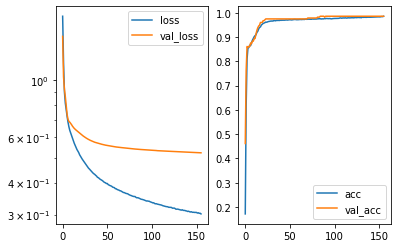

Predicted cell: Cells Probability: [[0.9994147]]
True Cell type: Cells
x [[0.6919051]]
True positional value x 0.7083333333333334
y [[0.6225617]]
True positional value y 0.2916666666666667


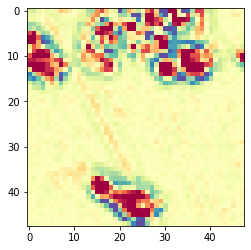

Epoch 157/250
5180/5180 [==============================] - 4s 856us/step - loss: 0.3031 - acc: 0.9844 - val_loss: 0.5222 - val_acc: 0.9853

Epoch 00157: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5221607599939618, 'val_acc': 0.9853479938629346, 'loss': 0.30313699171810077, 'acc': 0.984362944672927, 'lr': 1e-06}


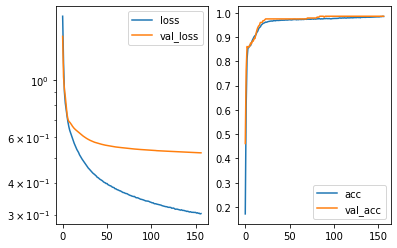

Predicted cell: Cells Probability: [[0.9932555]]
True Cell type: Cells
x [[0.2377996]]
True positional value x 0.2916666666666667
y [[0.37735403]]
True positional value y 0.5


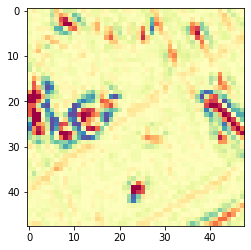

Epoch 158/250
5180/5180 [==============================] - 5s 886us/step - loss: 0.3026 - acc: 0.9851 - val_loss: 0.5221 - val_acc: 0.9853

Epoch 00158: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5221240518293975, 'val_acc': 0.9853479938629346, 'loss': 0.3025987477376194, 'acc': 0.9851351424073621, 'lr': 1e-06}


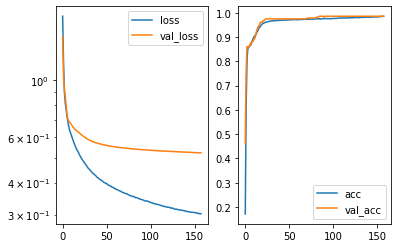

Predicted cell: Cells Probability: [[0.978922]]
True Cell type: Cells
x [[0.53654814]]
True positional value x 0.5
y [[0.32093394]]
True positional value y 0.2916666666666667


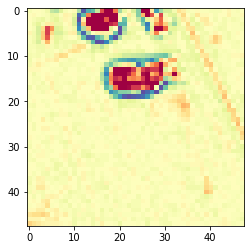

Epoch 159/250
5180/5180 [==============================] - 5s 885us/step - loss: 0.3015 - acc: 0.9853 - val_loss: 0.5220 - val_acc: 0.9853

Epoch 00159: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5219598368847327, 'val_acc': 0.9853479938629346, 'loss': 0.3014783181508996, 'acc': 0.9853281947176429, 'lr': 1e-06}


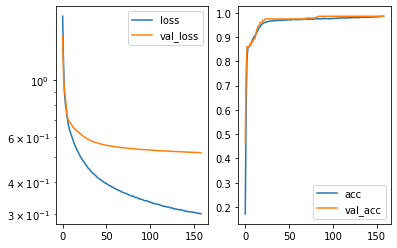

Predicted cell: Cells Probability: [[0.8911762]]
True Cell type: Cells
x [[0.30469728]]
True positional value x 0.2916666666666667
y [[0.67021257]]
True positional value y 0.7083333333333334


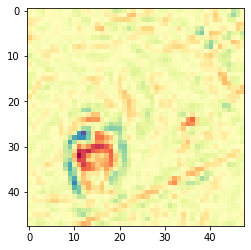

Epoch 160/250
5180/5180 [==============================] - 4s 868us/step - loss: 0.3016 - acc: 0.9847 - val_loss: 0.5216 - val_acc: 0.9853

Epoch 00160: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5216266464837741, 'val_acc': 0.9853479938629346, 'loss': 0.30156296491622925, 'acc': 0.9847490469921509, 'lr': 1e-06}


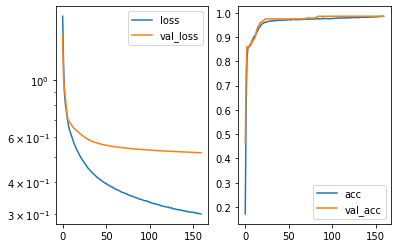

Predicted cell: Cells Probability: [[0.9927435]]
True Cell type: Cells
x [[0.22518393]]
True positional value x 0.2916666666666667
y [[0.7534576]]
True positional value y 0.7083333333333334


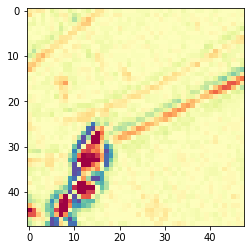

Epoch 161/250
5180/5180 [==============================] - 5s 875us/step - loss: 0.3009 - acc: 0.9855 - val_loss: 0.5214 - val_acc: 0.9853

Epoch 00161: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5213922742522243, 'val_acc': 0.9853479938629346, 'loss': 0.3009021872489149, 'acc': 0.9855212435759172, 'lr': 1e-06}


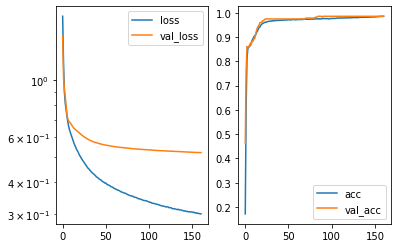

Predicted cell: Cells Probability: [[0.96413445]]
True Cell type: Cells
x [[0.36366]]
True positional value x 0.2916666666666667
y [[0.38175875]]
True positional value y 0.2916666666666667


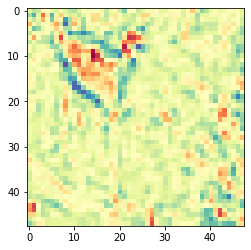

Epoch 162/250
5180/5180 [==============================] - 4s 842us/step - loss: 0.3005 - acc: 0.9859 - val_loss: 0.5213 - val_acc: 0.9853

Epoch 00162: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5213300561730242, 'val_acc': 0.9853479938629346, 'loss': 0.30049486084334176, 'acc': 0.9859073481964788, 'lr': 1e-06}


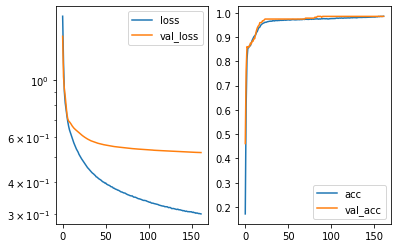

Predicted cell: Cells Probability: [[0.86213464]]
True Cell type: Cells
x [[0.7516093]]
True positional value x 0.7083333333333334
y [[0.3343352]]
True positional value y 0.2916666666666667


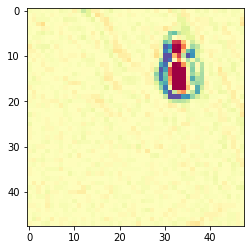

Epoch 163/250
5180/5180 [==============================] - 4s 847us/step - loss: 0.3005 - acc: 0.9849 - val_loss: 0.5213 - val_acc: 0.9853

Epoch 00163: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.521270602832347, 'val_acc': 0.9853479938629346, 'loss': 0.3004720368670681, 'acc': 0.9849420946997565, 'lr': 1e-06}


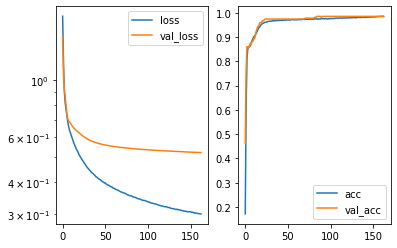

Predicted cell: Cells Probability: [[0.9840158]]
True Cell type: Cells
x [[0.5421066]]
True positional value x 0.5
y [[0.5847299]]
True positional value y 0.7083333333333334


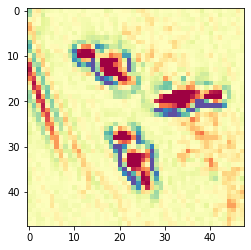

Epoch 164/250
5180/5180 [==============================] - 4s 855us/step - loss: 0.2997 - acc: 0.9875 - val_loss: 0.5211 - val_acc: 0.9853

Epoch 00164: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5210502130207998, 'val_acc': 0.9853479938629346, 'loss': 0.2996832179516899, 'acc': 0.9874517482680243, 'lr': 1e-06}


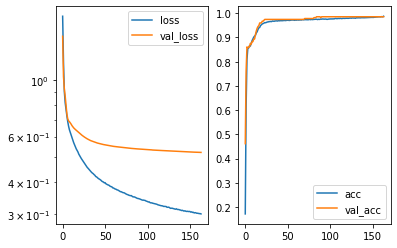

Predicted cell: Cells Probability: [[0.99558735]]
True Cell type: Cells
x [[0.5690893]]
True positional value x 0.2916666666666667
y [[0.5788024]]
True positional value y 0.5


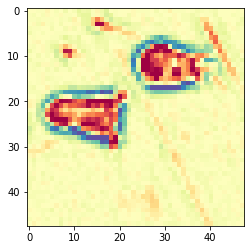

Epoch 165/250
5180/5180 [==============================] - 5s 879us/step - loss: 0.2997 - acc: 0.9857 - val_loss: 0.5210 - val_acc: 0.9853

Epoch 00165: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.520993308269934, 'val_acc': 0.9853479938629346, 'loss': 0.2996976105172662, 'acc': 0.9857142947355293, 'lr': 1e-06}


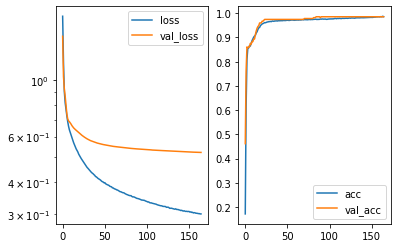

Predicted cell: Cells Probability: [[0.98799163]]
True Cell type: Cells
x [[0.6931729]]
True positional value x 0.5
y [[0.39905512]]
True positional value y 0.5


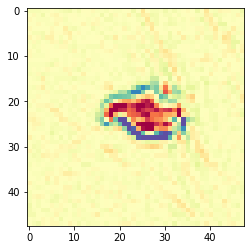

Epoch 166/250
5180/5180 [==============================] - 4s 867us/step - loss: 0.2991 - acc: 0.9871 - val_loss: 0.5209 - val_acc: 0.9853

Epoch 00166: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5208613547213349, 'val_acc': 0.9853479938629346, 'loss': 0.2990860963189924, 'acc': 0.987065648250138, 'lr': 1e-06}


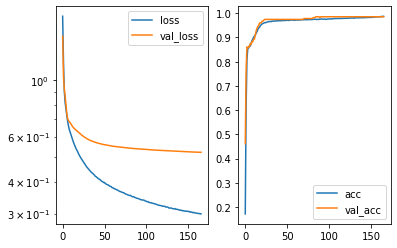

Predicted cell: Cells Probability: [[0.9955776]]
True Cell type: Cells
x [[0.82169116]]
True positional value x 0.7083333333333334
y [[0.14781821]]
True positional value y 0.2916666666666667


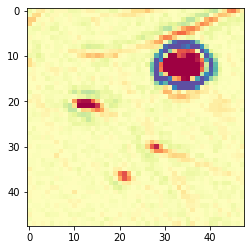

Epoch 167/250
5180/5180 [==============================] - 4s 865us/step - loss: 0.2987 - acc: 0.9880 - val_loss: 0.5206 - val_acc: 0.9853

Epoch 00167: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5205949942270914, 'val_acc': 0.9853479938629346, 'loss': 0.2986907168474897, 'acc': 0.988030897144185, 'lr': 1e-06}


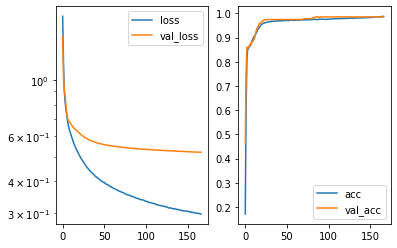

Predicted cell: Cells Probability: [[0.9900064]]
True Cell type: Cells
x [[0.50279915]]
True positional value x 0.5
y [[0.11215676]]
True positional value y 0.2916666666666667


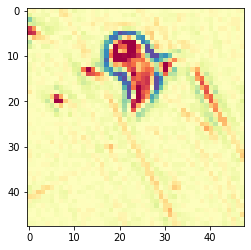

Epoch 168/250
5180/5180 [==============================] - 4s 852us/step - loss: 0.2993 - acc: 0.9863 - val_loss: 0.5205 - val_acc: 0.9853

Epoch 00168: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5204936340178326, 'val_acc': 0.9853479938629346, 'loss': 0.2992729078618716, 'acc': 0.9862934470636965, 'lr': 1e-06}


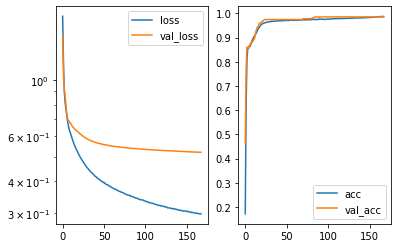

Predicted cell: Cells Probability: [[0.9451347]]
True Cell type: Cells
x [[0.5675003]]
True positional value x 0.7083333333333334
y [[0.3598995]]
True positional value y 0.2916666666666667


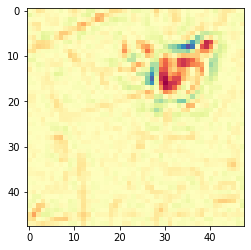

Epoch 169/250
5180/5180 [==============================] - 4s 852us/step - loss: 0.2984 - acc: 0.9871 - val_loss: 0.5204 - val_acc: 0.9853

Epoch 00169: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5203569690823119, 'val_acc': 0.9853479938629346, 'loss': 0.29840944632600175, 'acc': 0.987065648250138, 'lr': 1e-06}


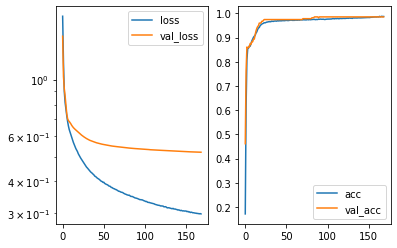

Predicted cell: Cells Probability: [[0.9835999]]
True Cell type: Cells
x [[0.73007125]]
True positional value x 0.7083333333333334
y [[0.23914547]]
True positional value y 0.2916666666666667


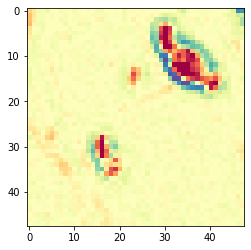

Epoch 170/250
5180/5180 [==============================] - 4s 852us/step - loss: 0.2991 - acc: 0.9869 - val_loss: 0.5203 - val_acc: 0.9853

Epoch 00170: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5202600966879737, 'val_acc': 0.9853479938629346, 'loss': 0.2991335780924351, 'acc': 0.9868725959398572, 'lr': 1e-06}


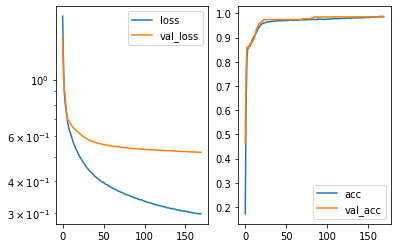

Predicted cell: Cells Probability: [[0.9881486]]
True Cell type: Cells
x [[0.6921417]]
True positional value x 0.5
y [[0.3983843]]
True positional value y 0.5


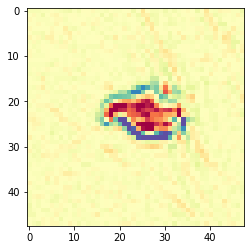

Epoch 171/250
5180/5180 [==============================] - 4s 858us/step - loss: 0.2980 - acc: 0.9878 - val_loss: 0.5201 - val_acc: 0.9853

Epoch 00171: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5200779073404305, 'val_acc': 0.9853479938629346, 'loss': 0.2980377613117336, 'acc': 0.9878378471352419, 'lr': 1e-06}


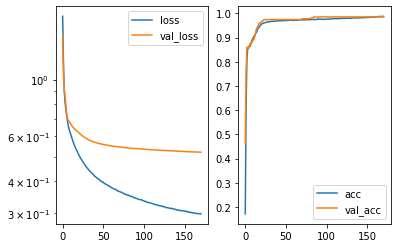

Predicted cell: Cells Probability: [[0.9959265]]
True Cell type: Cells
x [[0.78489983]]
True positional value x 0.5
y [[0.3185628]]
True positional value y 0.5


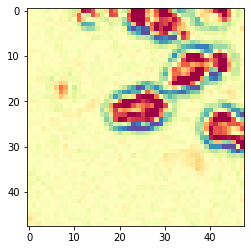

Epoch 172/250
5180/5180 [==============================] - 5s 887us/step - loss: 0.2977 - acc: 0.9886 - val_loss: 0.5200 - val_acc: 0.9853

Epoch 00172: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5200043239872971, 'val_acc': 0.9853479938629346, 'loss': 0.2976658898891169, 'acc': 0.9886100494723522, 'lr': 1e-06}


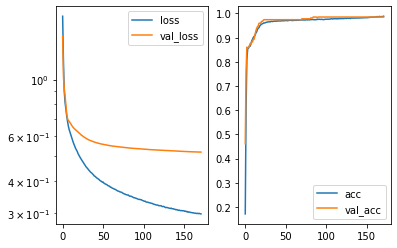

Predicted cell: Cells Probability: [[0.9575471]]
True Cell type: Cells
x [[0.16440316]]
True positional value x 0.2916666666666667
y [[0.43196934]]
True positional value y 0.2916666666666667


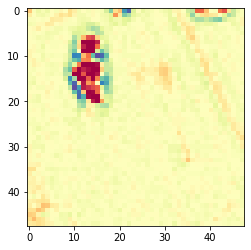

Epoch 173/250
5180/5180 [==============================] - 5s 869us/step - loss: 0.2973 - acc: 0.9888 - val_loss: 0.5199 - val_acc: 0.9853

Epoch 00173: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5198645117955331, 'val_acc': 0.9853479938629346, 'loss': 0.29730896070657087, 'acc': 0.9888030994812954, 'lr': 1e-06}


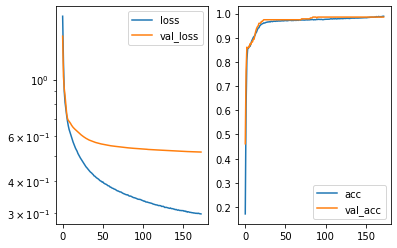

Predicted cell: Cells Probability: [[0.9538665]]
True Cell type: Cells
x [[0.753281]]
True positional value x 0.2916666666666667
y [[0.90554565]]
True positional value y 0.7083333333333334


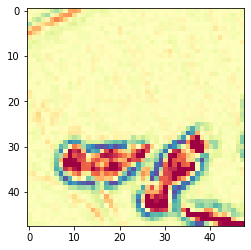

Epoch 174/250
5180/5180 [==============================] - 4s 858us/step - loss: 0.2974 - acc: 0.9884 - val_loss: 0.5198 - val_acc: 0.9853

Epoch 00174: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5197905874077654, 'val_acc': 0.9853479938629346, 'loss': 0.29738161151933856, 'acc': 0.9884169960114026, 'lr': 1e-06}


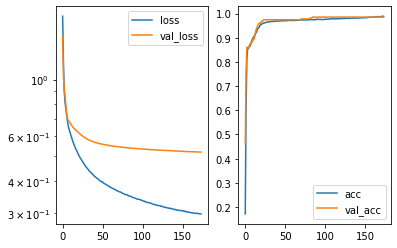

Predicted cell: Cells Probability: [[0.9699584]]
True Cell type: Cells
x [[0.1987993]]
True positional value x 0.2916666666666667
y [[0.6963009]]
True positional value y 0.7083333333333334


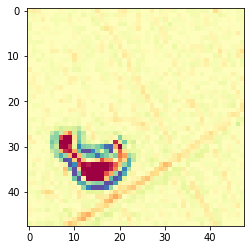

Epoch 175/250
5180/5180 [==============================] - 4s 862us/step - loss: 0.2965 - acc: 0.9884 - val_loss: 0.5197 - val_acc: 0.9853

Epoch 00175: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5197150711611513, 'val_acc': 0.9853479938629346, 'loss': 0.29645196339798713, 'acc': 0.9884169994634091, 'lr': 1e-06}


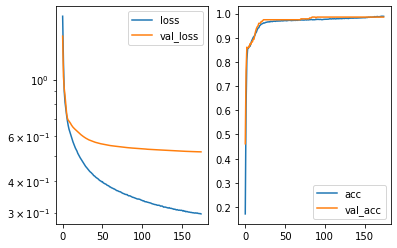

Predicted cell: Cells Probability: [[0.9871307]]
True Cell type: Cells
x [[0.733704]]
True positional value x 0.7083333333333334
y [[0.12093703]]
True positional value y 0.2916666666666667


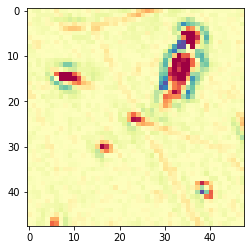

Epoch 176/250
5180/5180 [==============================] - 4s 852us/step - loss: 0.2959 - acc: 0.9898 - val_loss: 0.5197 - val_acc: 0.9853

Epoch 00176: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5196970934832926, 'val_acc': 0.9853479938629346, 'loss': 0.29586778678949277, 'acc': 0.9897683472246737, 'lr': 1e-06}


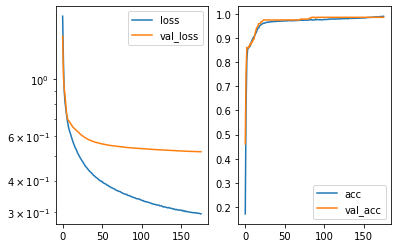

Predicted cell: Cells Probability: [[0.9690132]]
True Cell type: Cells
x [[0.38348702]]
True positional value x 0.7083333333333334
y [[0.53193486]]
True positional value y 0.7083333333333334


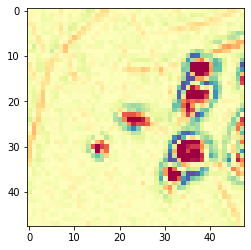

Epoch 177/250
5180/5180 [==============================] - 4s 856us/step - loss: 0.2959 - acc: 0.9894 - val_loss: 0.5195 - val_acc: 0.9853

Epoch 00177: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5195185205875299, 'val_acc': 0.9853479938629346, 'loss': 0.29591508238472075, 'acc': 0.9893822460561186, 'lr': 1e-06}


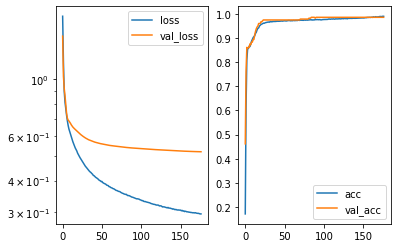

Predicted cell: Cells Probability: [[0.878573]]
True Cell type: Cells
x [[0.52856624]]
True positional value x 0.5
y [[0.37466937]]
True positional value y 0.5


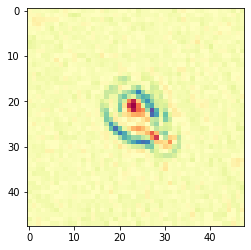

Epoch 178/250
5180/5180 [==============================] - 4s 861us/step - loss: 0.2952 - acc: 0.9903 - val_loss: 0.5194 - val_acc: 0.9853

Epoch 00178: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5194426667995942, 'val_acc': 0.9853479938629346, 'loss': 0.2951905087614612, 'acc': 0.9903474984021721, 'lr': 1e-06}


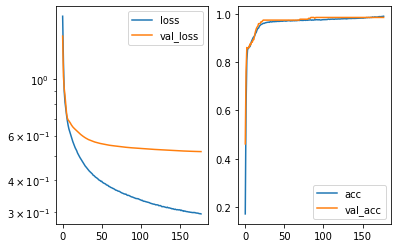

Predicted cell: Normal Probability: [[0.98030794]]
True Cell type: Normal
x [[0.34767917]]
True positional value x 0.5
y [[0.5042378]]
True positional value y 0.5


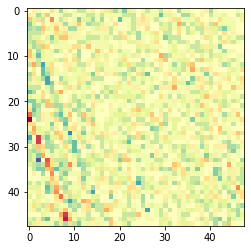

Epoch 179/250
5180/5180 [==============================] - 4s 865us/step - loss: 0.2957 - acc: 0.9900 - val_loss: 0.5192 - val_acc: 0.9853

Epoch 00179: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.519222562566345, 'val_acc': 0.9853479938629346, 'loss': 0.2956788346574113, 'acc': 0.9899613995349545, 'lr': 1e-06}


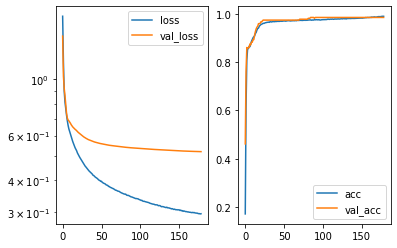

Predicted cell: Cells Probability: [[0.9798371]]
True Cell type: Cells
x [[0.6448101]]
True positional value x 0.7083333333333334
y [[0.4904312]]
True positional value y 0.2916666666666667


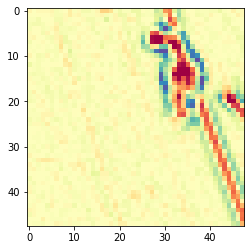

Epoch 180/250
5180/5180 [==============================] - 4s 854us/step - loss: 0.2955 - acc: 0.9902 - val_loss: 0.5190 - val_acc: 0.9853

Epoch 00180: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5189708630680602, 'val_acc': 0.9853479938629346, 'loss': 0.29547552896742657, 'acc': 0.9901544472425601, 'lr': 1e-06}


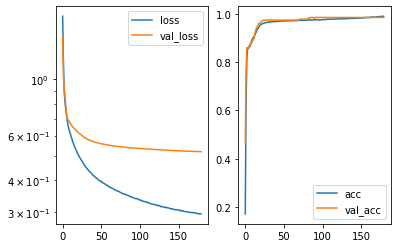

Predicted cell: Cells Probability: [[0.9972506]]
True Cell type: Cells
x [[0.48145324]]
True positional value x 0.5
y [[0.602592]]
True positional value y 0.5


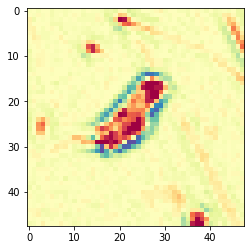

Epoch 181/250
5180/5180 [==============================] - 5s 873us/step - loss: 0.2947 - acc: 0.9911 - val_loss: 0.5191 - val_acc: 0.9853

Epoch 00181: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5190918838584816, 'val_acc': 0.9853479938629346, 'loss': 0.29469048090883204, 'acc': 0.9911196995886136, 'lr': 1e-06}


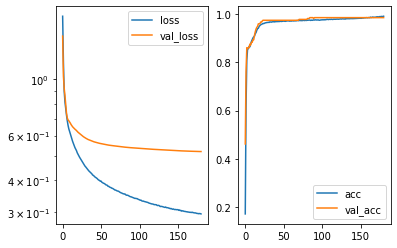

Predicted cell: Cells Probability: [[0.96876884]]
True Cell type: Cells
x [[0.48385972]]
True positional value x 0.5
y [[0.7092557]]
True positional value y 0.7083333333333334


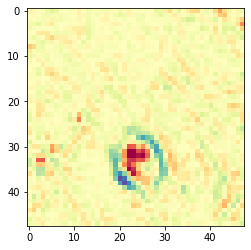

Epoch 182/250
5180/5180 [==============================] - 4s 850us/step - loss: 0.2939 - acc: 0.9909 - val_loss: 0.5187 - val_acc: 0.9853

Epoch 00182: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.518684664052048, 'val_acc': 0.9853479938629346, 'loss': 0.2939365982549071, 'acc': 0.9909266484290016, 'lr': 1e-06}


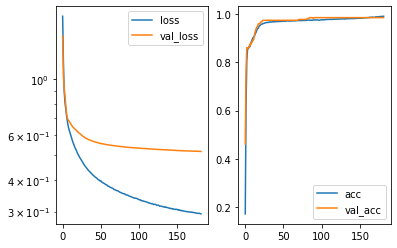

Predicted cell: Cells Probability: [[0.99650395]]
True Cell type: Cells
x [[0.23147021]]
True positional value x 0.2916666666666667
y [[0.703973]]
True positional value y 0.7083333333333334


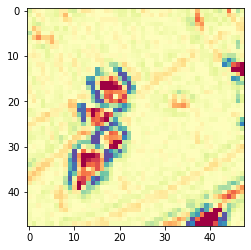

Epoch 183/250
5180/5180 [==============================] - 4s 846us/step - loss: 0.2945 - acc: 0.9903 - val_loss: 0.5187 - val_acc: 0.9853

Epoch 00183: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5186617802350949, 'val_acc': 0.9853479938629346, 'loss': 0.2944856395362427, 'acc': 0.9903474984021721, 'lr': 1e-06}


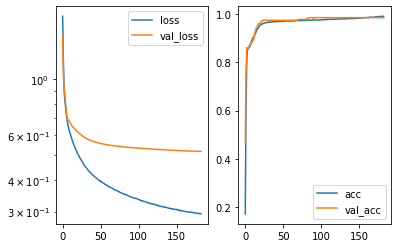

Predicted cell: Cells Probability: [[0.97452]]
True Cell type: Cells
x [[0.7825873]]
True positional value x 0.5
y [[0.8986361]]
True positional value y 0.7083333333333334


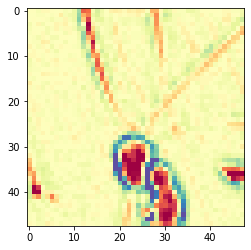

Epoch 184/250
5180/5180 [==============================] - 4s 844us/step - loss: 0.2934 - acc: 0.9902 - val_loss: 0.5184 - val_acc: 0.9853

Epoch 00184: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5184367547978411, 'val_acc': 0.9853479938629346, 'loss': 0.2934111541992909, 'acc': 0.9901544495438978, 'lr': 1e-06}


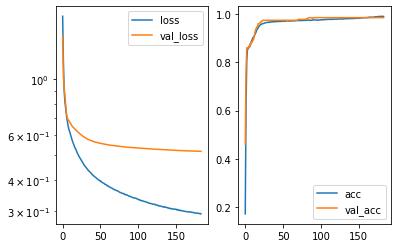

Predicted cell: Cells Probability: [[0.99509984]]
True Cell type: Cells
x [[0.38307315]]
True positional value x 0.5
y [[0.51927006]]
True positional value y 0.7083333333333334


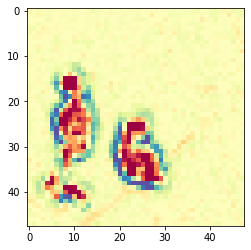

Epoch 185/250
5180/5180 [==============================] - 4s 868us/step - loss: 0.2939 - acc: 0.9905 - val_loss: 0.5185 - val_acc: 0.9853

Epoch 00185: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5184563483510699, 'val_acc': 0.9853479938629346, 'loss': 0.29389311850761357, 'acc': 0.9905405484111153, 'lr': 1e-06}


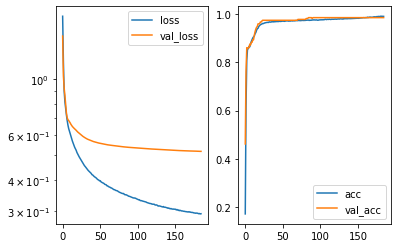

Predicted cell: Normal Probability: [[0.9839305]]
True Cell type: Normal
x [[0.51872784]]
True positional value x 0.5
y [[0.384824]]
True positional value y 0.5


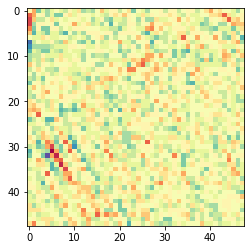

Epoch 186/250
5180/5180 [==============================] - 4s 840us/step - loss: 0.2924 - acc: 0.9915 - val_loss: 0.5183 - val_acc: 0.9853

Epoch 00186: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5183308879971068, 'val_acc': 0.9853479938629346, 'loss': 0.2924251323961383, 'acc': 0.9915057984558312, 'lr': 1e-06}


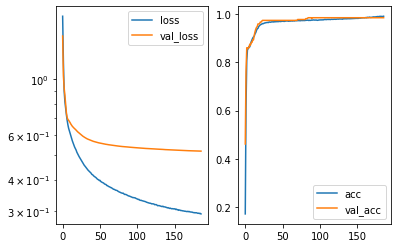

Predicted cell: Cells Probability: [[0.9492119]]
True Cell type: Cells
x [[0.57218003]]
True positional value x 0.7083333333333334
y [[0.35859764]]
True positional value y 0.2916666666666667


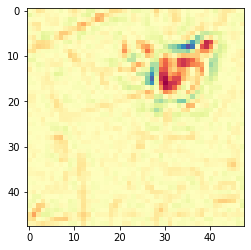

Epoch 187/250
5180/5180 [==============================] - 4s 851us/step - loss: 0.2923 - acc: 0.9923 - val_loss: 0.5184 - val_acc: 0.9853

Epoch 00187: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5183571000675579, 'val_acc': 0.9853479938629346, 'loss': 0.2923226189659369, 'acc': 0.9922779996422727, 'lr': 1e-06}


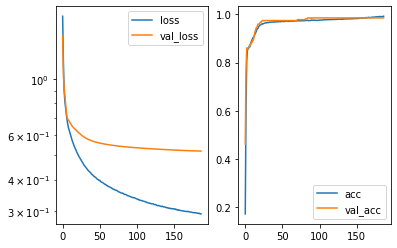

Predicted cell: Cells Probability: [[0.99285346]]
True Cell type: Cells
x [[0.5717797]]
True positional value x 0.7083333333333334
y [[0.41391024]]
True positional value y 0.2916666666666667


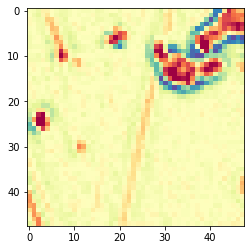

Epoch 188/250
5180/5180 [==============================] - 4s 857us/step - loss: 0.2930 - acc: 0.9909 - val_loss: 0.5183 - val_acc: 0.9853

Epoch 00188: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5182738725519006, 'val_acc': 0.9853479938629346, 'loss': 0.2930192633255108, 'acc': 0.9909266495796705, 'lr': 1e-06}


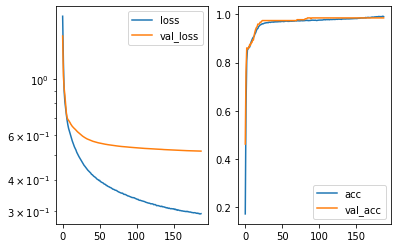

Predicted cell: Cells Probability: [[0.99016947]]
True Cell type: Cells
x [[0.70549357]]
True positional value x 0.5
y [[0.5022854]]
True positional value y 0.5


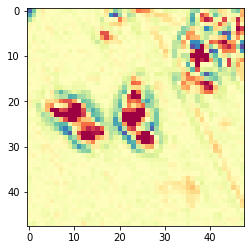

Epoch 189/250
5180/5180 [==============================] - 4s 845us/step - loss: 0.2922 - acc: 0.9915 - val_loss: 0.5181 - val_acc: 0.9853

Epoch 00189: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5180633747097336, 'val_acc': 0.9853479938629346, 'loss': 0.2922240646419378, 'acc': 0.9915057984558312, 'lr': 1e-06}


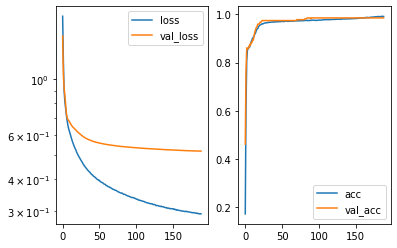

Predicted cell: Normal Probability: [[0.9847371]]
True Cell type: Normal
x [[0.5867817]]
True positional value x 0.5
y [[0.4789058]]
True positional value y 0.5


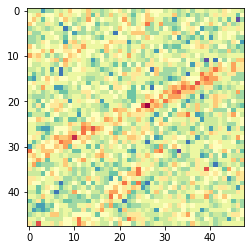

Epoch 190/250
5180/5180 [==============================] - 4s 854us/step - loss: 0.2922 - acc: 0.9917 - val_loss: 0.5180 - val_acc: 0.9853

Epoch 00190: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5180258646116151, 'val_acc': 0.9853479938629346, 'loss': 0.2922398946230016, 'acc': 0.9916988496154432, 'lr': 1e-06}


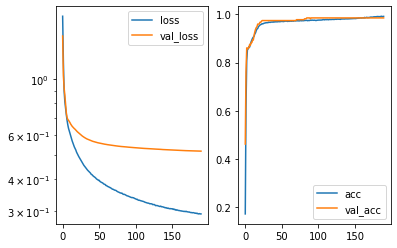

Predicted cell: Cells Probability: [[0.9866868]]
True Cell type: Cells
x [[0.7105126]]
True positional value x 0.7083333333333334
y [[0.36341593]]
True positional value y 0.5


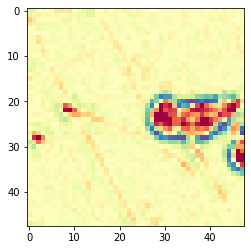

Epoch 191/250
5180/5180 [==============================] - 4s 857us/step - loss: 0.2915 - acc: 0.9929 - val_loss: 0.5178 - val_acc: 0.9853

Epoch 00191: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.517838057580885, 'val_acc': 0.9853479938629346, 'loss': 0.2914769371043761, 'acc': 0.9928571496691022, 'lr': 1e-06}


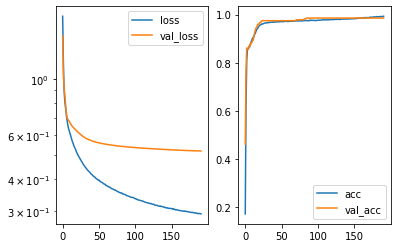

Predicted cell: Cells Probability: [[0.9900968]]
True Cell type: Cells
x [[0.44258362]]
True positional value x 0.5
y [[0.3553396]]
True positional value y 0.2916666666666667


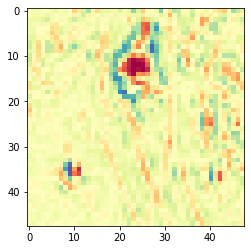

Epoch 192/250
5180/5180 [==============================] - 4s 844us/step - loss: 0.2920 - acc: 0.9923 - val_loss: 0.5179 - val_acc: 0.9853

Epoch 00192: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5178716040792919, 'val_acc': 0.9853479938629346, 'loss': 0.29197622358108577, 'acc': 0.9922779996422727, 'lr': 1e-06}


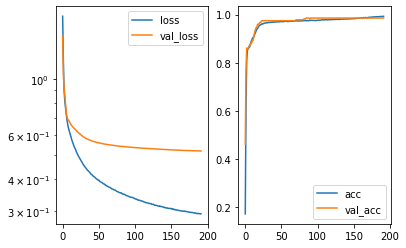

Predicted cell: Cells Probability: [[0.9347515]]
True Cell type: Cells
x [[0.38457453]]
True positional value x 0.5
y [[0.52558935]]
True positional value y 0.5


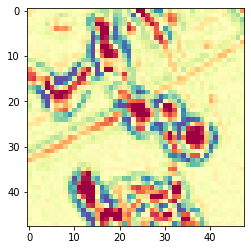

Epoch 193/250
5180/5180 [==============================] - 4s 846us/step - loss: 0.2916 - acc: 0.9923 - val_loss: 0.5177 - val_acc: 0.9853

Epoch 00193: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5176743478565425, 'val_acc': 0.9853479938629346, 'loss': 0.29160509802199697, 'acc': 0.9922779996422727, 'lr': 1e-06}


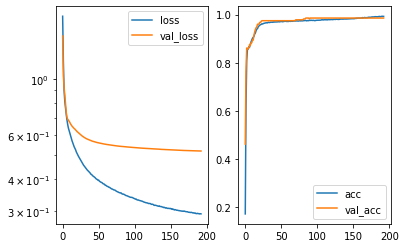

Predicted cell: Normal Probability: [[0.9677646]]
True Cell type: Normal
x [[0.49285042]]
True positional value x 0.5
y [[0.35309878]]
True positional value y 0.5


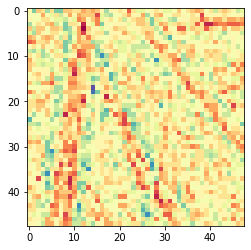

Epoch 194/250
5180/5180 [==============================] - 4s 845us/step - loss: 0.2907 - acc: 0.9929 - val_loss: 0.5177 - val_acc: 0.9853

Epoch 00194: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5176885339803311, 'val_acc': 0.9853479938629346, 'loss': 0.29067147180840774, 'acc': 0.9928571496691022, 'lr': 1e-06}


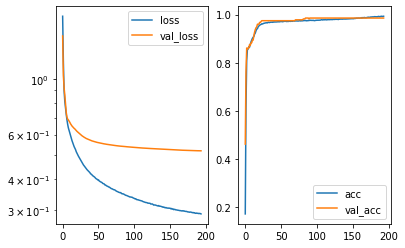

Predicted cell: Cells Probability: [[0.99688476]]
True Cell type: Cells
x [[0.67167044]]
True positional value x 0.7083333333333334
y [[0.5095708]]
True positional value y 0.5


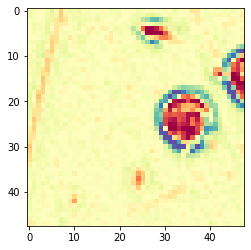

Epoch 195/250
5180/5180 [==============================] - 4s 861us/step - loss: 0.2920 - acc: 0.9923 - val_loss: 0.5174 - val_acc: 0.9853

Epoch 00195: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.517405241618663, 'val_acc': 0.9853479938629346, 'loss': 0.29200825624484356, 'acc': 0.992277997340935, 'lr': 1e-06}


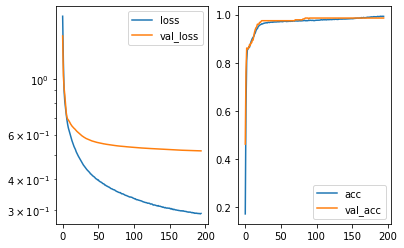

Predicted cell: Cells Probability: [[0.9827644]]
True Cell type: Cells
x [[0.42540634]]
True positional value x 0.5
y [[0.21686292]]
True positional value y 0.2916666666666667


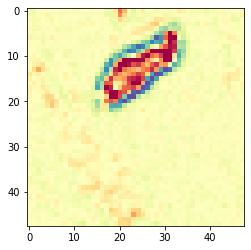

Epoch 196/250
5180/5180 [==============================] - 4s 857us/step - loss: 0.2902 - acc: 0.9936 - val_loss: 0.5175 - val_acc: 0.9853

Epoch 00196: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5174752244582543, 'val_acc': 0.9853479938629346, 'loss': 0.2902266566127424, 'acc': 0.993629349704875, 'lr': 1e-06}


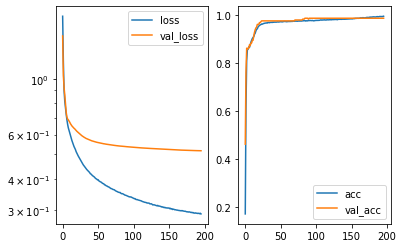

Predicted cell: Cells Probability: [[0.95762396]]
True Cell type: Cells
x [[0.77513283]]
True positional value x 0.7083333333333334
y [[0.3687943]]
True positional value y 0.2916666666666667


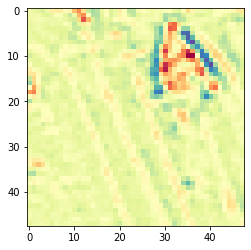

Epoch 197/250
5180/5180 [==============================] - 4s 846us/step - loss: 0.2905 - acc: 0.9931 - val_loss: 0.5174 - val_acc: 0.9853

Epoch 00197: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.517430094353882, 'val_acc': 0.9853479938629346, 'loss': 0.2904932704901603, 'acc': 0.9930501985273766, 'lr': 1e-06}


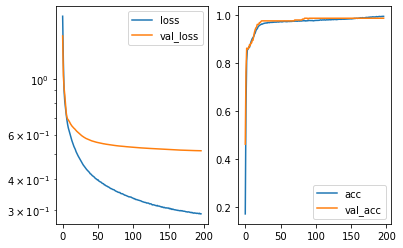

Predicted cell: Cells Probability: [[0.98183584]]
True Cell type: Cells
x [[0.6408058]]
True positional value x 0.7083333333333334
y [[0.48758504]]
True positional value y 0.2916666666666667


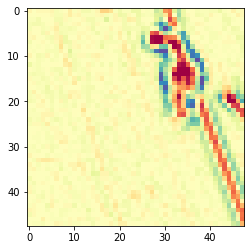

Epoch 198/250
5180/5180 [==============================] - 4s 851us/step - loss: 0.2899 - acc: 0.9927 - val_loss: 0.5173 - val_acc: 0.9853

Epoch 00198: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5173433152310577, 'val_acc': 0.9853479938629346, 'loss': 0.2898687339427388, 'acc': 0.9926640996601591, 'lr': 1e-06}


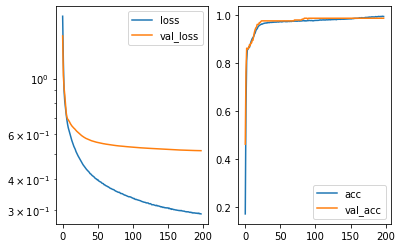

Predicted cell: Cells Probability: [[0.9861487]]
True Cell type: Cells
x [[0.45945328]]
True positional value x 0.5
y [[0.5167136]]
True positional value y 0.5


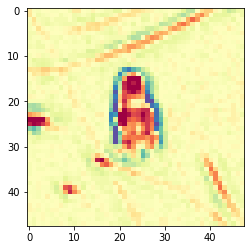

Epoch 199/250
5180/5180 [==============================] - 4s 846us/step - loss: 0.2897 - acc: 0.9936 - val_loss: 0.5172 - val_acc: 0.9853

Epoch 00199: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.517205182667617, 'val_acc': 0.9853479938629346, 'loss': 0.28966095571812517, 'acc': 0.9936293485542061, 'lr': 1e-06}


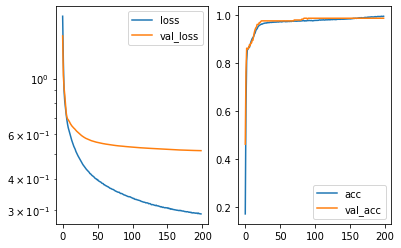

Predicted cell: Cells Probability: [[0.950081]]
True Cell type: Normal
x [[0.7881]]
True positional value x 0.5
y [[0.60979205]]
True positional value y 0.5


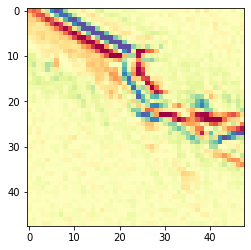

Epoch 200/250
5180/5180 [==============================] - 4s 850us/step - loss: 0.2894 - acc: 0.9932 - val_loss: 0.5170 - val_acc: 0.9853

Epoch 00200: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5170161320176316, 'val_acc': 0.9853479938629346, 'loss': 0.2893591791276306, 'acc': 0.9932432496869886, 'lr': 1e-06}


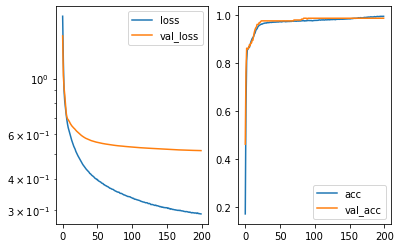

Predicted cell: Cells Probability: [[0.99279106]]
True Cell type: Cells
x [[0.6344631]]
True positional value x 0.5
y [[0.6078558]]
True positional value y 0.7083333333333334


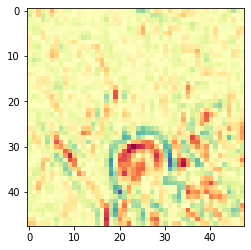

Epoch 201/250
5180/5180 [==============================] - 4s 840us/step - loss: 0.2897 - acc: 0.9934 - val_loss: 0.5169 - val_acc: 0.9853

Epoch 00201: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5169241002627781, 'val_acc': 0.9853479938629346, 'loss': 0.28972125594220105, 'acc': 0.9934362996959318, 'lr': 1e-06}


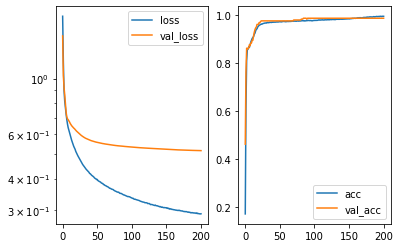

Predicted cell: Cells Probability: [[0.99772483]]
True Cell type: Cells
x [[0.5406906]]
True positional value x 0.5
y [[0.15408738]]
True positional value y 0.2916666666666667


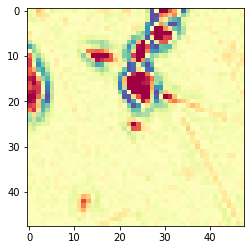

Epoch 202/250
5180/5180 [==============================] - 4s 843us/step - loss: 0.2897 - acc: 0.9932 - val_loss: 0.5169 - val_acc: 0.9853

Epoch 00202: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5168892219389751, 'val_acc': 0.9853479938629346, 'loss': 0.2897236151584787, 'acc': 0.993243247385651, 'lr': 1e-06}


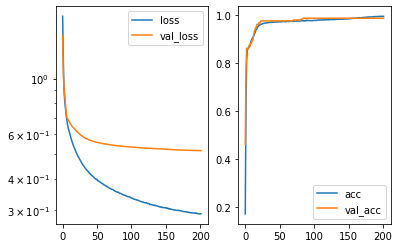

Predicted cell: Normal Probability: [[0.97288835]]
True Cell type: Normal
x [[0.4368476]]
True positional value x 0.5
y [[0.53718656]]
True positional value y 0.5


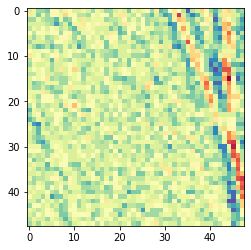

Epoch 203/250
5180/5180 [==============================] - 4s 843us/step - loss: 0.2890 - acc: 0.9936 - val_loss: 0.5168 - val_acc: 0.9853

Epoch 00203: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5168317191766731, 'val_acc': 0.9853479938629346, 'loss': 0.28897156057210505, 'acc': 0.9936293485542061, 'lr': 1e-06}


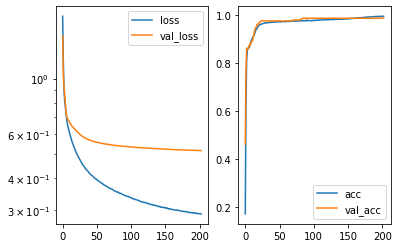

Predicted cell: Cells Probability: [[0.98147064]]
True Cell type: Cells
x [[0.69598883]]
True positional value x 0.7083333333333334
y [[0.5666067]]
True positional value y 0.7083333333333334


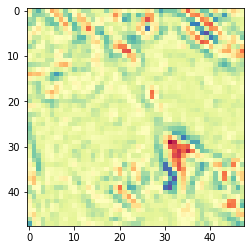

Epoch 204/250
5180/5180 [==============================] - 4s 866us/step - loss: 0.2880 - acc: 0.9938 - val_loss: 0.5165 - val_acc: 0.9853

Epoch 00204: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5165218040620014, 'val_acc': 0.9853479938629346, 'loss': 0.28803036054128844, 'acc': 0.9938223997138181, 'lr': 1e-06}


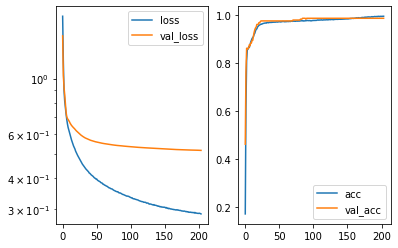

Predicted cell: Cells Probability: [[0.90478456]]
True Cell type: Cells
x [[0.30635712]]
True positional value x 0.2916666666666667
y [[0.67023027]]
True positional value y 0.7083333333333334


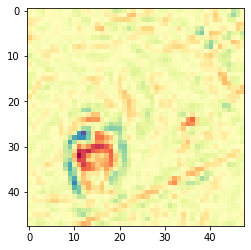

Epoch 205/250
5180/5180 [==============================] - 5s 879us/step - loss: 0.2892 - acc: 0.9944 - val_loss: 0.5163 - val_acc: 0.9853

Epoch 00205: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5163429464612689, 'val_acc': 0.9853479938629346, 'loss': 0.28917019822882867, 'acc': 0.9944015488201127, 'lr': 1e-06}


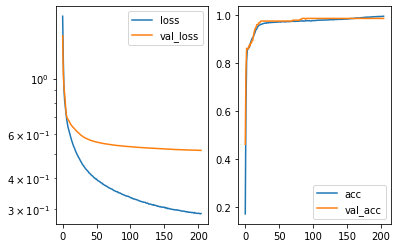

Predicted cell: Cells Probability: [[0.9966792]]
True Cell type: Cells
x [[0.824295]]
True positional value x 0.7083333333333334
y [[0.1489726]]
True positional value y 0.2916666666666667


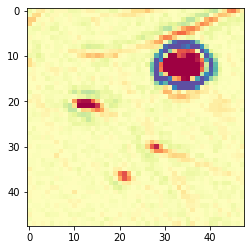

Epoch 206/250
5180/5180 [==============================] - 4s 860us/step - loss: 0.2887 - acc: 0.9934 - val_loss: 0.5165 - val_acc: 0.9853

Epoch 00206: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5165448835044554, 'val_acc': 0.9853479938629346, 'loss': 0.28869189949109286, 'acc': 0.9934362996959318, 'lr': 1e-06}


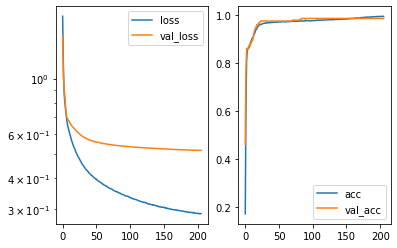

Predicted cell: Cells Probability: [[0.99671173]]
True Cell type: Cells
x [[0.49565113]]
True positional value x 0.2916666666666667
y [[0.41365072]]
True positional value y 0.5


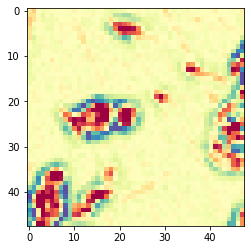

Epoch 207/250
5180/5180 [==============================] - 5s 874us/step - loss: 0.2892 - acc: 0.9936 - val_loss: 0.5165 - val_acc: 0.9853

Epoch 00207: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5165035084927039, 'val_acc': 0.9853479938629346, 'loss': 0.28917349029231715, 'acc': 0.9936293485542061, 'lr': 1e-06}


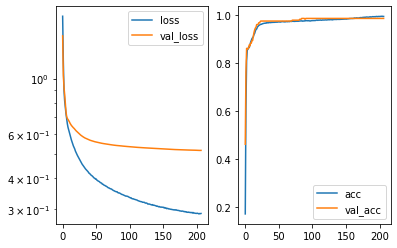

Predicted cell: Cells Probability: [[0.96154964]]
True Cell type: Cells
x [[0.75187635]]
True positional value x 0.2916666666666667
y [[0.90182126]]
True positional value y 0.7083333333333334


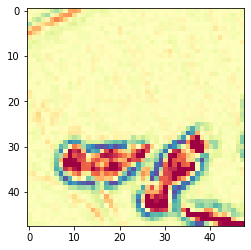

Epoch 208/250
5180/5180 [==============================] - 5s 874us/step - loss: 0.2872 - acc: 0.9944 - val_loss: 0.5164 - val_acc: 0.9853

Epoch 00208: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.516447514841408, 'val_acc': 0.9853479938629346, 'loss': 0.2871814665877221, 'acc': 0.9944015497406478, 'lr': 1e-06}


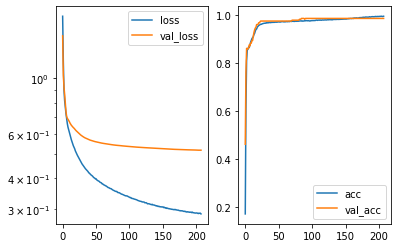

Predicted cell: Normal Probability: [[0.98498005]]
True Cell type: Normal
x [[0.5733628]]
True positional value x 0.5
y [[0.5229255]]
True positional value y 0.5


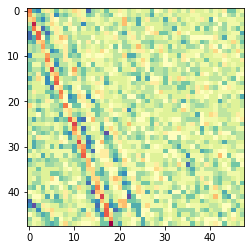

Epoch 209/250
5180/5180 [==============================] - 5s 876us/step - loss: 0.2888 - acc: 0.9940 - val_loss: 0.5163 - val_acc: 0.9853

Epoch 00209: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5162980659104093, 'val_acc': 0.9853479938629346, 'loss': 0.28878084020725087, 'acc': 0.9940154497227613, 'lr': 1e-06}


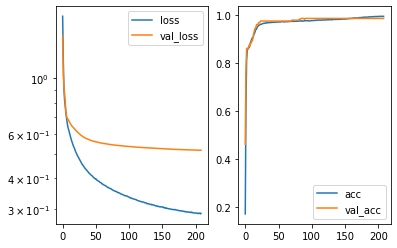

Predicted cell: Cells Probability: [[0.98695856]]
True Cell type: Cells
x [[0.57158184]]
True positional value x 0.7083333333333334
y [[0.3134942]]
True positional value y 0.2916666666666667


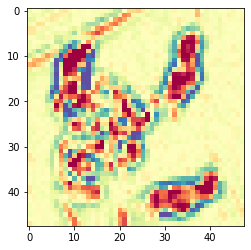

Epoch 210/250
5180/5180 [==============================] - 4s 852us/step - loss: 0.2872 - acc: 0.9950 - val_loss: 0.5161 - val_acc: 0.9853

Epoch 00210: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5160659534153921, 'val_acc': 0.9853479938629346, 'loss': 0.2871689003636938, 'acc': 0.9949806997674773, 'lr': 1e-06}


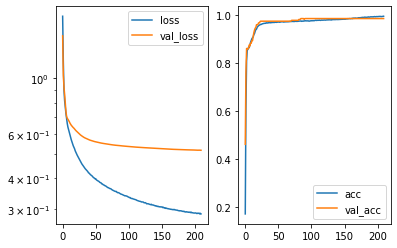

Predicted cell: Normal Probability: [[0.97151595]]
True Cell type: Normal
x [[0.493407]]
True positional value x 0.5
y [[0.3555306]]
True positional value y 0.5


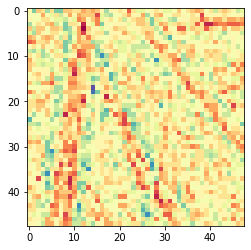

Epoch 211/250
5180/5180 [==============================] - 4s 852us/step - loss: 0.2872 - acc: 0.9952 - val_loss: 0.5159 - val_acc: 0.9853

Epoch 00211: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5159348714482653, 'val_acc': 0.9853479938629346, 'loss': 0.28715215042291, 'acc': 0.9951737497764205, 'lr': 1e-06}


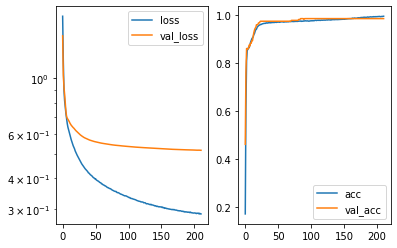

Predicted cell: Normal Probability: [[0.9910449]]
True Cell type: Normal
x [[0.5153573]]
True positional value x 0.5
y [[0.45488977]]
True positional value y 0.5


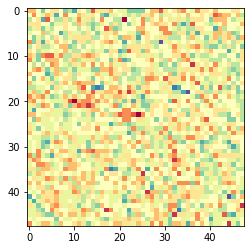

Epoch 212/250
5180/5180 [==============================] - 4s 850us/step - loss: 0.2869 - acc: 0.9956 - val_loss: 0.5160 - val_acc: 0.9853

Epoch 00212: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5159623470061865, 'val_acc': 0.9853479938629346, 'loss': 0.28689905287676337, 'acc': 0.9955598497943068, 'lr': 1e-06}


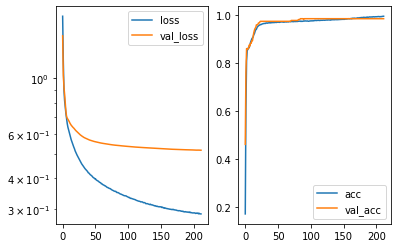

Predicted cell: Cells Probability: [[0.9822067]]
True Cell type: Cells
x [[0.69545066]]
True positional value x 0.7083333333333334
y [[0.56639105]]
True positional value y 0.7083333333333334


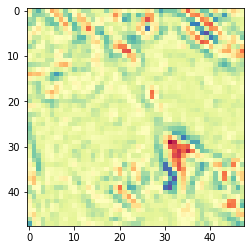

Epoch 213/250
5180/5180 [==============================] - 4s 850us/step - loss: 0.2866 - acc: 0.9946 - val_loss: 0.5158 - val_acc: 0.9853

Epoch 00213: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5158235817165165, 'val_acc': 0.9853479938629346, 'loss': 0.2865684760813547, 'acc': 0.9945945997495909, 'lr': 1e-06}


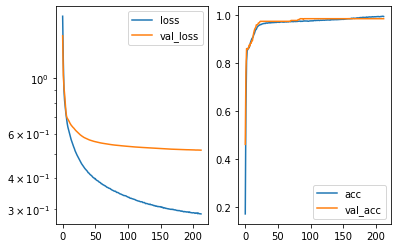

Predicted cell: Cells Probability: [[0.9930167]]
True Cell type: Cells
x [[0.5685875]]
True positional value x 0.5
y [[0.49836883]]
True positional value y 0.2916666666666667


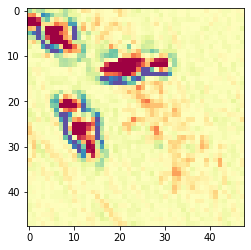

Epoch 214/250
5180/5180 [==============================] - 4s 847us/step - loss: 0.2871 - acc: 0.9950 - val_loss: 0.5158 - val_acc: 0.9853

Epoch 00214: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.515848003245972, 'val_acc': 0.9853479938629346, 'loss': 0.28711690186993954, 'acc': 0.9949806997674773, 'lr': 1e-06}


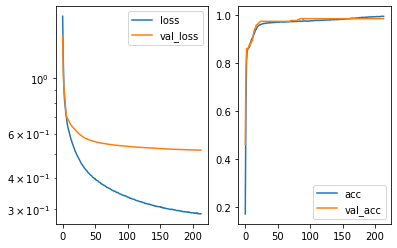

Predicted cell: Cells Probability: [[0.97246695]]
True Cell type: Cells
x [[0.5742344]]
True positional value x 0.2916666666666667
y [[0.4703603]]
True positional value y 0.7083333333333334


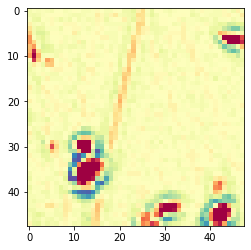

Epoch 215/250
5180/5180 [==============================] - 5s 872us/step - loss: 0.2869 - acc: 0.9946 - val_loss: 0.5158 - val_acc: 0.9853

Epoch 00215: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5157672553272038, 'val_acc': 0.9853479938629346, 'loss': 0.28690422007015776, 'acc': 0.9945945997495909, 'lr': 1e-06}


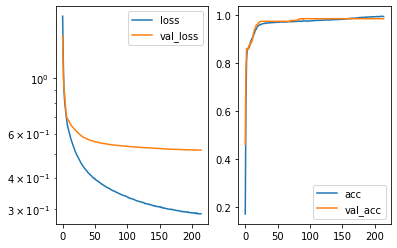

Predicted cell: Cells Probability: [[0.9988379]]
True Cell type: Cells
x [[0.3641983]]
True positional value x 0.2916666666666667
y [[0.66978455]]
True positional value y 0.7083333333333334


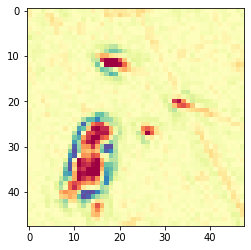

Epoch 216/250
5180/5180 [==============================] - 4s 859us/step - loss: 0.2859 - acc: 0.9956 - val_loss: 0.5157 - val_acc: 0.9853

Epoch 00216: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5156891583959698, 'val_acc': 0.9853479938629346, 'loss': 0.2859185205693411, 'acc': 0.9955598497943068, 'lr': 1e-06}


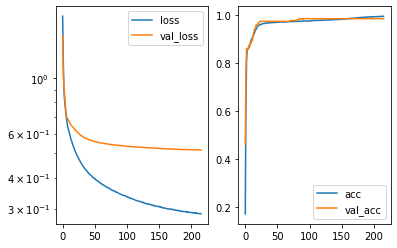

Predicted cell: Cells Probability: [[0.98855734]]
True Cell type: Cells
x [[0.40732652]]
True positional value x 0.2916666666666667
y [[0.08693875]]
True positional value y 0.2916666666666667


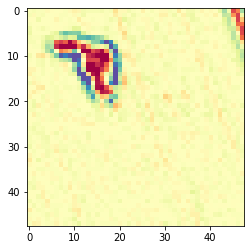

Epoch 217/250
5180/5180 [==============================] - 4s 858us/step - loss: 0.2870 - acc: 0.9944 - val_loss: 0.5156 - val_acc: 0.9853

Epoch 00217: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5155764949190748, 'val_acc': 0.9853479938629346, 'loss': 0.28701535776315046, 'acc': 0.9944015474393101, 'lr': 1e-06}


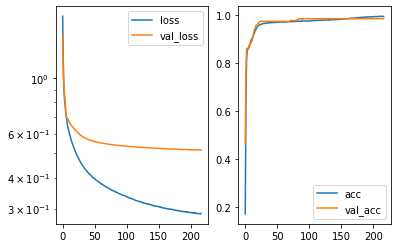

Predicted cell: Cells Probability: [[0.9986431]]
True Cell type: Cells
x [[0.5535802]]
True positional value x 0.2916666666666667
y [[0.73391765]]
True positional value y 0.7083333333333334


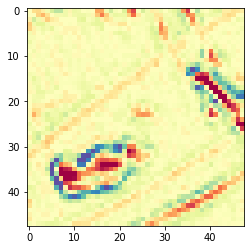

Epoch 218/250
5180/5180 [==============================] - 4s 861us/step - loss: 0.2861 - acc: 0.9956 - val_loss: 0.5154 - val_acc: 0.9853

Epoch 00218: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5153571120548598, 'val_acc': 0.9853479938629346, 'loss': 0.28605389744618687, 'acc': 0.9955598497943068, 'lr': 1e-06}


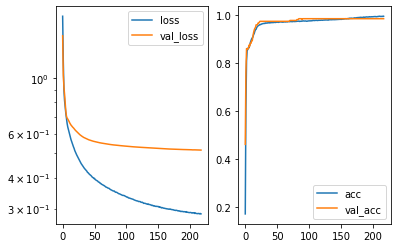

Predicted cell: Cells Probability: [[0.98812485]]
True Cell type: Cells
x [[0.55720544]]
True positional value x 0.2916666666666667
y [[0.39050993]]
True positional value y 0.5


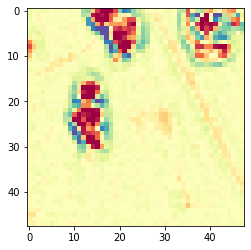

Epoch 219/250
5180/5180 [==============================] - 4s 867us/step - loss: 0.2856 - acc: 0.9956 - val_loss: 0.5153 - val_acc: 0.9853

Epoch 00219: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5153097979751698, 'val_acc': 0.9853479938629346, 'loss': 0.2856116515789253, 'acc': 0.9955598497943068, 'lr': 1e-06}


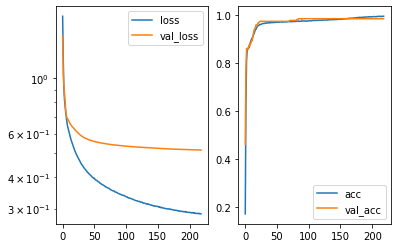

Predicted cell: Cells Probability: [[0.9925097]]
True Cell type: Cells
x [[0.7772207]]
True positional value x 0.7083333333333334
y [[0.6902184]]
True positional value y 0.7083333333333334


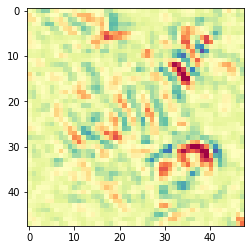

Epoch 220/250
5180/5180 [==============================] - 5s 877us/step - loss: 0.2856 - acc: 0.9961 - val_loss: 0.5153 - val_acc: 0.9853

Epoch 00220: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5152639914781619, 'val_acc': 0.9853479938629346, 'loss': 0.2856253001220438, 'acc': 0.9961389998211364, 'lr': 1e-06}


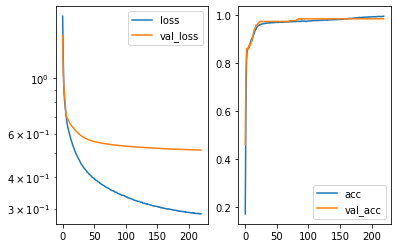

Predicted cell: Cells Probability: [[0.9902874]]
True Cell type: Cells
x [[0.4277226]]
True positional value x 0.2916666666666667
y [[0.3279279]]
True positional value y 0.5


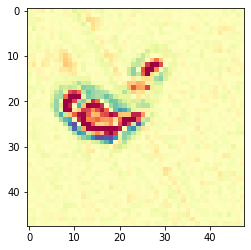

Epoch 221/250
5180/5180 [==============================] - 5s 920us/step - loss: 0.2856 - acc: 0.9965 - val_loss: 0.5152 - val_acc: 0.9853

Epoch 00221: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5152483261548556, 'val_acc': 0.9853479938629346, 'loss': 0.2856321208265297, 'acc': 0.9965250998390227, 'lr': 1e-06}


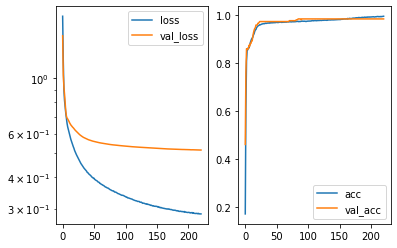

Predicted cell: Cells Probability: [[0.9964599]]
True Cell type: Cells
x [[0.7742265]]
True positional value x 0.7083333333333334
y [[0.71653926]]
True positional value y 0.7083333333333334


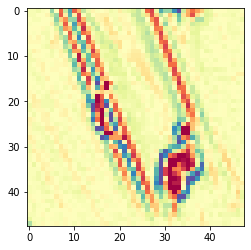

Epoch 222/250
5180/5180 [==============================] - 5s 872us/step - loss: 0.2846 - acc: 0.9961 - val_loss: 0.5152 - val_acc: 0.9853

Epoch 00222: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5151870434100811, 'val_acc': 0.9853479938629346, 'loss': 0.28461016881419887, 'acc': 0.9961389998211364, 'lr': 1e-06}


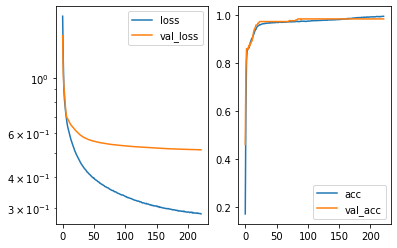

Predicted cell: Cells Probability: [[0.9878853]]
True Cell type: Cells
x [[0.39142993]]
True positional value x 0.5
y [[0.40457013]]
True positional value y 0.2916666666666667


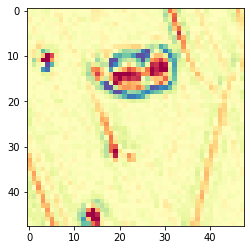

Epoch 223/250
5180/5180 [==============================] - 4s 851us/step - loss: 0.2849 - acc: 0.9959 - val_loss: 0.5154 - val_acc: 0.9853

Epoch 00223: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5153636421476092, 'val_acc': 0.9853479938629346, 'loss': 0.2848934052533625, 'acc': 0.9959459498121932, 'lr': 1e-06}


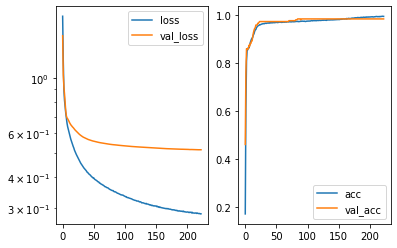

Predicted cell: Cells Probability: [[0.99421495]]
True Cell type: Cells
x [[0.57568425]]
True positional value x 0.7083333333333334
y [[0.4108565]]
True positional value y 0.2916666666666667


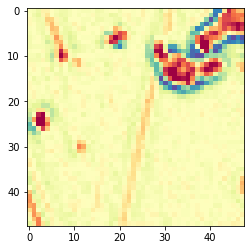

Epoch 224/250
5180/5180 [==============================] - 4s 846us/step - loss: 0.2839 - acc: 0.9963 - val_loss: 0.5151 - val_acc: 0.9853

Epoch 00224: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5150975148319762, 'val_acc': 0.9853479938629346, 'loss': 0.28388540774698884, 'acc': 0.9963320498300795, 'lr': 1e-06}


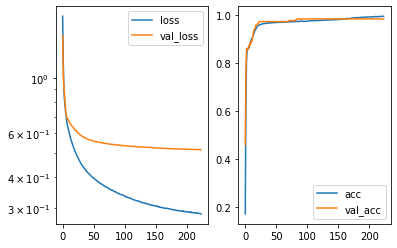

Predicted cell: Cells Probability: [[0.9935002]]
True Cell type: Cells
x [[0.65309113]]
True positional value x 0.5
y [[0.4299477]]
True positional value y 0.7083333333333334


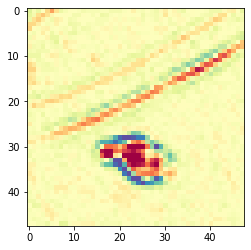

Epoch 225/250
5180/5180 [==============================] - 4s 868us/step - loss: 0.2842 - acc: 0.9965 - val_loss: 0.5151 - val_acc: 0.9853

Epoch 00225: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5150686727338658, 'val_acc': 0.9853479938629346, 'loss': 0.2842411083604378, 'acc': 0.9965250998390227, 'lr': 1e-06}


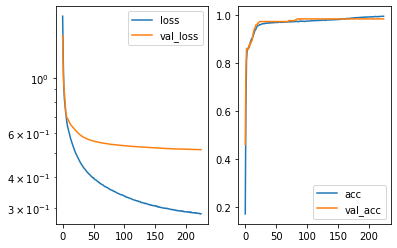

Predicted cell: Normal Probability: [[0.9885893]]
True Cell type: Normal
x [[0.38133076]]
True positional value x 0.5
y [[0.4973131]]
True positional value y 0.5


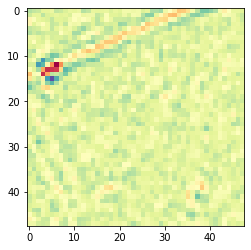

Epoch 226/250
5180/5180 [==============================] - 4s 843us/step - loss: 0.2846 - acc: 0.9963 - val_loss: 0.5151 - val_acc: 0.9853

Epoch 00226: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5151417296884697, 'val_acc': 0.9853479938629346, 'loss': 0.2845883295802996, 'acc': 0.9963320498300795, 'lr': 1e-06}


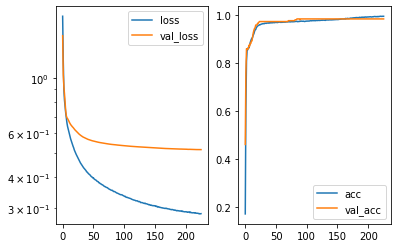

Predicted cell: Cells Probability: [[0.994292]]
True Cell type: Cells
x [[0.2811356]]
True positional value x 0.5
y [[0.51850086]]
True positional value y 0.5


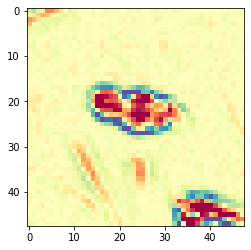

Epoch 227/250
5180/5180 [==============================] - 4s 845us/step - loss: 0.2840 - acc: 0.9967 - val_loss: 0.5150 - val_acc: 0.9853

Epoch 00227: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5150050813461835, 'val_acc': 0.9853479938629346, 'loss': 0.28400301496034425, 'acc': 0.9967181498479659, 'lr': 1e-06}


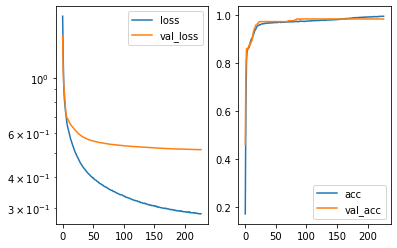

Predicted cell: Normal Probability: [[0.9774696]]
True Cell type: Normal
x [[0.5107824]]
True positional value x 0.5
y [[0.4664161]]
True positional value y 0.5


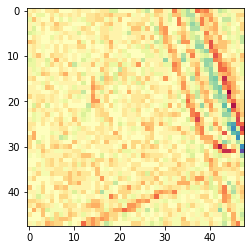

Epoch 228/250
5180/5180 [==============================] - 4s 847us/step - loss: 0.2836 - acc: 0.9971 - val_loss: 0.5151 - val_acc: 0.9853

Epoch 00228: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5151142606805096, 'val_acc': 0.9853479938629346, 'loss': 0.28364220227053727, 'acc': 0.9971042498658522, 'lr': 1e-06}


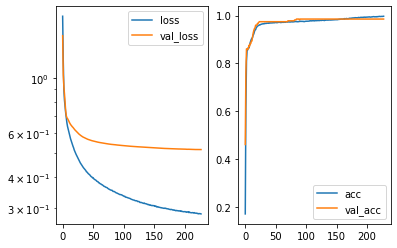

Predicted cell: Normal Probability: [[0.9885826]]
True Cell type: Normal
x [[0.5204516]]
True positional value x 0.5
y [[0.38601643]]
True positional value y 0.5


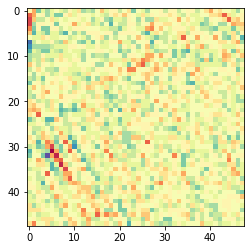

Epoch 229/250
5180/5180 [==============================] - 4s 850us/step - loss: 0.2841 - acc: 0.9965 - val_loss: 0.5151 - val_acc: 0.9853

Epoch 00229: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.515076580283406, 'val_acc': 0.9853479938629346, 'loss': 0.28412387649525084, 'acc': 0.9965250998390227, 'lr': 1e-06}


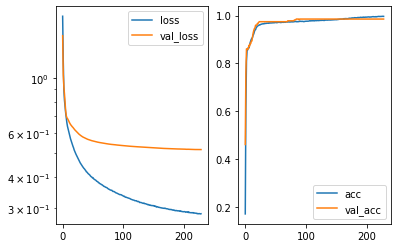

Predicted cell: Cells Probability: [[0.9920461]]
True Cell type: Cells
x [[0.3171225]]
True positional value x 0.2916666666666667
y [[0.29370043]]
True positional value y 0.2916666666666667


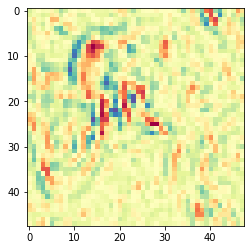

Epoch 230/250
5180/5180 [==============================] - 4s 840us/step - loss: 0.2844 - acc: 0.9967 - val_loss: 0.5149 - val_acc: 0.9853

Epoch 00230: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5149379497045999, 'val_acc': 0.9853479938629346, 'loss': 0.2844221995834218, 'acc': 0.9967181498479659, 'lr': 1e-06}


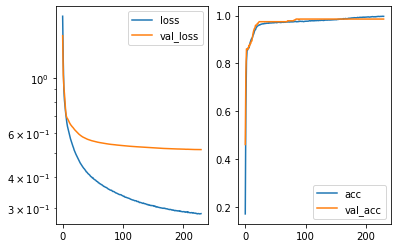

Predicted cell: Cells Probability: [[0.99034107]]
True Cell type: Cells
x [[0.76469547]]
True positional value x 0.7083333333333334
y [[0.43348485]]
True positional value y 0.5


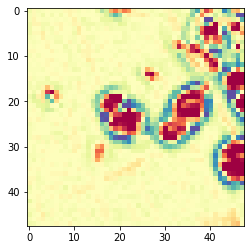

Epoch 231/250
5180/5180 [==============================] - 4s 847us/step - loss: 0.2830 - acc: 0.9977 - val_loss: 0.5149 - val_acc: 0.9853

Epoch 00231: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5148840164526914, 'val_acc': 0.9853479938629346, 'loss': 0.2830043842433502, 'acc': 0.9976833998926818, 'lr': 1e-06}


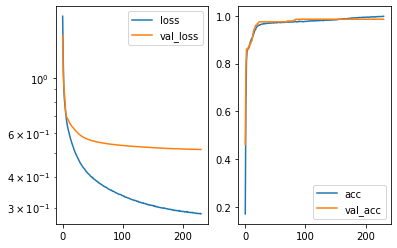

Predicted cell: Cells Probability: [[0.95242935]]
True Cell type: Cells
x [[0.3196567]]
True positional value x 0.2916666666666667
y [[0.23272438]]
True positional value y 0.2916666666666667


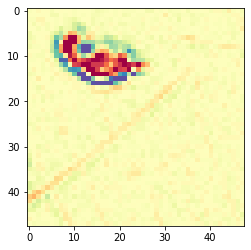

Epoch 232/250
5180/5180 [==============================] - 4s 864us/step - loss: 0.2827 - acc: 0.9971 - val_loss: 0.5146 - val_acc: 0.9853

Epoch 00232: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5145729000751789, 'val_acc': 0.9853479938629346, 'loss': 0.28273421560475265, 'acc': 0.9971042498658522, 'lr': 1e-06}


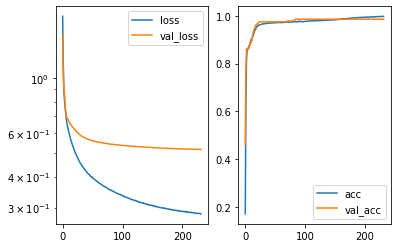

Predicted cell: Cells Probability: [[0.9751006]]
True Cell type: Cells
x [[0.5726058]]
True positional value x 0.2916666666666667
y [[0.467093]]
True positional value y 0.7083333333333334


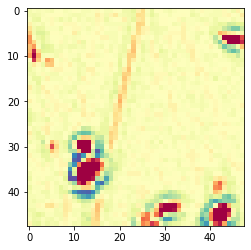

Epoch 233/250
5180/5180 [==============================] - 5s 874us/step - loss: 0.2829 - acc: 0.9975 - val_loss: 0.5145 - val_acc: 0.9853

Epoch 00233: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5144852677107731, 'val_acc': 0.9853479938629346, 'loss': 0.28287390369245907, 'acc': 0.9974903498837386, 'lr': 1e-06}


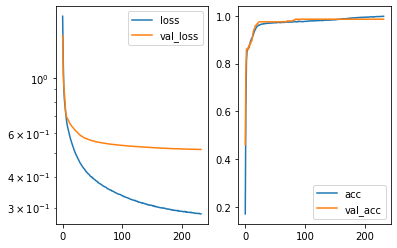

Predicted cell: Cells Probability: [[0.9892263]]
True Cell type: Cells
x [[0.53475404]]
True positional value x 0.5
y [[0.3265802]]
True positional value y 0.2916666666666667


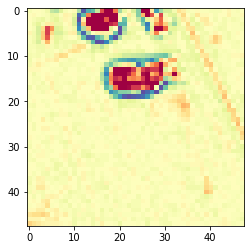

Epoch 234/250
5180/5180 [==============================] - 4s 863us/step - loss: 0.2825 - acc: 0.9975 - val_loss: 0.5145 - val_acc: 0.9853

Epoch 00234: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5144537305220579, 'val_acc': 0.9853479938629346, 'loss': 0.2824637013052421, 'acc': 0.9974903498837386, 'lr': 1e-06}


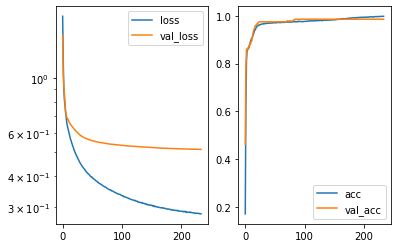

Predicted cell: Cells Probability: [[0.99473333]]
True Cell type: Cells
x [[0.38924775]]
True positional value x 0.5
y [[0.13494691]]
True positional value y 0.2916666666666667


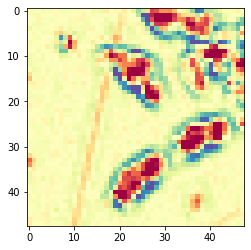

Epoch 235/250
5180/5180 [==============================] - 4s 857us/step - loss: 0.2826 - acc: 0.9971 - val_loss: 0.5143 - val_acc: 0.9853

Epoch 00235: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.514343376998063, 'val_acc': 0.9853479938629346, 'loss': 0.2826352037748315, 'acc': 0.9971042498658522, 'lr': 1e-06}


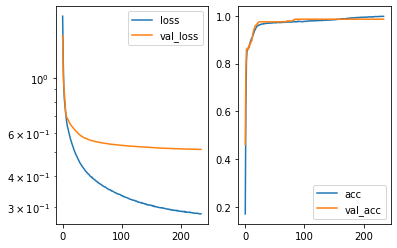

Predicted cell: Cells Probability: [[0.99674606]]
True Cell type: Cells
x [[0.7722511]]
True positional value x 0.7083333333333334
y [[0.7165138]]
True positional value y 0.7083333333333334


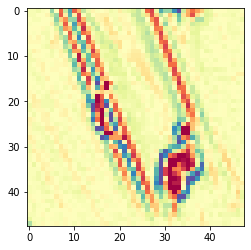

Epoch 236/250
5180/5180 [==============================] - 4s 868us/step - loss: 0.2829 - acc: 0.9967 - val_loss: 0.5144 - val_acc: 0.9853

Epoch 00236: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.514426955154964, 'val_acc': 0.9853479938629346, 'loss': 0.2828986540034011, 'acc': 0.9967181498479659, 'lr': 1e-06}


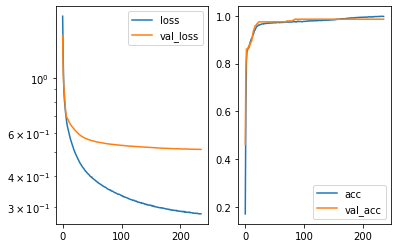

Predicted cell: Normal Probability: [[0.97190994]]
True Cell type: Normal
x [[0.3951488]]
True positional value x 0.5
y [[0.52611417]]
True positional value y 0.5


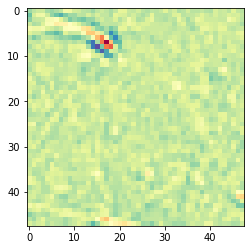

Epoch 237/250
5180/5180 [==============================] - 5s 882us/step - loss: 0.2826 - acc: 0.9971 - val_loss: 0.5144 - val_acc: 0.9853

Epoch 00237: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5144429931710491, 'val_acc': 0.9853479938629346, 'loss': 0.28258277101866525, 'acc': 0.9971042498658522, 'lr': 1e-06}


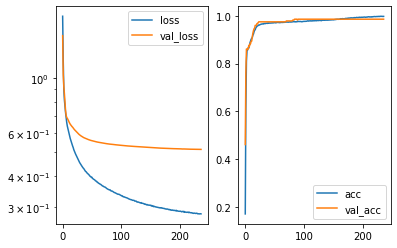

Predicted cell: Cells Probability: [[0.9739333]]
True Cell type: Cells
x [[0.16338912]]
True positional value x 0.2916666666666667
y [[0.4402491]]
True positional value y 0.2916666666666667


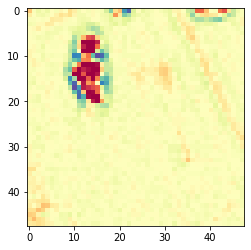

Epoch 238/250
5180/5180 [==============================] - 5s 870us/step - loss: 0.2822 - acc: 0.9983 - val_loss: 0.5146 - val_acc: 0.9853

Epoch 00238: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5146063681923863, 'val_acc': 0.9853479938629346, 'loss': 0.2821831329218669, 'acc': 0.9982625499195114, 'lr': 1e-06}


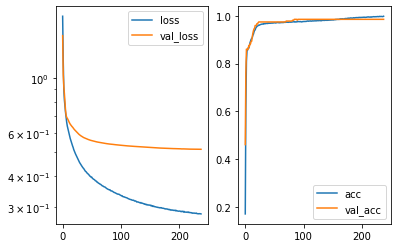

Predicted cell: Cells Probability: [[0.9968094]]
True Cell type: Cells
x [[0.5211974]]
True positional value x 0.2916666666666667
y [[0.49343237]]
True positional value y 0.5


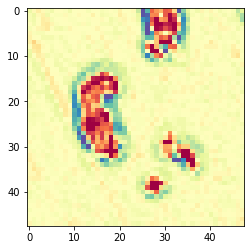

Epoch 239/250
5180/5180 [==============================] - 4s 866us/step - loss: 0.2821 - acc: 0.9977 - val_loss: 0.5144 - val_acc: 0.9853

Epoch 00239: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5143621408895696, 'val_acc': 0.9853479938629346, 'loss': 0.28211731489560776, 'acc': 0.9976833998926818, 'lr': 1e-06}


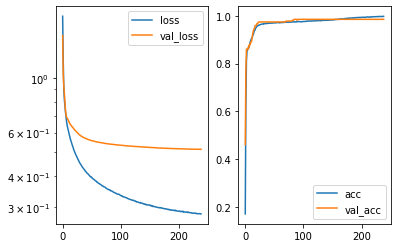

Predicted cell: Cells Probability: [[0.95816106]]
True Cell type: Cells
x [[0.69126505]]
True positional value x 0.7083333333333334
y [[0.29514882]]
True positional value y 0.2916666666666667


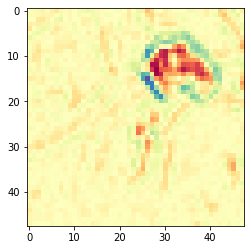

Epoch 240/250
5180/5180 [==============================] - 4s 868us/step - loss: 0.2817 - acc: 0.9981 - val_loss: 0.5145 - val_acc: 0.9853

Epoch 00240: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5144518277583978, 'val_acc': 0.9853479938629346, 'loss': 0.28172726578233787, 'acc': 0.9980694999105681, 'lr': 1e-06}


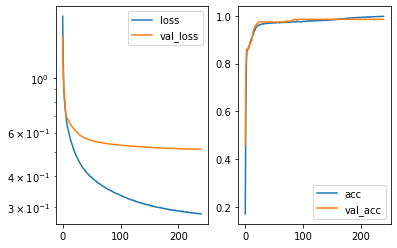

Predicted cell: Cells Probability: [[0.9798135]]
True Cell type: Cells
x [[0.48309487]]
True positional value x 0.5
y [[0.70896167]]
True positional value y 0.7083333333333334


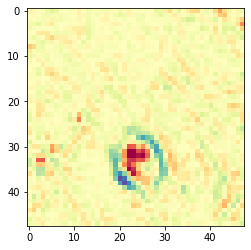

Epoch 241/250
5180/5180 [==============================] - 4s 868us/step - loss: 0.2817 - acc: 0.9973 - val_loss: 0.5144 - val_acc: 0.9853

Epoch 00241: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5143686408524984, 'val_acc': 0.9853479938629346, 'loss': 0.2817206451791594, 'acc': 0.9972972998747954, 'lr': 1e-06}


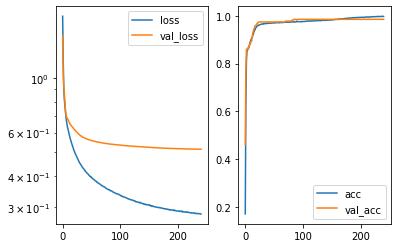

Predicted cell: Cells Probability: [[0.99651414]]
True Cell type: Cells
x [[0.69807935]]
True positional value x 0.5
y [[0.20194177]]
True positional value y 0.2916666666666667


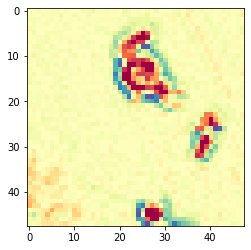

Epoch 242/250
5180/5180 [==============================] - 4s 867us/step - loss: 0.2813 - acc: 0.9973 - val_loss: 0.5142 - val_acc: 0.9853

Epoch 00242: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5141582170248905, 'val_acc': 0.9853479938629346, 'loss': 0.28128761582392986, 'acc': 0.9972972998747954, 'lr': 1e-06}


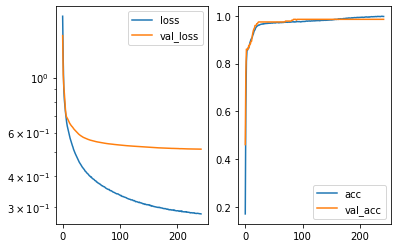

Predicted cell: Cells Probability: [[0.99394727]]
True Cell type: Cells
x [[0.40559083]]
True positional value x 0.7083333333333334
y [[0.43898866]]
True positional value y 0.5


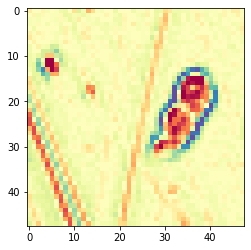

Epoch 243/250
5180/5180 [==============================] - 4s 840us/step - loss: 0.2817 - acc: 0.9977 - val_loss: 0.5142 - val_acc: 0.9853

Epoch 00243: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5141917543533521, 'val_acc': 0.9853479938629346, 'loss': 0.281669692413227, 'acc': 0.9976833998926818, 'lr': 1e-06}


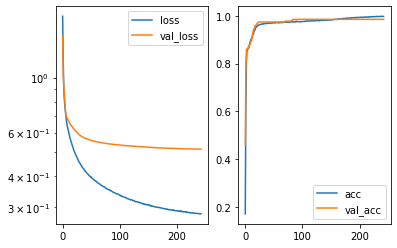

Predicted cell: Cells Probability: [[0.9987908]]
True Cell type: Cells
x [[0.46133944]]
True positional value x 0.5
y [[0.31679755]]
True positional value y 0.5


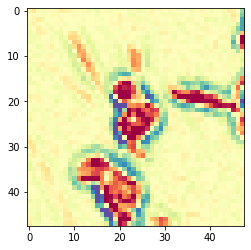

Epoch 244/250
5180/5180 [==============================] - 4s 840us/step - loss: 0.2817 - acc: 0.9975 - val_loss: 0.5140 - val_acc: 0.9853

Epoch 00244: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5139736744947049, 'val_acc': 0.9853479938629346, 'loss': 0.2817424337836306, 'acc': 0.9974903498837386, 'lr': 1e-06}


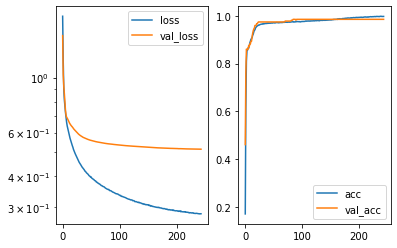

Predicted cell: Cells Probability: [[0.98046345]]
True Cell type: Cells
x [[0.41115582]]
True positional value x 0.5
y [[0.45640904]]
True positional value y 0.7083333333333334


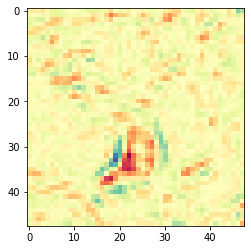

Epoch 245/250
5180/5180 [==============================] - 5s 869us/step - loss: 0.2810 - acc: 0.9981 - val_loss: 0.5140 - val_acc: 0.9853

Epoch 00245: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5139563784494505, 'val_acc': 0.9853479938629346, 'loss': 0.2810337955426986, 'acc': 0.9980694999105681, 'lr': 1e-06}


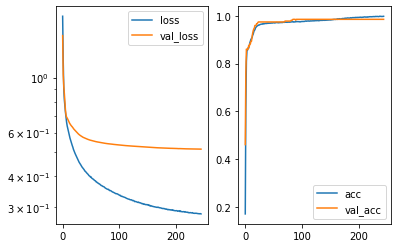

Predicted cell: Normal Probability: [[0.9002145]]
True Cell type: Normal
x [[0.5058469]]
True positional value x 0.5
y [[0.47335276]]
True positional value y 0.5


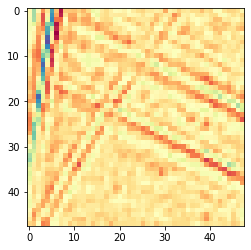

Epoch 246/250
5180/5180 [==============================] - 4s 852us/step - loss: 0.2806 - acc: 0.9985 - val_loss: 0.5138 - val_acc: 0.9853

Epoch 00246: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5137972908142285, 'val_acc': 0.9853479938629346, 'loss': 0.2805583501184309, 'acc': 0.9984555999284546, 'lr': 1e-06}


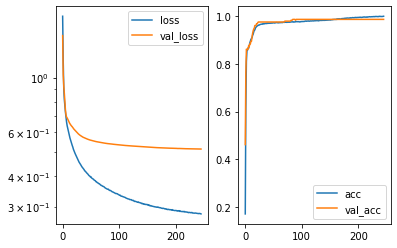

Predicted cell: Cells Probability: [[0.9939879]]
True Cell type: Cells
x [[0.40767902]]
True positional value x 0.7083333333333334
y [[0.43847504]]
True positional value y 0.5


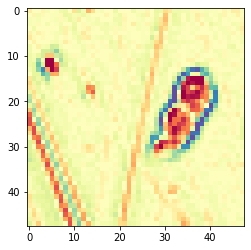

Epoch 247/250
5180/5180 [==============================] - 4s 859us/step - loss: 0.2806 - acc: 0.9981 - val_loss: 0.5137 - val_acc: 0.9853

Epoch 00247: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5136832695304255, 'val_acc': 0.9853479938629346, 'loss': 0.2806430913536705, 'acc': 0.9980694999105681, 'lr': 1e-06}


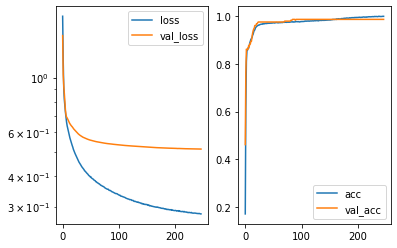

Predicted cell: Cells Probability: [[0.9910035]]
True Cell type: Cells
x [[0.6014358]]
True positional value x 0.5
y [[0.3653149]]
True positional value y 0.2916666666666667


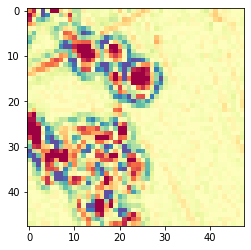

Epoch 248/250
5180/5180 [==============================] - 4s 853us/step - loss: 0.2814 - acc: 0.9967 - val_loss: 0.5135 - val_acc: 0.9853

Epoch 00248: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5134870298616179, 'val_acc': 0.9853479938629346, 'loss': 0.28138863741200865, 'acc': 0.9967181498479659, 'lr': 1e-06}


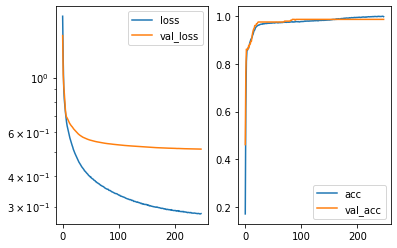

Predicted cell: Normal Probability: [[0.97967786]]
True Cell type: Normal
x [[0.434836]]
True positional value x 0.5
y [[0.540967]]
True positional value y 0.5


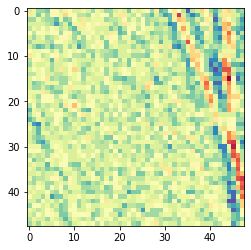

Epoch 249/250
5180/5180 [==============================] - 4s 845us/step - loss: 0.2810 - acc: 0.9983 - val_loss: 0.5136 - val_acc: 0.9853

Epoch 00249: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.513606323645665, 'val_acc': 0.9853479938629346, 'loss': 0.2810220718383789, 'acc': 0.9982625499195114, 'lr': 1e-06}


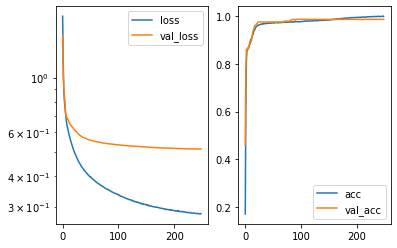

Predicted cell: Normal Probability: [[0.92209613]]
True Cell type: Normal
x [[0.4732862]]
True positional value x 0.5
y [[0.4468222]]
True positional value y 0.5


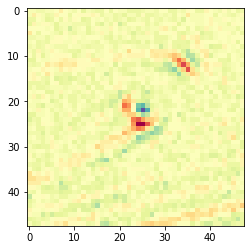

Epoch 250/250
5180/5180 [==============================] - 4s 862us/step - loss: 0.2803 - acc: 0.9979 - val_loss: 0.5136 - val_acc: 0.9853

Epoch 00250: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29SMALL.h5
{'val_loss': 0.5135960373686347, 'val_acc': 0.9853479938629346, 'loss': 0.2803192657623512, 'acc': 0.997876449901625, 'lr': 1e-06}


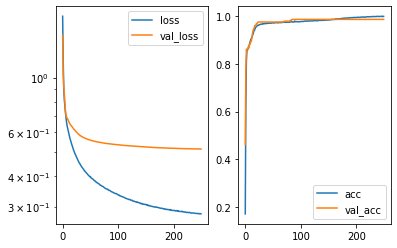

Predicted cell: Cells Probability: [[0.996151]]
True Cell type: Cells
x [[0.61908877]]
True positional value x 0.2916666666666667
y [[0.34476233]]
True positional value y 0.2916666666666667


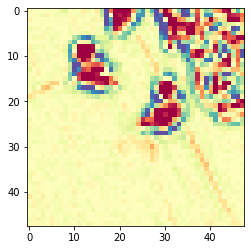

In [5]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
